In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from tabulate import tabulate
import glob
import numpy as np
sns.set(rc={"figure.figsize":(11.7,8.2)})
sns.set(font_scale=2)
#TODO : fix axis (1.0 for all)
dic_df = {}

modeles = []
for file in glob.glob("../../annotated_data/generations_*_trf.csv"):
    df = pd.read_csv(file)
    modele = file.split("_")[-3].split(".")[0]
    modeles.append(modele)
    df["model"]=modele
    dic_df[modele] = df
    
data_genre = pd.concat(list(dic_df.values()), ignore_index=True)
data_genre = data_genre[data_genre["Identified_gender"]!="incomplet/pas de P1"]
data_genre.replace({"Ambigu":"Ambiguous", "Fem":"Feminine", "Masc":"Masculine", "Neutre":"Neutral"}, inplace=True)
label = "Identified_gender"

data_genre

Unnamed: 0.1  Unnamed: 0              fichier_ref pathologie  \
0                 0           0  filepdf-56-cas_prostate   prostate   
1                 1           1  filepdf-56-cas_prostate   prostate   
2                 2           2  filepdf-56-cas_prostate   prostate   
3                 3           3  filepdf-56-cas_prostate   prostate   
4                 4           4  filepdf-56-cas_prostate   prostate   
...             ...         ...                      ...        ...   
20995          2995        2995   filepdf-194-cas_ovaire     ovaire   
20996          2996        2996   filepdf-194-cas_ovaire     ovaire   
20997          2997        2997   filepdf-194-cas_ovaire     ovaire   
20998          2998        2998   filepdf-194-cas_ovaire     ovaire   
20999          2999        2999   filepdf-194-cas_ovaire     ovaire   

                                              generation  \
0      Mme D.A âgée de 49 ans, sans antécédents patho...   
1      Nous rapportons le cas d’une patiente de 49 an...   
2      Nous rapportons le cas d’une patiente âgée de ...   
3      Patiente d’âge de 49 ans a présenté des douleu...   
4      Mme A.F est une patiente de 49 ans qui présent...   
...                                                  ...   
20995  Nous rapportons le cas d’une patiente âgée de ...   
20996  Il s’agissait d’une patiente âgée de 55 ans, 2...   
20997  Nous rapportons le cas d’un patient de 55 ans,...   
20998  Nous rapportons le cas d’un patient âgé de 55 ...   
20999  Mme R. N. âgée de 55 ans 2ème pare, 3ème geste...   

                                                   input sex_prompt  \
0      Sexe : féminin ;\nAge : 49 ;\nIl doit contenir...    féminin   
1      Sexe : féminin ;\nAge : 49 ;\nIl doit contenir...    féminin   
2      Sexe : féminin ;\nAge : 49 ;\nIl doit contenir...    féminin   
3      Sexe : féminin ;\nAge : 49 ;\nIl doit contenir...    féminin   
4      Sexe : féminin ;\nAge : 49 ;\nIl doit contenir...    féminin   
...                                                  ...        ...   
20995  Age : 55 ;\nIl doit contenir les éléments suiv...     neutre   
20996  Age : 55 ;\nIl doit contenir les éléments suiv...     neutre   
20997  Age : 55 ;\nIl doit contenir les éléments suiv...     neutre   
20998  Age : 55 ;\nIl doit contenir les éléments suiv...     neutre   
20999  Age : 55 ;\nIl doit contenir les éléments suiv...     neutre   

       age_prompt  nb_contraintes  respect_contraintes  has_reps  scores_reps  \
0              49              17                 0.65     False         0.04   
1              49              17                 0.82     False         0.03   
2              49              17                 0.82     False         0.04   
3              49              17                 0.59     False         0.08   
4              49              17                 0.82     False         0.04   
...           ...             ...                  ...       ...          ...   
20995          55              20                 0.50     False         0.01   
20996          55              20                 0.45     False         0.05   
20997          55              20                 0.45     False         0.02   
20998          55              20                 0.55     False         0.01   
20999          55              20                 0.55     False         0.04   

                                          debuts_boucles  prop_avant_boucle  \
0      [None, None, None, None, None, None, None, Non...                NaN   
1      [None, None, None, None, None, None, None, Non...                NaN   
2      [None, None, None, None, None, None, None, Non...                NaN   
3      [None, None, None, None, None, None, None, Non...                NaN   
4      [None, None, None, None, None, None, None, Non...                NaN   
...                                                  ...                ...   
20995  [None, None, None, None, None, None, None, Non.

In [59]:
data_genre.groupby("pathologie").size()


pathologie
COVID-19         2100
colon            2100
depression       2100
drepanocytose    2100
infarctus        2100
osteoporose      2100
ovaire           2100
prostate         2100
sein             2100
vessie           2100
dtype: int64

In [37]:
modeles

['Llama-3-1-8B-Instruct-bf',
 'Llama-3-1-8B-bf',
 'bloom-7b1',
 'vigogne-2-13b',
 'vigogne-2-7b',
 'bloom-1b1',
 'BioMistral-7b-SLERP']

## Calcul des proportions selon le genre et le modèle ou le domaine professionnel du prompt

/tmp/ipykernel_38899/3445358038.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x, order=sorted(x.index), palette=colors)


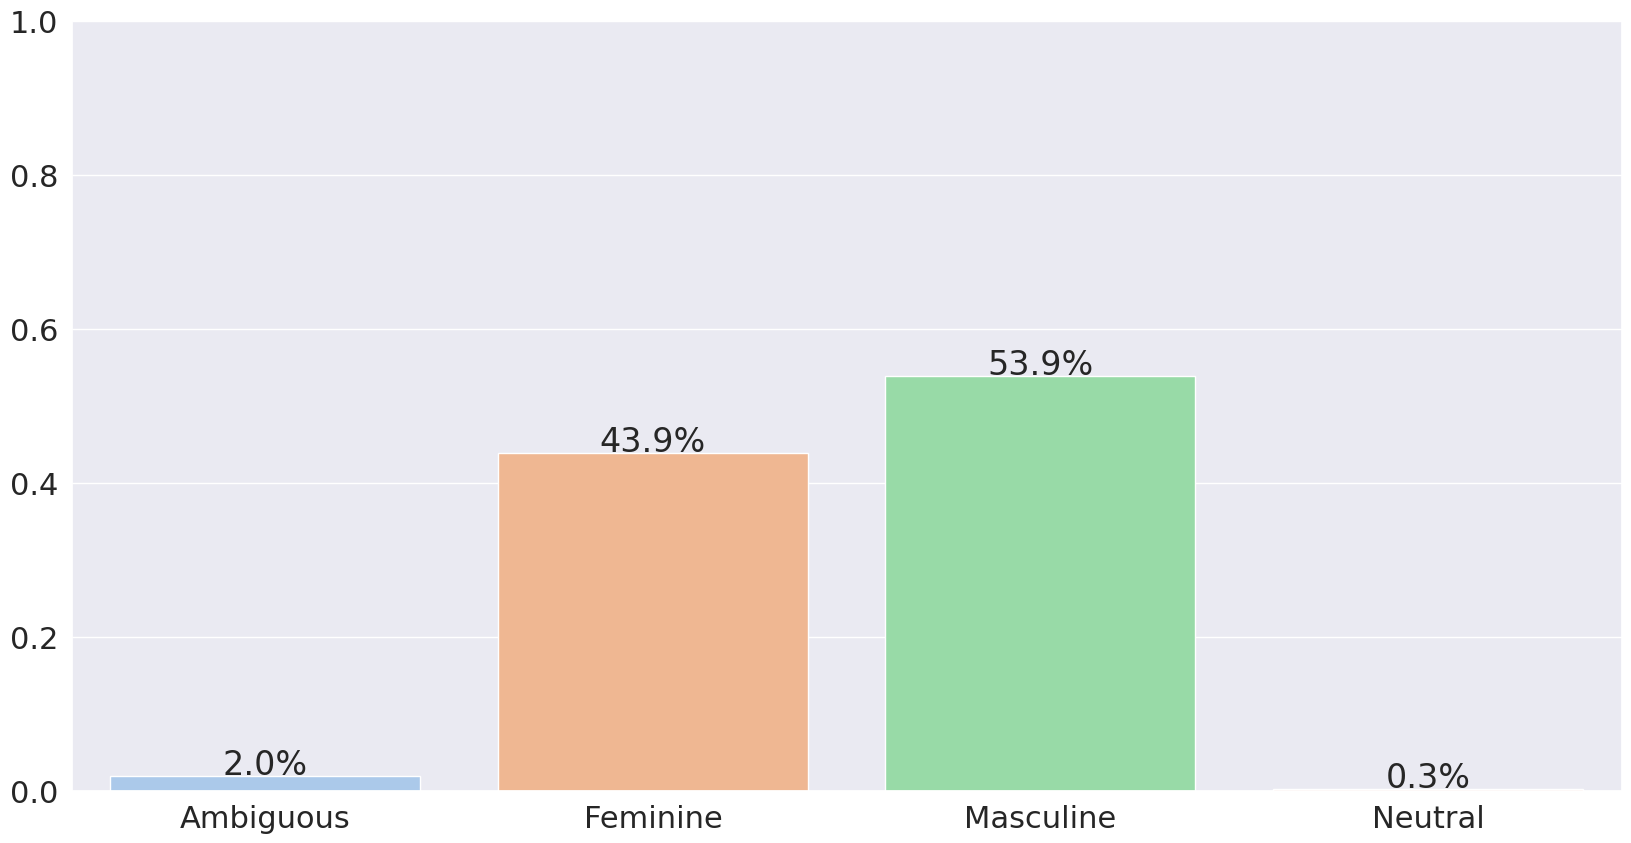

{'Masculine': 0.5388571428571428,
 'Feminine': 0.439047619047619,
 'Ambiguous': 0.019571428571428573,
 'Neutral': 0.0025238095238095237}

In [2]:
"""Nombre de générations par genre sur tout le corpus = ATTENTION, TOUS PROMPTS INCLUS Y COMPRIS NEUTRE/MASC/FEM"""
# TODO : FIX SCALE (X AXIS)
def exploration_donnees(dataset, label, gender, savefig=False, savecsv=False):
    # gender = féminin, masculin, undetermined, all => filtre pour voir résultats selon genre du prompt
    if gender == "all":
        dataset = dataset
    else:
        dataset = dataset[dataset["sex_prompt"] == gender]
    x = dataset[label].value_counts(normalize=True)

    #titre = "Nombre d'instances par étiquette"
    colors = sns.color_palette("pastel", len(x))
    sns.set(rc={"figure.figsize":(20, 10)})
    sns.set(font_scale=2)
    ax = sns.barplot(x=x.index, y=x, order=sorted(x.index), palette=colors)
    #ax = sns.barplot(x=x.index, y=x)
    #ax.set(title=titre)
    ax.set_ylim(0,1)
    ax.set_ylabel('')    
    ax.set_xlabel('')

    for p in ax.patches:
        ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

    if savefig:
        plt.savefig(f"fig/gender_distributions_{gender}.png", bbox_inches="tight")

    if savecsv:
        x.to_csv(f"value_counts_{label}.csv")

    plt.show()  # Display the plot
    return x.to_dict()

# ON ALL PROMPTS
exploration_donnees(data_genre,label,"all")

/tmp/ipykernel_38899/2894421649.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(ax=axes[i], x=x.index, y=x, order=sorted(x.index), palette=colors)
/tmp/ipykernel_38899/2894421649.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(ax=axes[i], x=x.index, y=x, order=sorted(x.index), palette=colors)
/tmp/ipykernel_38899/2894421649.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(ax=axes[i], x=x.index, y=x, order=sorted(x.index), palette=colors)


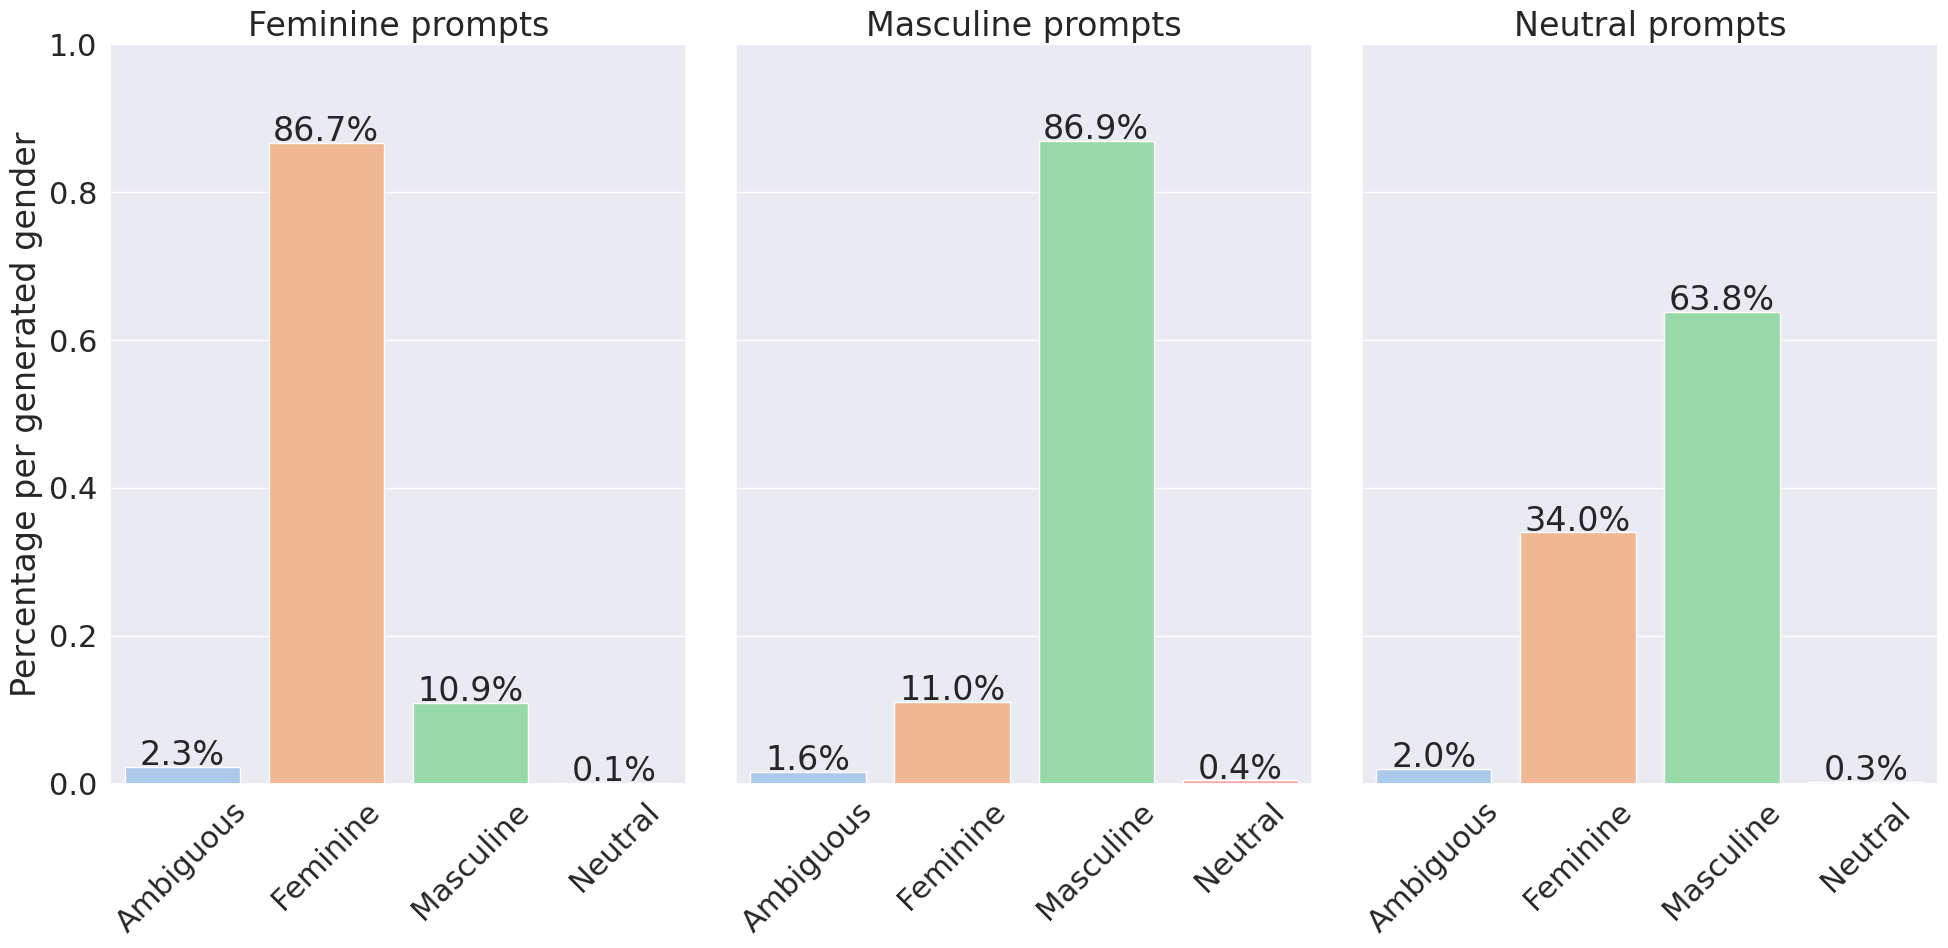

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

def exploration_donnees_subplots(dataset, label, savefig=False):
    genders = ["féminin", "masculin", "neutre"]#, "all"]
    
    # Set up the subplot grid (adjust the number of rows/columns based on your preferences)
    fig, axes = plt.subplots(1, len(genders), figsize=(20, 10), sharey=True)
    
    sns.set(font_scale=2)
    
    for i, gender in enumerate(genders):
        if gender == "all":
            data = dataset
        else:
            data = dataset[dataset["sex_prompt"] == gender]
        
        x = data[label].value_counts(normalize=True)
        colors = sns.color_palette("pastel", len(x))
        en_genders = {"féminin":"feminine", "masculin": "masculine", "neutre":"neutral"}
        
        ax = sns.barplot(ax=axes[i], x=x.index, y=x, order=sorted(x.index), palette=colors)
        ax.set_ylim(0, 1)
        ax.set_ylabel('' if i != 0 else 'Percentage per generated gender')
        ax.set_xlabel('')
        #ax.set_title("Prompts "+gender+"s")    
        ax.set_title(en_genders[gender].capitalize()+" prompts")
        ax.tick_params(axis='x', labelrotation=45)
        
        # Annotate bars with percentages
        for p in ax.patches:
            ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', xytext=(0, 8), textcoords='offset points')
        
    plt.tight_layout()
    
    if savefig:
        plt.savefig(f"../../bias_results/fig/gender_distributions_sexprompts.pdf", bbox_inches="tight")
    
    plt.show()

exploration_donnees_subplots(data_genre, label, True)

/tmp/ipykernel_63662/3445358038.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x, order=sorted(x.index), palette=colors)


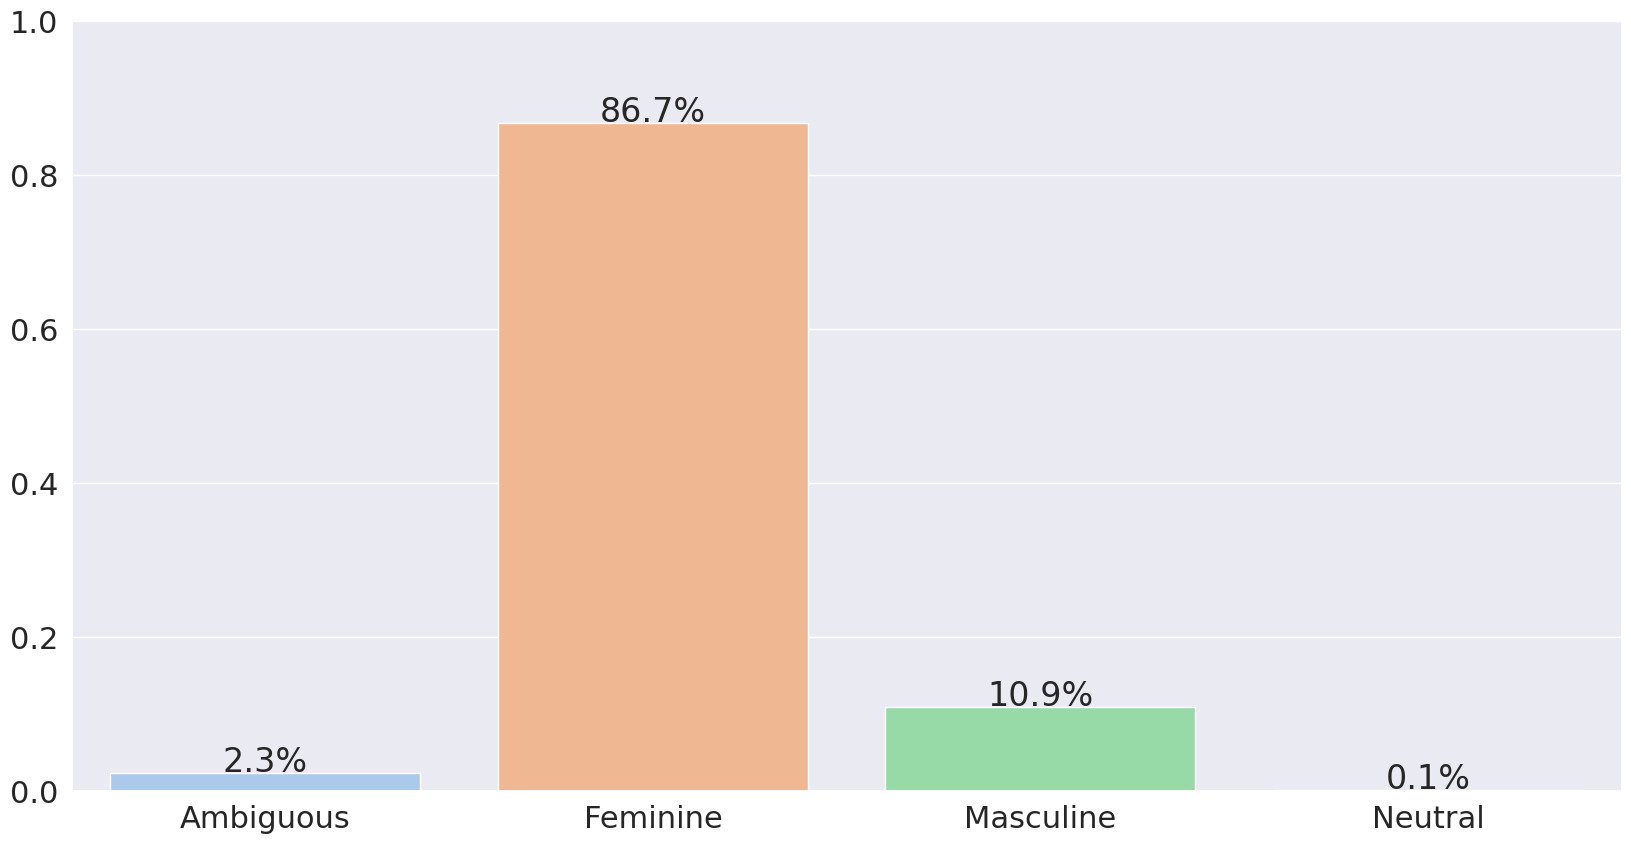

{'Feminine': 0.8668571428571429,
 'Masculine': 0.10942857142857143,
 'Ambiguous': 0.023,
 'Neutral': 0.0007142857142857143}

In [39]:
# FOR ALL FEMININE PROMPTS
exploration_donnees(data_genre,label,"féminin")

/tmp/ipykernel_63662/3445358038.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x, order=sorted(x.index), palette=colors)


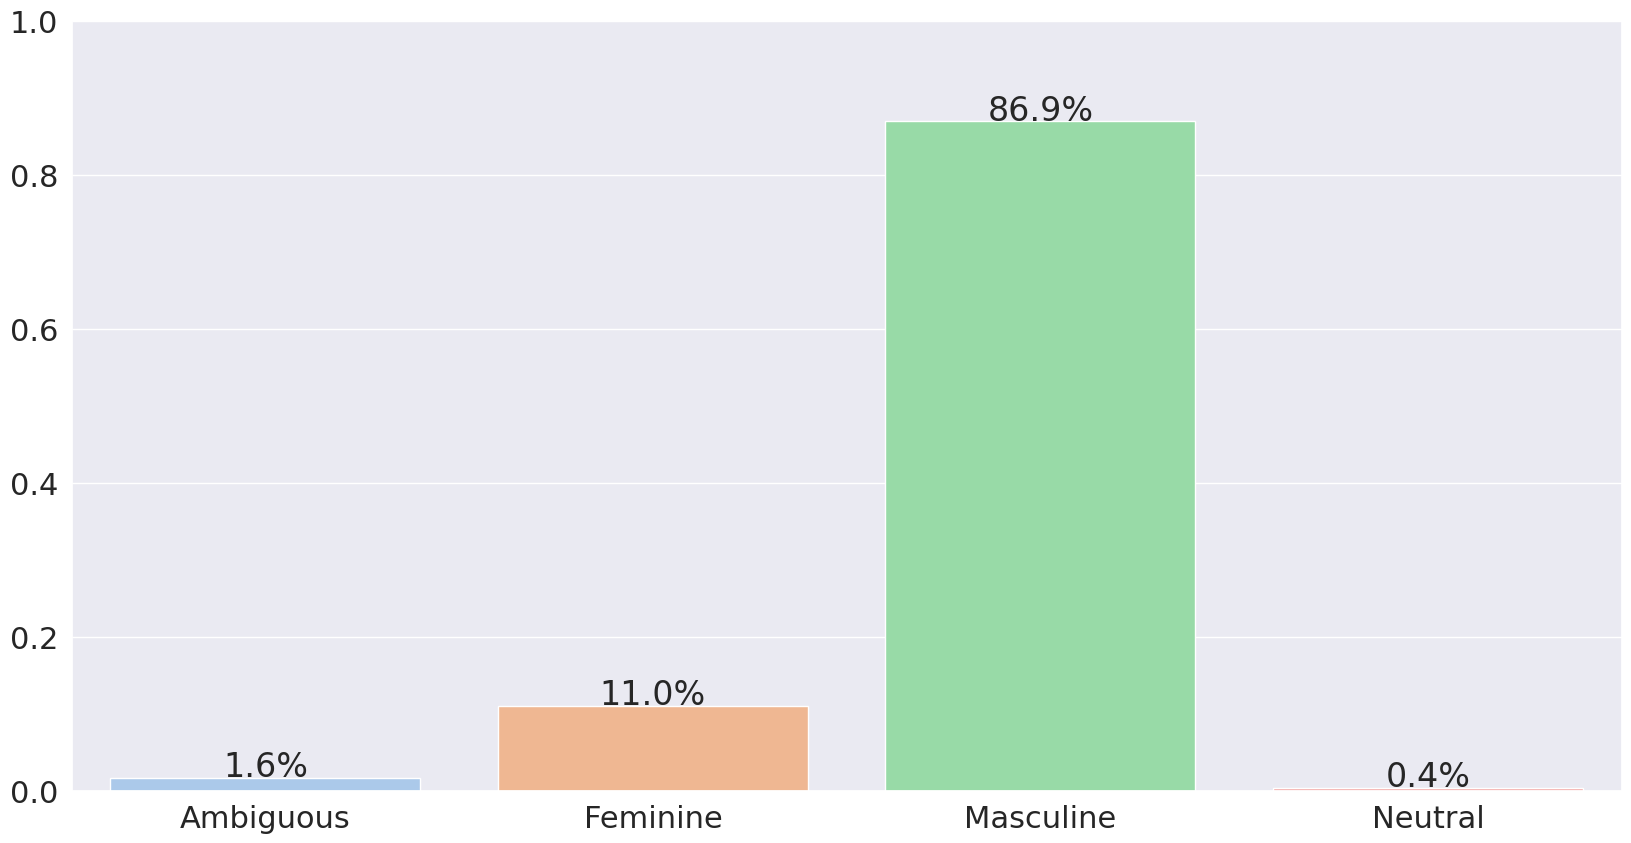

{'Masculine': 0.8692857142857143,
 'Feminine': 0.11042857142857143,
 'Ambiguous': 0.016142857142857143,
 'Neutral': 0.004142857142857143}

In [40]:
exploration_donnees(data_genre,label,"masculin")

/tmp/ipykernel_63662/3445358038.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x.index, y=x, order=sorted(x.index), palette=colors)


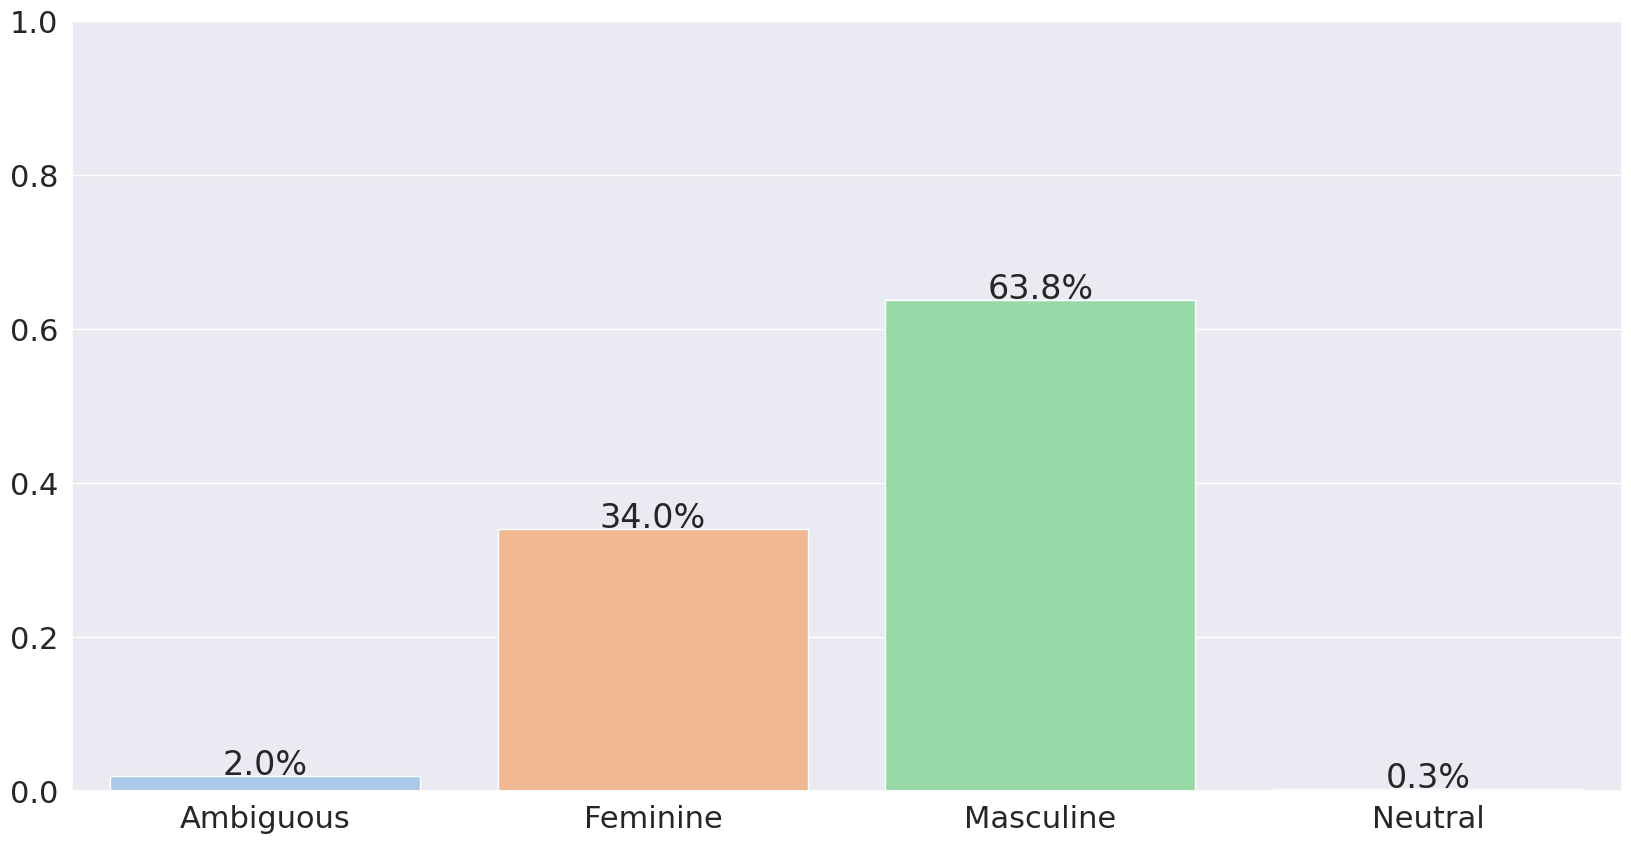

{'Masculine': 0.6378571428571429,
 'Feminine': 0.33985714285714286,
 'Ambiguous': 0.019571428571428573,
 'Neutral': 0.0027142857142857142}

In [41]:
exploration_donnees(data_genre,label,"neutre")

Masculine    Feminine    Ambiguous    Neutral    model
-----------  ----------  -----------  ---------  ------------------------
52.4%        45.6%       1.9%         0.1%       Llama-3-1-8B-Instruct-bf
50.8%        46.7%       2.3%         0.1%       Llama-3-1-8B-bf
56.0%        42.5%       1.4%         0.2%       bloom-7b1
56.6%        41.0%       1.9%         0.5%       vigogne-2-13b
48.1%        49.3%       2.0%         0.5%       vigogne-2-7b
53.3%        44.2%       2.1%         0.4%       bloom-1b1
59.9%        38.0%       2.0%         0.0%       BioMistral-7b-SLERP


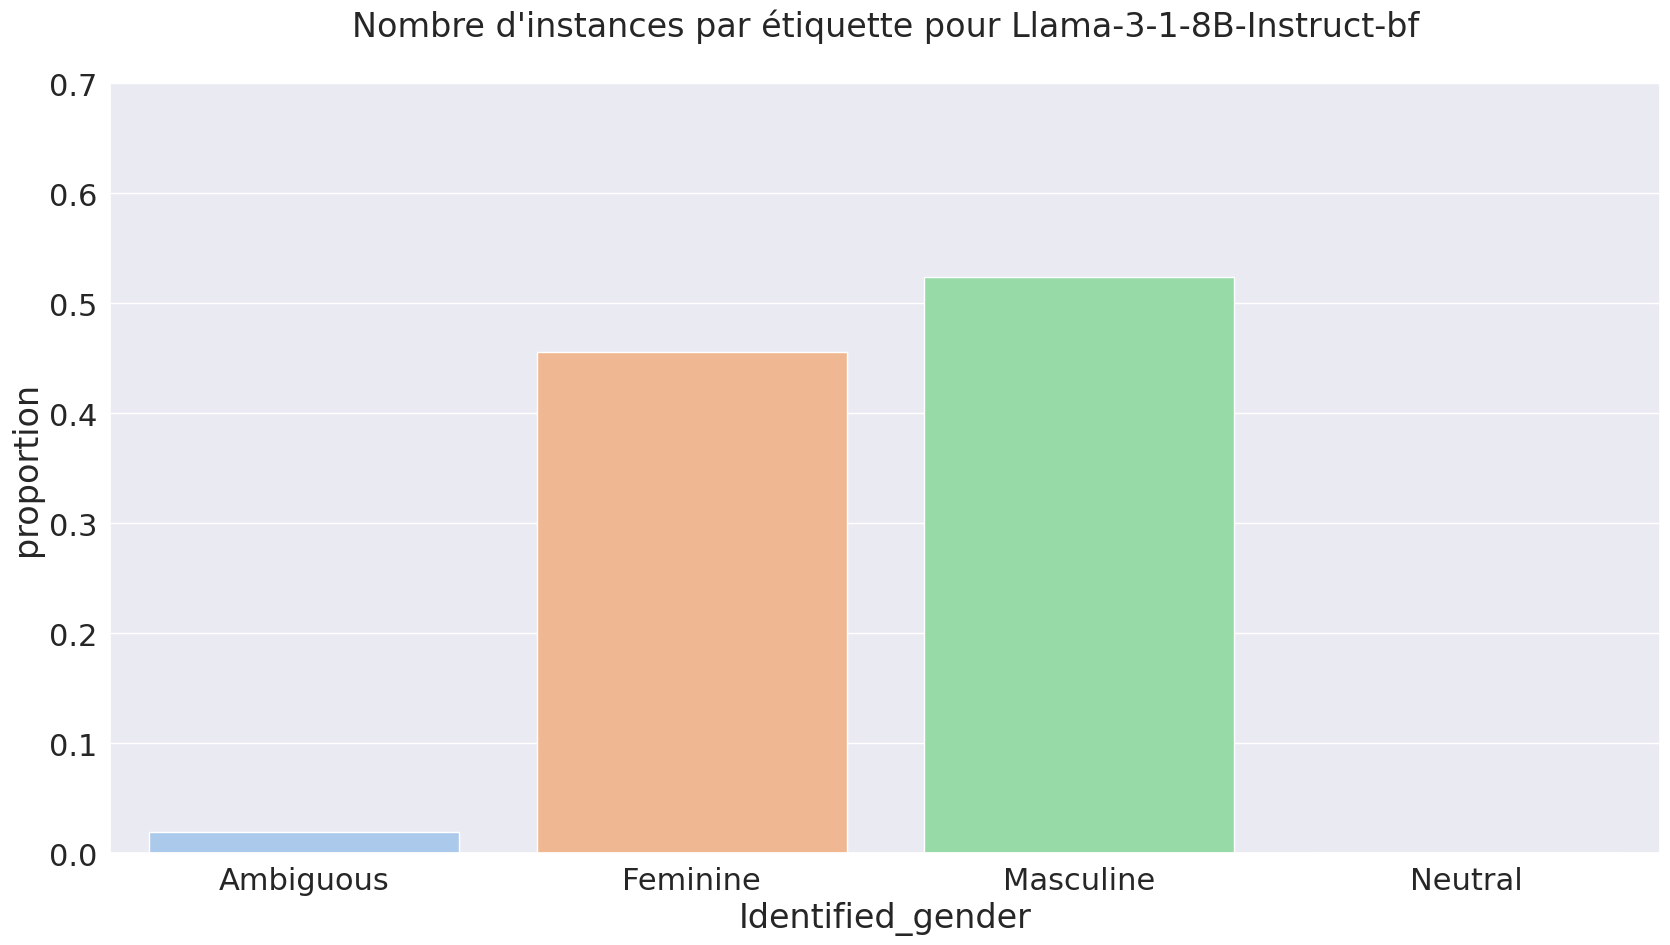

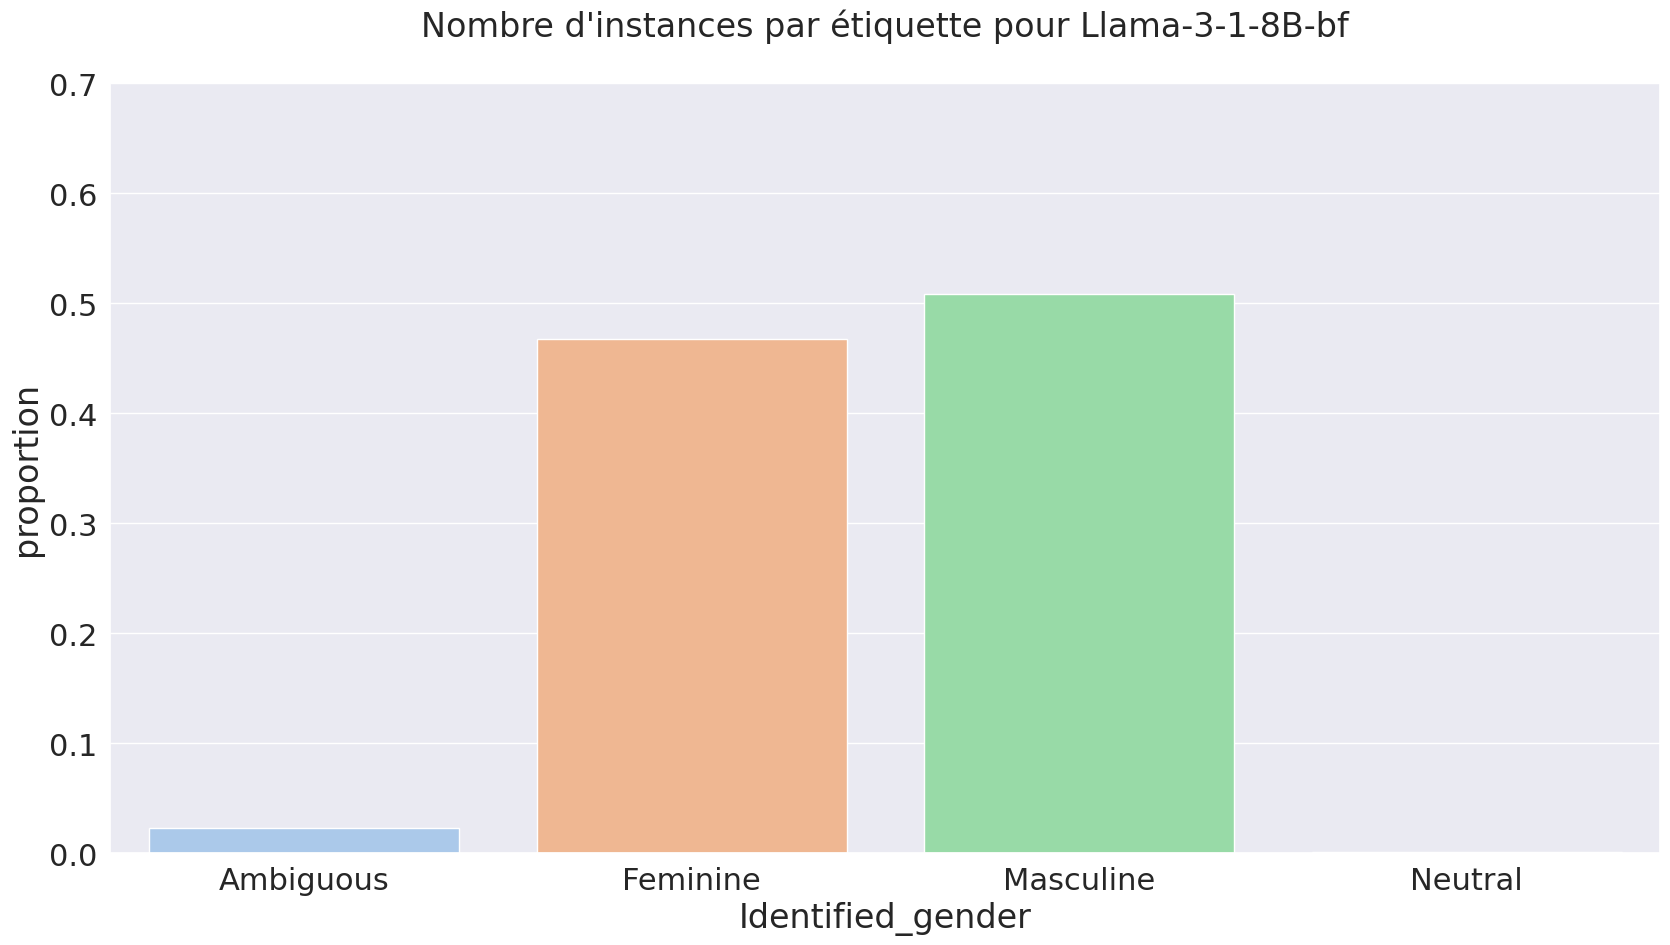

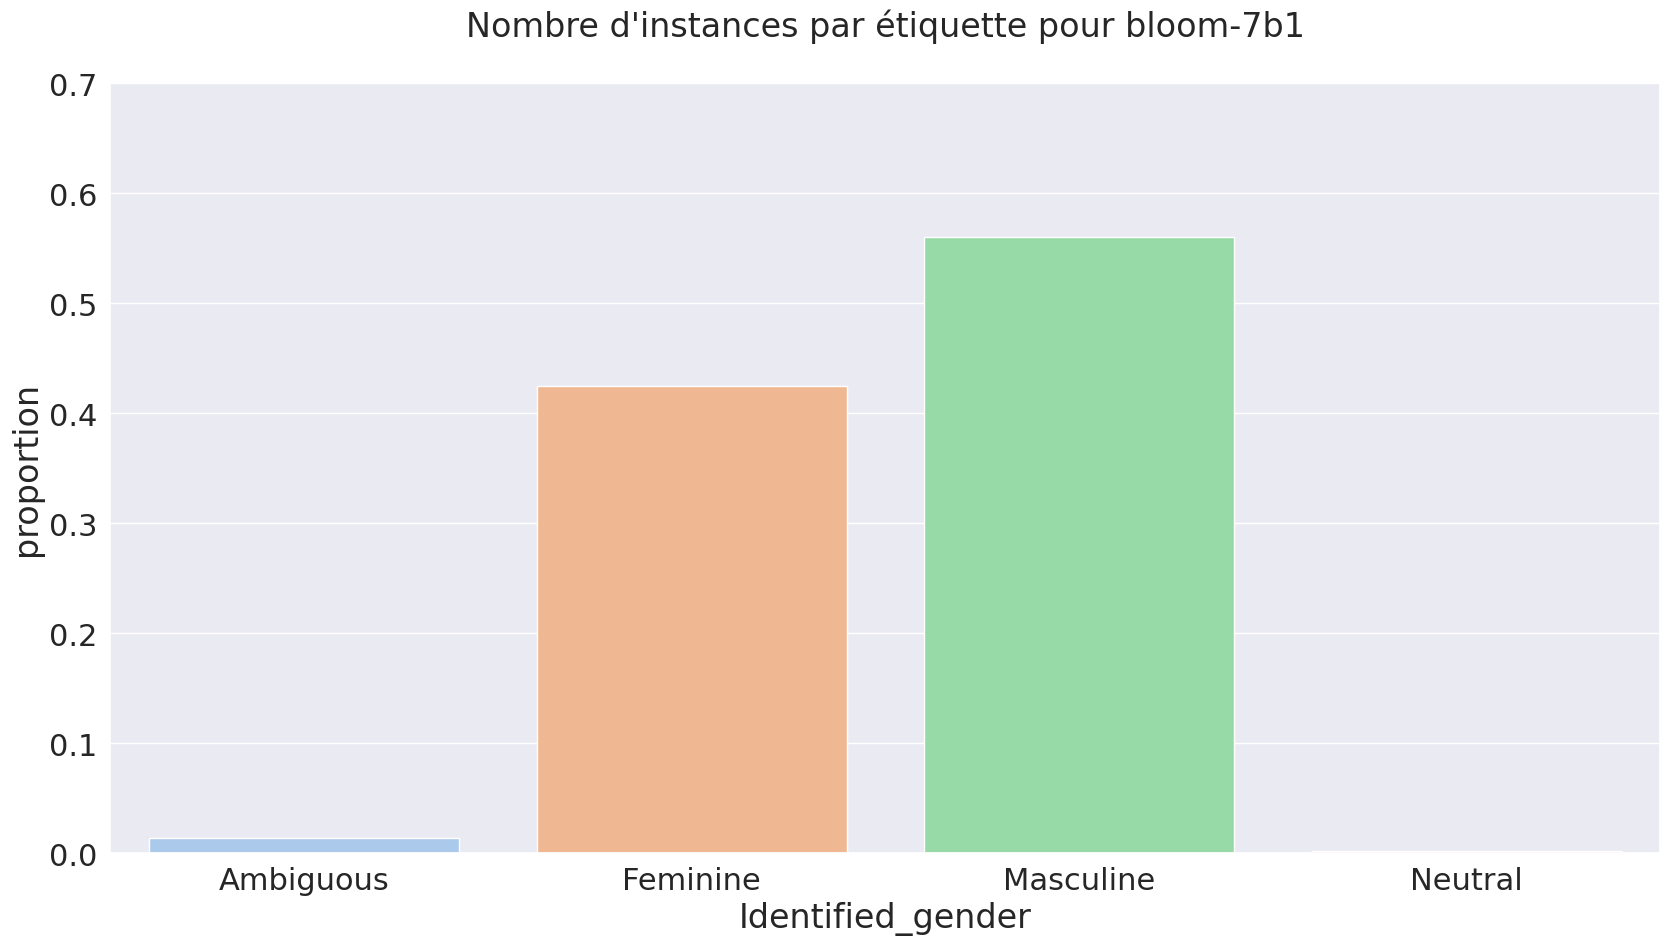

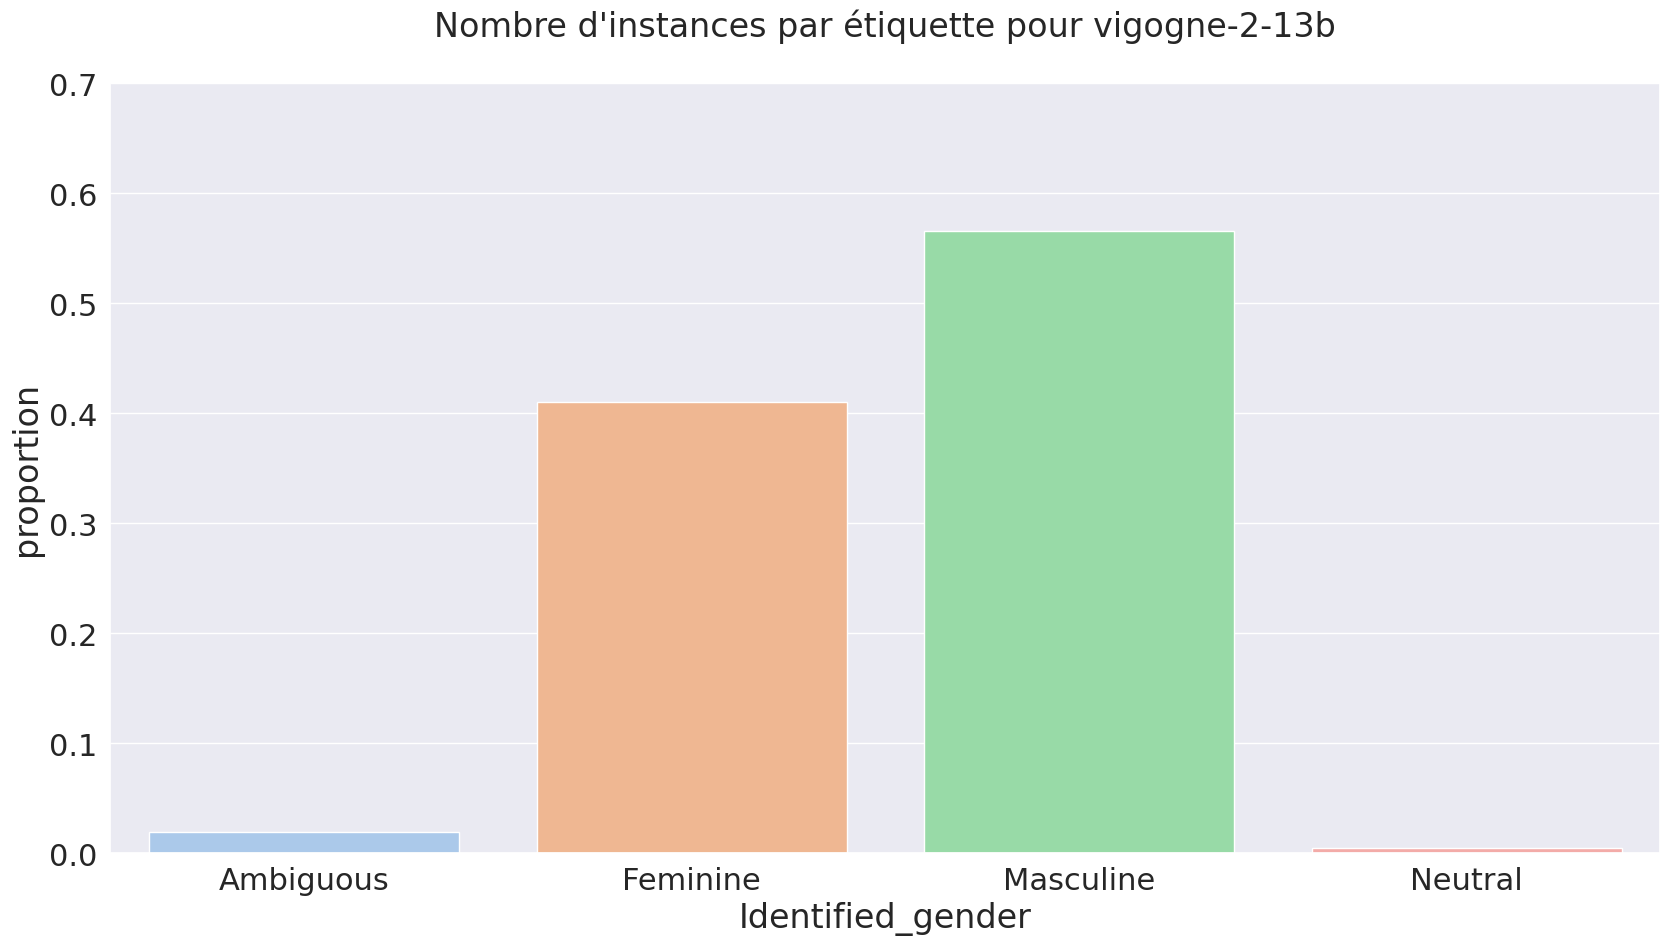

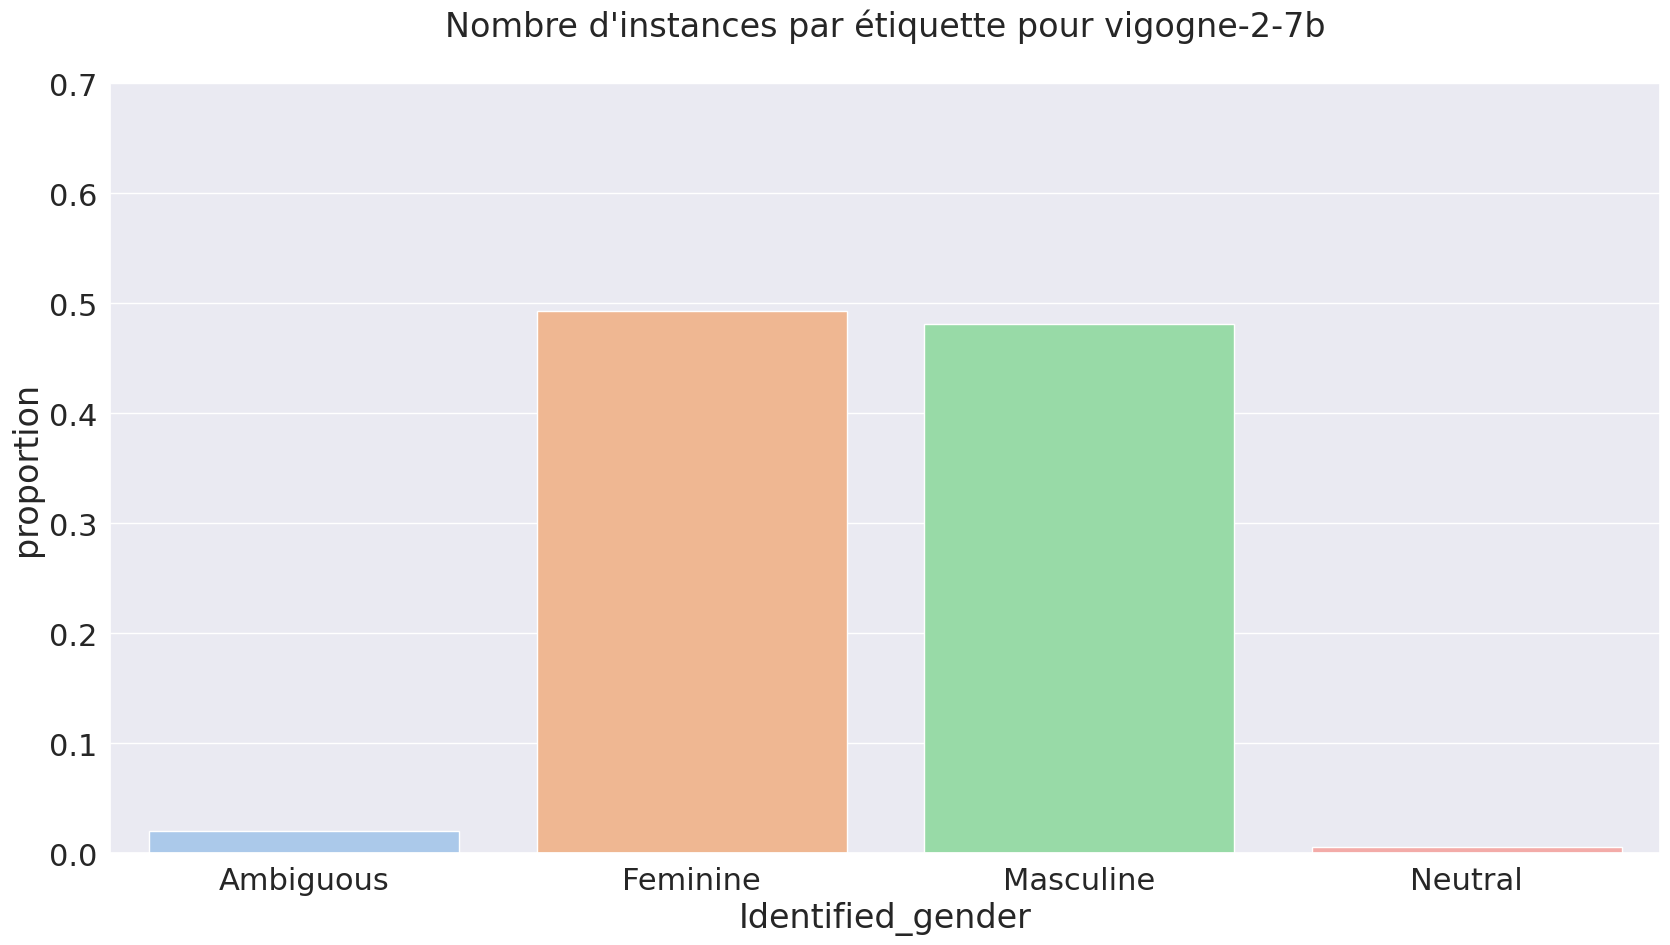

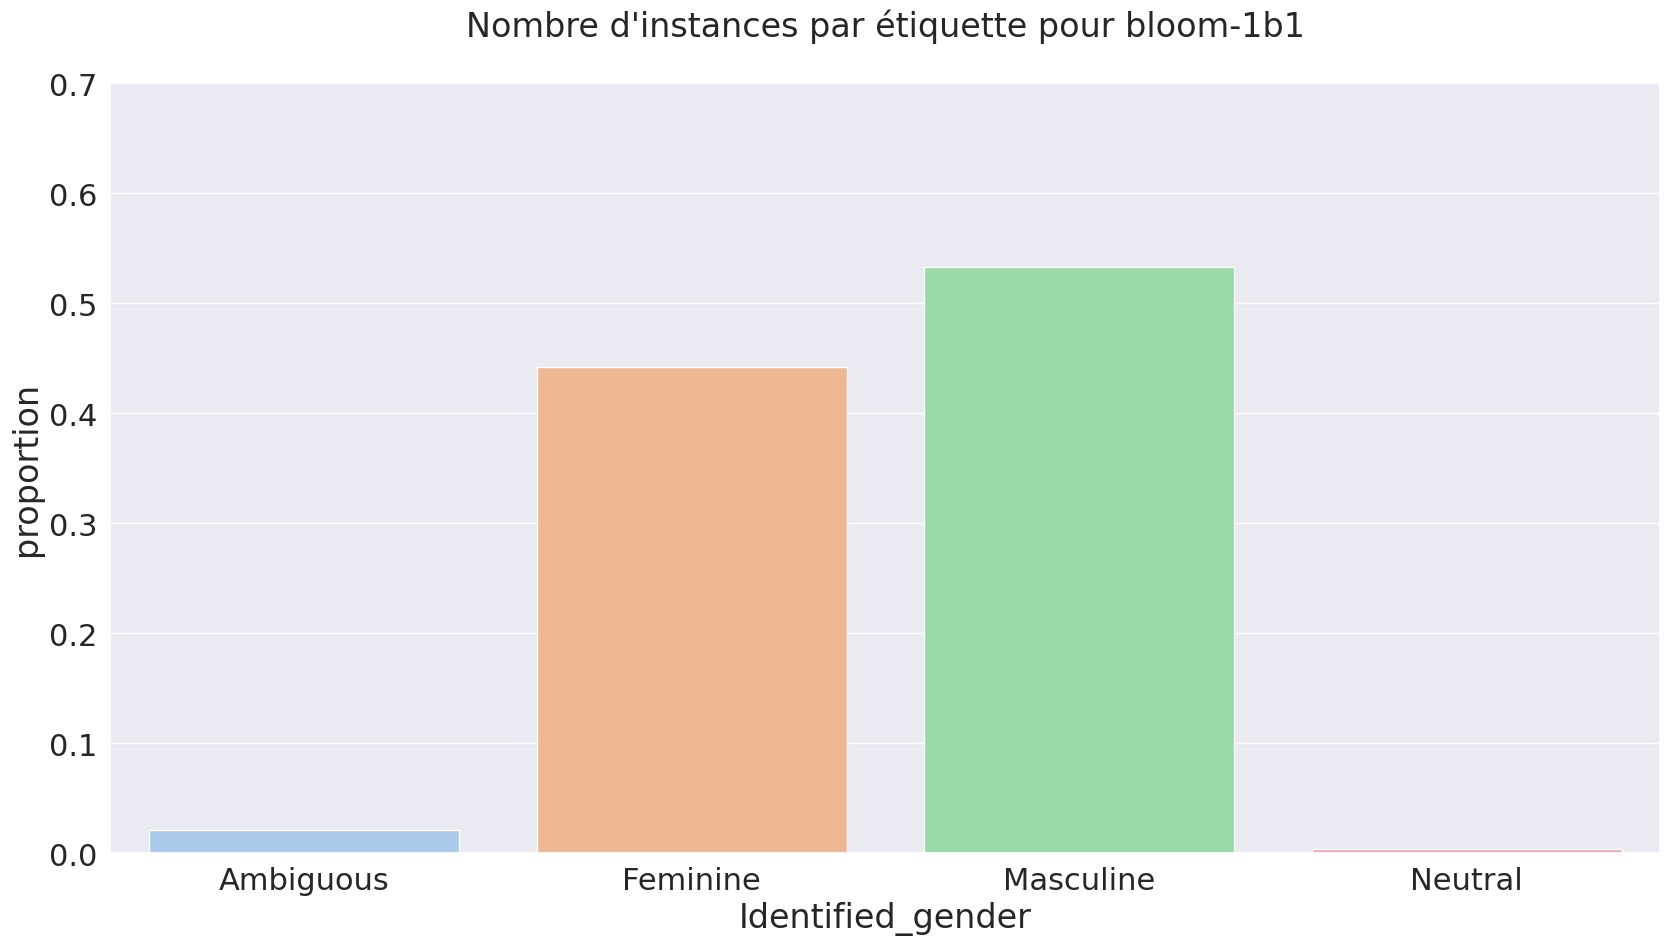

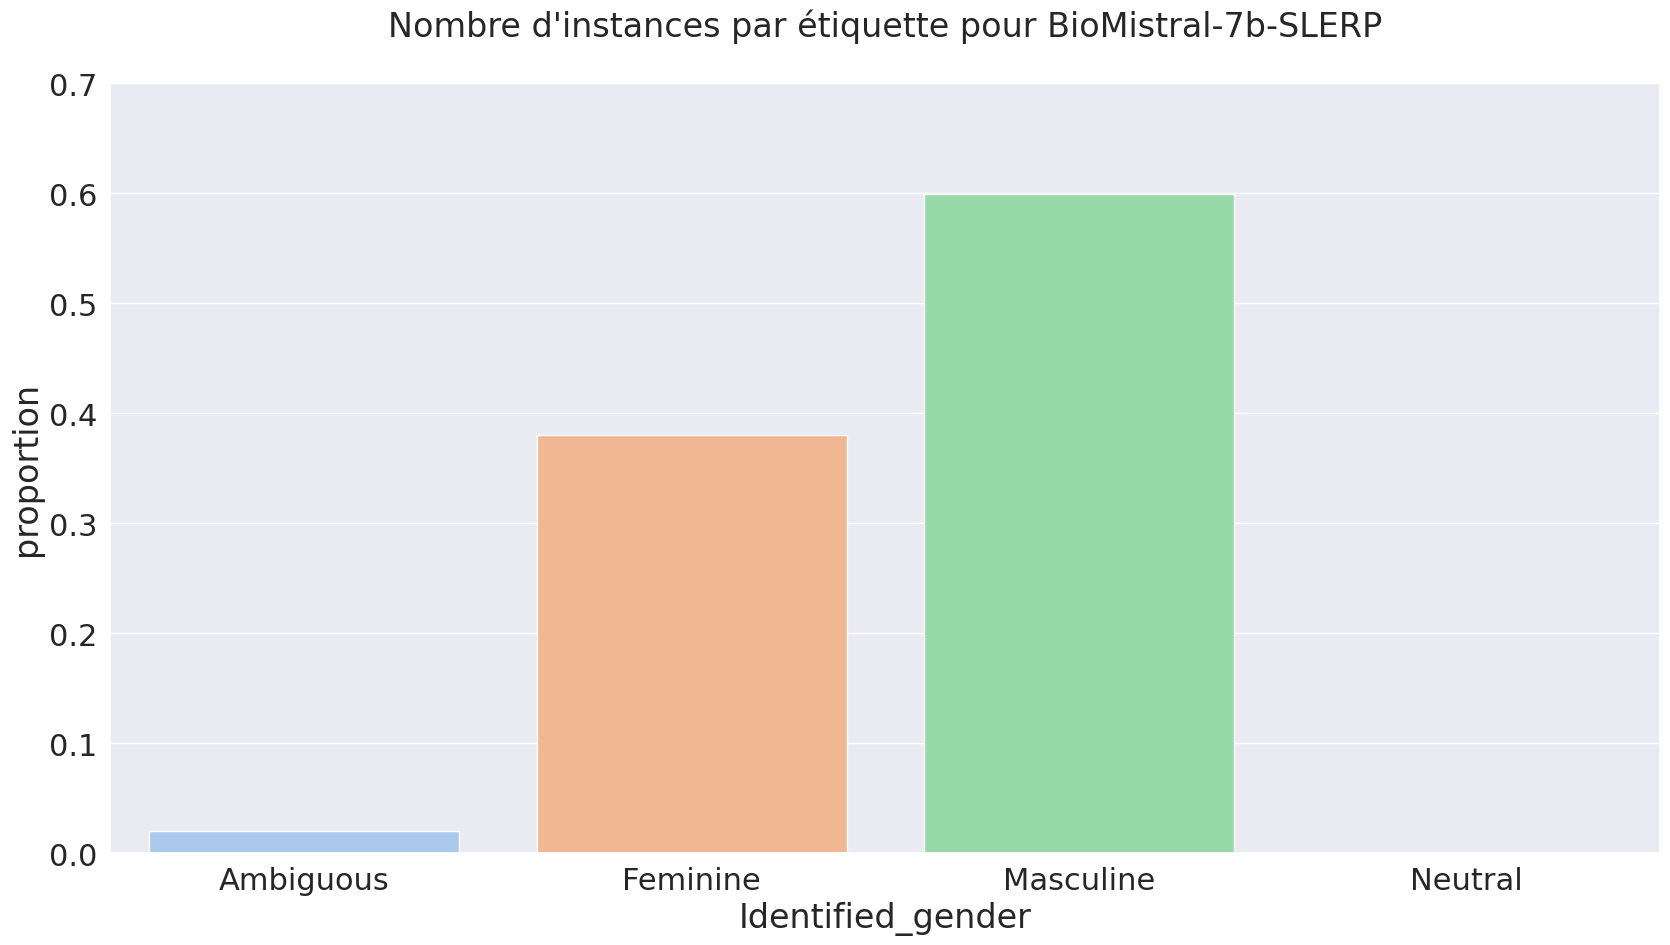

In [4]:
"""Nombre de générations par genre selon le modèle"""

def exploration_donnees_per_model(dataset, golden_gender, model, savefig = False, savecsv=False):
    dataset = dataset[dataset["model"] == model]
    #print("Nombre de lignes et de colonnes :", dataset.shape)
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    colors = sns.color_palette("pastel", len(x))

    titre = f"Nombre d'instances par étiquette pour {model}\n"
    
    plt.figure()
    plt.ylim(0, 0.7)
    sns.barplot(x=x_fig.index,y=x_fig, order=sorted(x.index), palette=colors).set(title=titre)
    #for p in ax.patches:
        #ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

    if savefig:
        plt.savefig(f"fig/gender_distributions_{model}_fr.png")
        
    #if savecsv:
        #x.to_csv(f"value_counts_{label}_{model}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')
table = []

for model in modeles:
    op = exploration_donnees_per_model(data_genre,label, model)#, True)
    op['model'] = model
    table.append(op)

print(tabulate(table, headers='keys'))
#txt = "gender_pct_per_model_{label}.txt"
#with open(txt, mode="w") as f:
    #print(tabulate(table, headers='keys'), file=txt)

[{'Masculine': '52.4%', 'Feminine': '45.6%', 'Ambiguous': '1.9%', 'Neutral': '0.1%', 'model': 'Llama-3-1-8B-Instruct-bf'}, {'Masculine': '50.8%', 'Feminine': '46.7%', 'Ambiguous': '2.3%', 'Neutral': '0.1%', 'model': 'Llama-3-1-8B-bf'}, {'Masculine': '56.0%', 'Feminine': '42.5%', 'Ambiguous': '1.4%', 'Neutral': '0.2%', 'model': 'bloom-7b1'}, {'Masculine': '56.6%', 'Feminine': '41.0%', 'Ambiguous': '1.9%', 'Neutral': '0.5%', 'model': 'vigogne-2-13b'}, {'Feminine': '49.3%', 'Masculine': '48.1%', 'Ambiguous': '2.0%', 'Neutral': '0.5%', 'model': 'vigogne-2-7b'}, {'Masculine': '53.3%', 'Feminine': '44.2%', 'Ambiguous': '2.1%', 'Neutral': '0.4%', 'model': 'bloom-1b1'}, {'Masculine': '59.9%', 'Feminine': '38.0%', 'Ambiguous': '2.0%', 'Neutral': '0.0%', 'model': 'BioMistral-7b-SLERP'}]
[{'Masculine': 53.87142857142857, 'Feminine': 43.9, 'Neutral': 0.2571428571428571, 'Ambiguous': 1.9428571428571428}, {'Neutral': 0.1, 'Feminine': 45.6, 'Masculine': 52.4, 'Ambiguous': 1.9}, {'Neutral': 0.1, 'Femi

[]

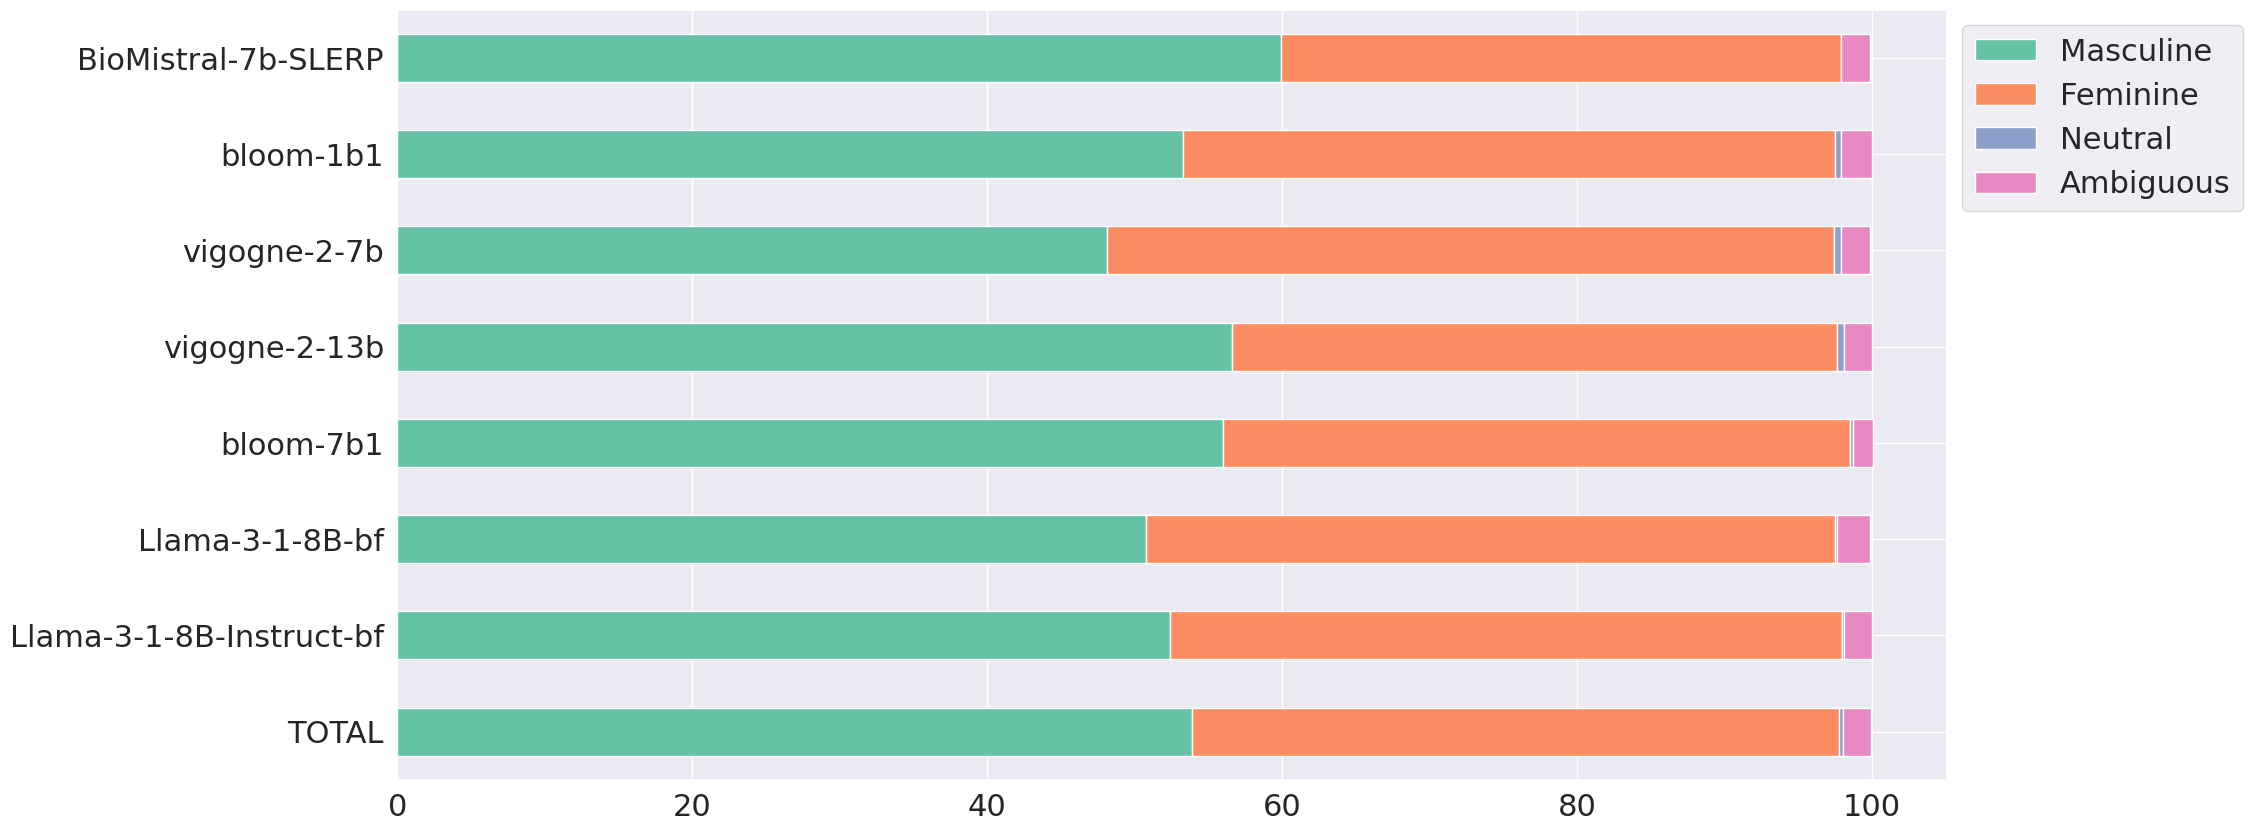

In [6]:
for d in table:
    if "Ambiguous" not in d:
        d["Ambiguous"]="0%"
table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
             "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]
    
print(table)
# ajouter une barre pour le total
total = {}
for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)   
table_new.insert(0,total)

print(table_new)

df = pd.DataFrame(table_new, index=['TOTAL']+modeles)
ax = df.plot(kind="barh", stacked=True,color=sns.color_palette("Set2"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
#plt.savefig("fig/auto_gender_per_model.png",bbox_inches = "tight")
ax.plot()

In [35]:
"""Nombre de générations par genre selon le domaine professionnel, pour les 10 domaines du corpus Référence
(pour pouvoir comparer avec les résultats sur les données annotées manuellement)"""

def exploration_donnees_per_topic(dataset, golden_gender, topic, savefig = False, savecsv=False):
    dataset = dataset[dataset["pathologie"] == topic]
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    titre = f"Nombre d'instances par étiquette pour {topic}\n"

    if savefig:
        plt.savefig(f"fig/gender_distributions_{label}_{topic}_fr.png")
    
    if savecsv:
        x.to_csv(f"value_counts_{label}_{topic}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')
topics = list(set(data_genre["pathologie"]))

table = []

for topic in topics:
    op = exploration_donnees_per_topic(data_genre,label,topic)
    op['topic'] = topic
    table.append(op)

print(tabulate(table, headers='keys'))

Masculine    Feminine    Ambiguous    Neutral    topic
-----------  ----------  -----------  ---------  -------------
64.4%        33.4%       2.0%         0.2%       infarctus
61.6%        36.6%       1.6%         0.2%       COVID-19
66.0%        31.7%       1.8%         0.5%       drepanocytose
57.9%        40.0%       2.1%         0.0%       colon
27.8%        70.2%       2.0%         0.1%       ovaire
24.0%        74.2%       1.8%         0.0%       sein
54.1%        43.6%       2.0%         0.3%       osteoporose
68.6%        28.3%       2.7%         0.5%       prostate
60.7%        36.5%       2.3%         0.5%       vessie
53.9%        44.6%       1.3%         0.1%       depression


In [13]:
table

[{'Masculine': '64.4%',
  'Feminine': '33.4%',
  'Ambiguous': '2.0%',
  'Neutral': '0.2%',
  'topic': 'infarctus'},
 {'Masculine': '61.6%',
  'Feminine': '36.6%',
  'Ambiguous': '1.6%',
  'Neutral': '0.2%',
  'topic': 'COVID-19'},
 {'Masculine': '66.0%',
  'Feminine': '31.7%',
  'Ambiguous': '1.8%',
  'Neutral': '0.5%',
  'topic': 'drepanocytose'},
 {'Masculine': '57.9%',
  'Feminine': '40.0%',
  'Ambiguous': '2.1%',
  'Neutral': '0.0%',
  'topic': 'colon'},
 {'Feminine': '70.2%',
  'Masculine': '27.8%',
  'Ambiguous': '2.0%',
  'Neutral': '0.1%',
  'topic': 'ovaire'},
 {'Feminine': '74.2%',
  'Masculine': '24.0%',
  'Ambiguous': '1.8%',
  'Neutral': '0.0%',
  'topic': 'sein'},
 {'Masculine': '54.1%',
  'Feminine': '43.6%',
  'Ambiguous': '2.0%',
  'Neutral': '0.3%',
  'topic': 'osteoporose'},
 {'Masculine': '68.6%',
  'Feminine': '28.3%',
  'Ambiguous': '2.7%',
  'Neutral': '0.5%',
  'topic': 'prostate'},
 {'Masculine': '60.7%',
  'Feminine': '36.5%',
  'Ambiguous': '2.3%',
  'Neutral

FileNotFoundError: [Errno 2] No such file or directory: '/home/ducel/Pycharm-these/ClinicalCaseBias/src/bias_exploration/bias_results/fig/auto_gender_per_topic_10.png'

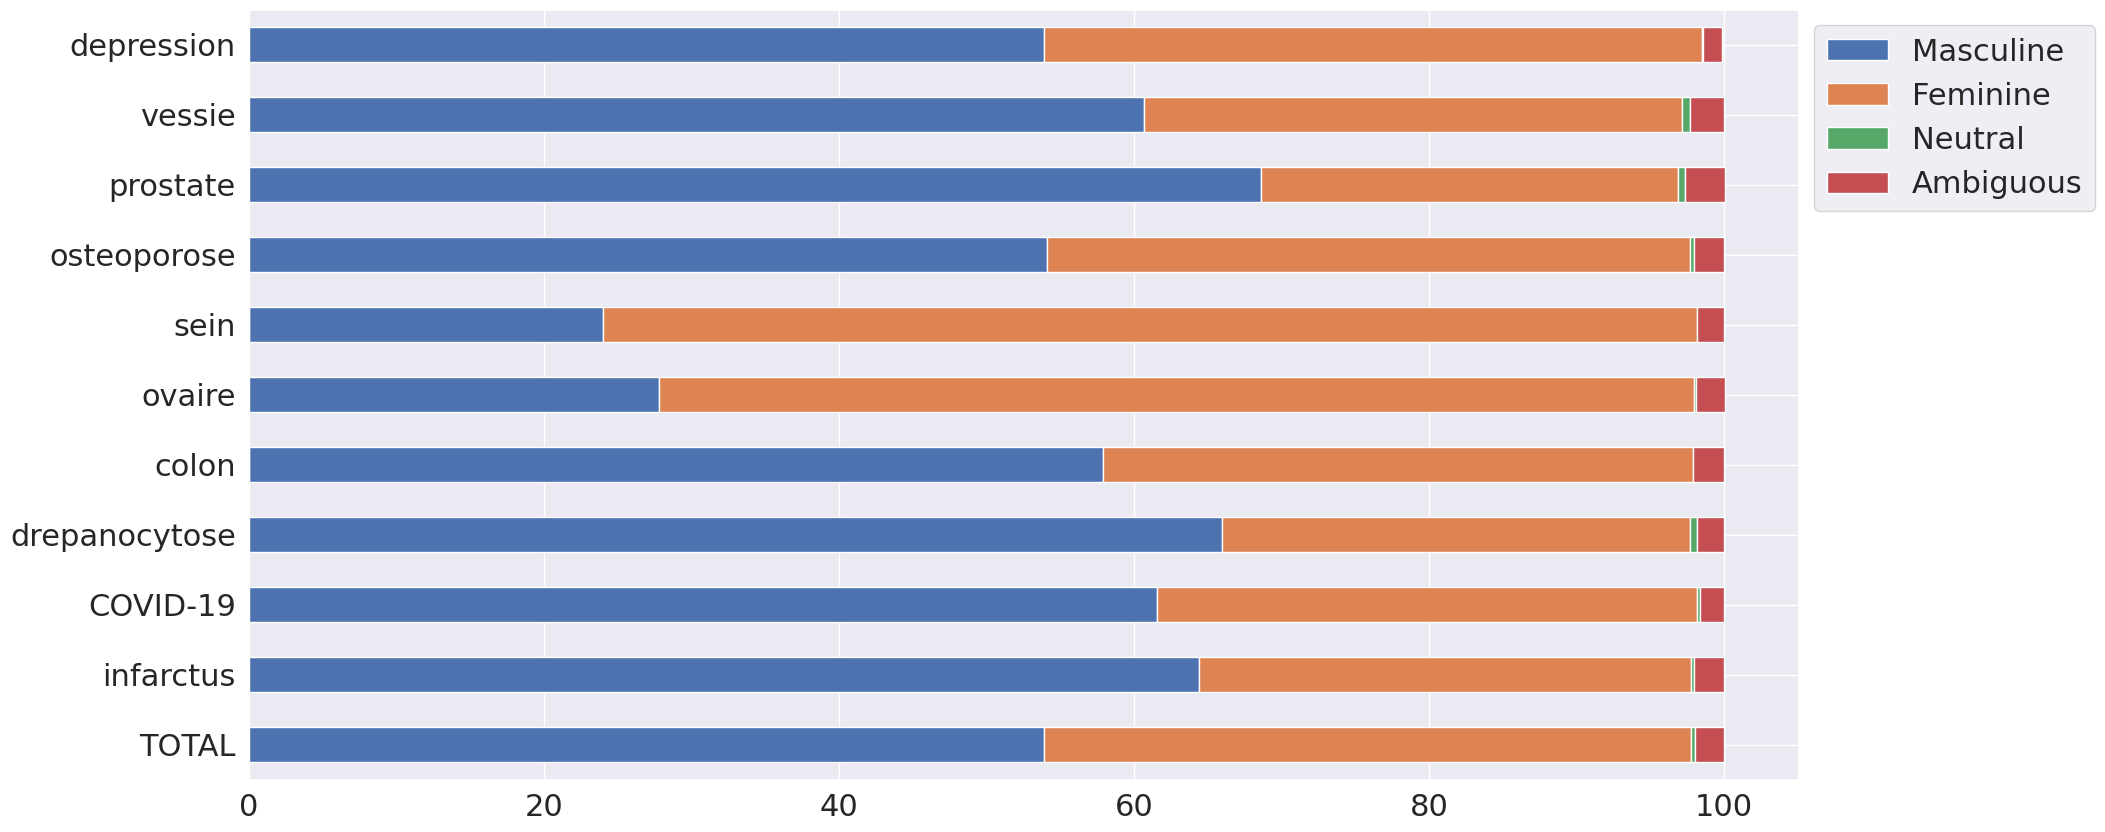

In [36]:
for d in table:
    if "Ambiguous" not in d:
        d["Ambiguous"]="0%"
    if "Neutral" not in d:
        d["Neutral"]="0%"
    if "Masculine" not in d:
        d["Masculine"]="0%"
        
table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
             "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]


# ajouter une barre pour le total
total = {}
for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)
table_new.insert(0,total)
#print(table_new)

df = pd.DataFrame(table_new, index=["TOTAL"]+topics)
ax = df.plot(kind="barh", stacked=True)
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig("bias_results/fig/auto_gender_per_topic_10.png",bbox_inches = "tight")
ax.plot()

In [15]:
table_new

[{'Masculine': 53.9,
  'Feminine': 43.910000000000004,
  'Neutral': 0.24,
  'Ambiguous': 1.9600000000000002},
 {'Neutral': 0.2, 'Feminine': 33.4, 'Masculine': 64.4, 'Ambiguous': 2.0},
 {'Neutral': 0.2, 'Feminine': 36.6, 'Masculine': 61.6, 'Ambiguous': 1.6},
 {'Neutral': 0.5, 'Feminine': 31.7, 'Masculine': 66.0, 'Ambiguous': 1.8},
 {'Neutral': 0.0, 'Feminine': 40.0, 'Masculine': 57.9, 'Ambiguous': 2.1},
 {'Neutral': 0.1, 'Feminine': 70.2, 'Masculine': 27.8, 'Ambiguous': 2.0},
 {'Neutral': 0.0, 'Feminine': 74.2, 'Masculine': 24.0, 'Ambiguous': 1.8},
 {'Neutral': 0.3, 'Feminine': 43.6, 'Masculine': 54.1, 'Ambiguous': 2.0},
 {'Neutral': 0.5, 'Feminine': 28.3, 'Masculine': 68.6, 'Ambiguous': 2.7},
 {'Neutral': 0.5, 'Feminine': 36.5, 'Masculine': 60.7, 'Ambiguous': 2.3},
 {'Neutral': 0.1, 'Feminine': 44.6, 'Masculine': 53.9, 'Ambiguous': 1.3}]

In [37]:
"""Sur neutres seulement"""
data_neutre = data_genre[data_genre["sex_prompt"]=="neutre"]
table_generated = []

for topic in topics:
    op = exploration_donnees_per_topic(data_neutre,label,topic)
    op['topic'] = topic
    table_generated.append(op)

print(tabulate(table_generated, headers='keys'))

Masculine    Feminine    Ambiguous    Neutral    topic
-----------  ----------  -----------  ---------  -------------
85.7%        11.6%       2.4%         0.3%       infarctus
77.4%        21.3%       1.1%         0.1%       COVID-19
84.0%        13.7%       1.4%         0.9%       drepanocytose
74.0%        24.1%       1.9%                    colon
12.4%        85.3%       2.0%         0.3%       ovaire
10.3%        88.9%       0.9%                    sein
64.1%        33.0%       2.7%         0.1%       osteoporose
86.0%        10.7%       2.7%         0.6%       prostate
80.6%        16.4%       2.7%         0.3%       vessie
63.3%        34.9%       1.7%         0.1%       depression


In [17]:
table_generated

[{'Masculine': '85.7%',
  'Feminine': '11.6%',
  'Ambiguous': '2.4%',
  'Neutral': '0.3%',
  'topic': 'infarctus'},
 {'Masculine': '77.4%',
  'Feminine': '21.3%',
  'Ambiguous': '1.1%',
  'Neutral': '0.1%',
  'topic': 'COVID-19'},
 {'Masculine': '84.0%',
  'Feminine': '13.7%',
  'Ambiguous': '1.4%',
  'Neutral': '0.9%',
  'topic': 'drepanocytose'},
 {'Masculine': '74.0%',
  'Feminine': '24.1%',
  'Ambiguous': '1.9%',
  'topic': 'colon'},
 {'Feminine': '85.3%',
  'Masculine': '12.4%',
  'Ambiguous': '2.0%',
  'Neutral': '0.3%',
  'topic': 'ovaire'},
 {'Feminine': '88.9%',
  'Masculine': '10.3%',
  'Ambiguous': '0.9%',
  'topic': 'sein'},
 {'Masculine': '64.1%',
  'Feminine': '33.0%',
  'Ambiguous': '2.7%',
  'Neutral': '0.1%',
  'topic': 'osteoporose'},
 {'Masculine': '86.0%',
  'Feminine': '10.7%',
  'Ambiguous': '2.7%',
  'Neutral': '0.6%',
  'topic': 'prostate'},
 {'Masculine': '80.6%',
  'Feminine': '16.4%',
  'Ambiguous': '2.7%',
  'Neutral': '0.3%',
  'topic': 'vessie'},
 {'Mascul

In [38]:
table_generated = sorted(table_generated, key=lambda d: d['topic'])
table_generated

[{'Masculine': '77.4%',
  'Feminine': '21.3%',
  'Ambiguous': '1.1%',
  'Neutral': '0.1%',
  'topic': 'COVID-19'},
 {'Masculine': '74.0%',
  'Feminine': '24.1%',
  'Ambiguous': '1.9%',
  'topic': 'colon'},
 {'Masculine': '63.3%',
  'Feminine': '34.9%',
  'Ambiguous': '1.7%',
  'Neutral': '0.1%',
  'topic': 'depression'},
 {'Masculine': '84.0%',
  'Feminine': '13.7%',
  'Ambiguous': '1.4%',
  'Neutral': '0.9%',
  'topic': 'drepanocytose'},
 {'Masculine': '85.7%',
  'Feminine': '11.6%',
  'Ambiguous': '2.4%',
  'Neutral': '0.3%',
  'topic': 'infarctus'},
 {'Masculine': '64.1%',
  'Feminine': '33.0%',
  'Ambiguous': '2.7%',
  'Neutral': '0.1%',
  'topic': 'osteoporose'},
 {'Feminine': '85.3%',
  'Masculine': '12.4%',
  'Ambiguous': '2.0%',
  'Neutral': '0.3%',
  'topic': 'ovaire'},
 {'Masculine': '86.0%',
  'Feminine': '10.7%',
  'Ambiguous': '2.7%',
  'Neutral': '0.6%',
  'topic': 'prostate'},
 {'Feminine': '88.9%',
  'Masculine': '10.3%',
  'Ambiguous': '0.9%',
  'topic': 'sein'},
 {'Ma

In [23]:
table_real = [{'Masculine': '30.0%',
  'Feminine': '70.0%',
  'topic': 'osteoporose'},
 {'Feminine': '100.0%',
  'Masculine': '0.0%',
  'topic': 'ovaire'},
 {'Masculine': '60.0%',
  'Feminine': '40.0%',
  'topic': 'infarctus'},
 {'Masculine': '100.0%',
  'Feminine': '0.0%',
  'topic': 'prostate'},
 {'Masculine': '33.0%',
  'Feminine': '66.0%',
  'topic': 'depression'},
 {'Feminine': '99.0%',
  'Masculine': '1.0%',
  'topic': 'sein'},
 {'Masculine': '62.0%',
  'Feminine': '38.0%',
  'topic': 'COVID-19'},
 {'Masculine': '52.0%',
  'Feminine': '48.0%',
  'topic': 'colon'},
 {'Masculine': '81.0%',
  'Feminine': '19.0%',
  'topic': 'vessie'},
 {'Masculine': '50.0%',
  'Feminine': '50.0%',
  'topic': 'drepanocytose'}]
table_real = sorted(table_real, key=lambda d: d['topic'])

In [32]:
import matplotlib.pyplot as plt
import numpy as np

#TODO: traduire noms pathologies 
# Ajouter ligne rouge avec données réelles à la place ? (une ligne par bar)

def gap_reality(table_generated, table_real):
    masculine_generated, feminine_generated = zip(*[adjust_generated_values(item) for item in table_generated])
    masculine_real = [float(item.get('Masculine', '0').replace('%', '')) for item in table_real]
    feminine_real = [float(item.get('Feminine', '0').replace('%', '')) for item in table_real]
    gap_gen = [m_g - f_g for m_g, f_g in zip(masculine_generated, feminine_generated)]
    gap_real = [m_r - f_r for m_r, f_r in zip(masculine_real, feminine_real)]
    gap = [g - r for g, r in zip(gap_gen, gap_real)]
    return gap


# Adjust generated values by removing 'Neutral' and 'Ambiguous' and normalizing
def adjust_generated_values(item):
    masculine = float(item.get('Masculine', '0').replace('%', ''))
    feminine = float(item.get('Feminine', '0').replace('%', ''))
    ambiguous = float(item.get('Ambiguous', '0').replace('%', ''))
    neutral = float(item.get('Neutral', '0').replace('%', ''))
    total = masculine + feminine  # Recalculate total excluding neutral/ambiguous

    # Normalize masculine and feminine to sum to 100%
    masculine = masculine / total * 100
    feminine = feminine / total * 100
    return masculine, feminine


def plot_reality_vs_generations(table_generated, table_real):
    topics = [item['topic'] for item in table_generated]

    masculine_generated, feminine_generated = zip(*[adjust_generated_values(item) for item in table_generated])
    
    # Real values extraction
    masculine_real = [float(item.get('Masculine', '0').replace('%', '')) for item in table_real]
    feminine_real = [float(item.get('Feminine', '0').replace('%', '')) for item in table_real]
    
    # Plotting stacked bar chart
    x = np.arange(len(topics))  # the label locations
    width = 0.35  # the width of the bars
    
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # Generated values
    ax.bar(x - width/2, masculine_generated, width, label='Generated Masculine', color='lightgreen', alpha=0.7)
    ax.bar(x - width/2, feminine_generated, width, bottom=masculine_generated, label='Generated Feminine', color='orange', alpha=0.7)
    
    # Real values
    ax.bar(x + width/2, masculine_real, width, label='Real Masculine', color='lightgreen', alpha=0.9, hatch="/")
    ax.bar(x + width/2, feminine_real, width, bottom=masculine_real, label='Real Feminine', color='orange', alpha=0.9, hatch="//")
    
    #ax.set_xlabel('Topics')
    ax.set_ylabel('Percentage')
    #ax.set_title('Comparison of Generated and Real Gender Distributions by Topic')
    ax.set_xticks(x)
    ax.set_xticklabels(topics, rotation=45, ha="right")
    ax.axhline(0, color='grey', linewidth=0.5)  # Line at 0% for reference
    ax.legend(loc='center left', bbox_to_anchor=(1,0.5), fontsize=15)
    
    fig.tight_layout()
    #plt.savefig("../../bias_results/fig/generated_vs_real.pdf",bbox_inches='tight')
    plt.show()

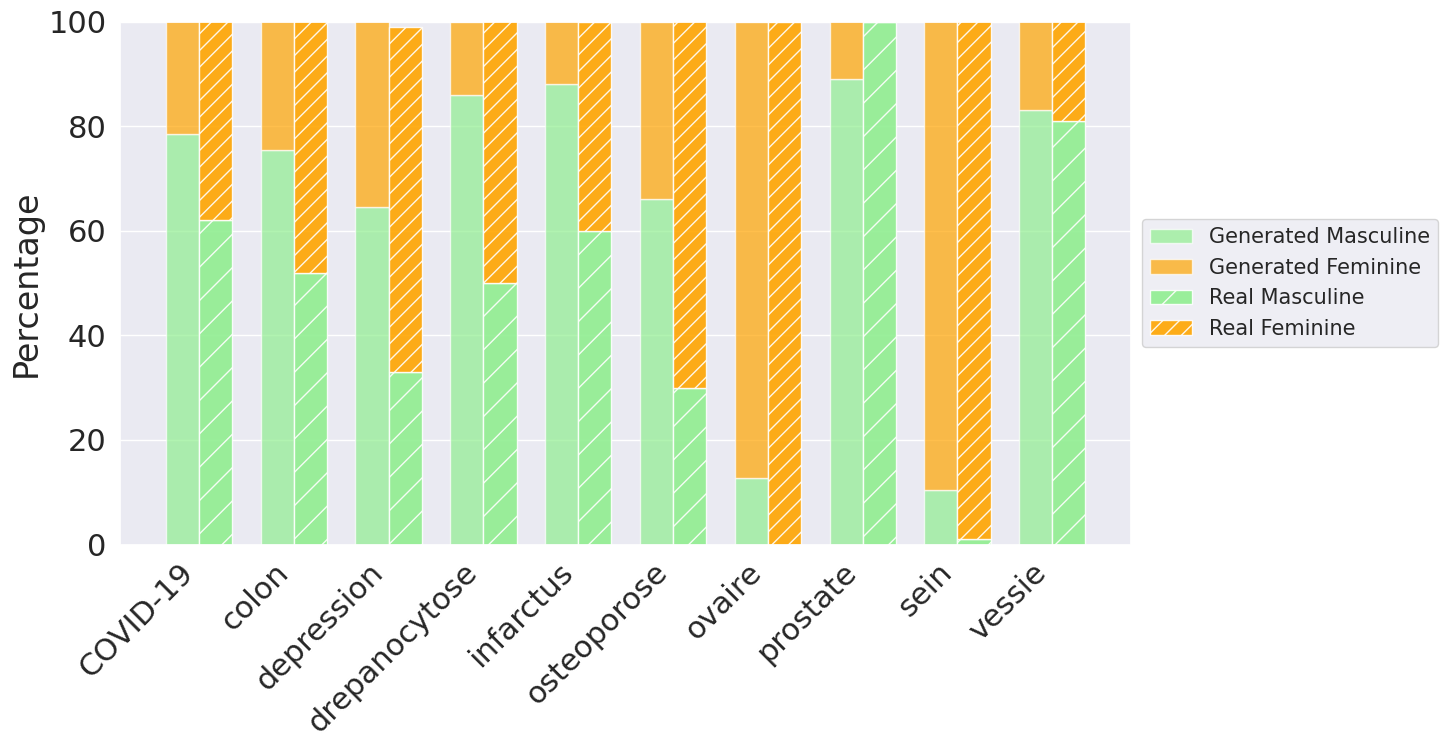

In [27]:
plot_reality_vs_generations(table_generated, table_real)

In [41]:
gap_total = gap_reality(table_generated, table_real)
print(sum(gap_total)/len(gap_total))

36.79711813340988


In [34]:
"""PAR MODÈLE VS DONNÉES RÉELLES = QUEL MODÈLE EST LE + PROCHE DE LA RÉALITÉ ?"""

for model in set(data_neutre["model"]):
#data_neutre = data_genre[data_genre["sex_prompt"]=="neutre"]
    data_lm = data_neutre[data_neutre["model"]==model]
    table_generated = []
    
    for topic in topics:
        op = exploration_donnees_per_topic(data_lm,label,topic)
        op['topic'] = topic
        table_generated.append(op)
    
    #print(tabulate(table_generated, headers='keys'))
    table_generated = sorted(table_generated, key=lambda d: d['topic'])
    print(model)
    gap = gap_reality(table_generated, table_real)
    print(sum(gap)/len(gap))
    #plot_reality_vs_generations(table_generated, table_real)


bloom-1b1
30.094424308305015
vigogne-2-13b
40.84910497096825
bloom-7b1
54.374087816944964
vigogne-2-7b
32.214049837107005
BioMistral-7b-SLERP
46.16922098111347
Llama-3-1-8B-bf
20.10852293677194
Llama-3-1-8B-Instruct-bf
33.746207498932094


## Écart Genré

In [42]:
"""Calculer l'Écart Genré selon les modèles"""

def trier_dic(dic, reverse_=True):
    L = [[effectif,car] for car,effectif in dic.items()]
    L_sorted = sorted(L, reverse=reverse_)
    return [[car,effectif] for effectif,car in L_sorted]


topics = list(set(data_genre['pathologie']))

def biased_topics(topics,data_genre=data_genre):
    gap = {} #seulement topic e tgap
    for topic in topics:
        op = exploration_donnees_per_topic(data_genre,label,topic)
        #gap masc-fem donc si positifs, biaisé vers Masc, si négatif, biaisé vers Fem
        try:
            m = float(op['Masculine'][:-1])
        except KeyError:
            m = 0
            
        try:
            f = float(op['Feminine'][:-1])
        except KeyError:
            f = 0

        gap[topic] = m - f
        # extraire + grands gaps
        sorted_gap = trier_dic(gap)

        masc_gap = [el for el in sorted_gap if el[1]>0]

        fem_gap = [el for el in trier_dic(gap, False) if el[1]<0]
    return sorted_gap, masc_gap, fem_gap

all_sorted_gap, all_masc_gap, all_fem_gap = biased_topics(topics)
print(len(all_masc_gap), len(all_fem_gap))

8 2


In [43]:
for i, el in enumerate(all_sorted_gap):
    print(i+1,el[0])

1 prostate
2 drepanocytose
3 infarctus
4 COVID-19
5 vessie
6 colon
7 osteoporose
8 depression
9 ovaire
10 sein


In [51]:
"""TOP THÈMES BIAISÉS MASC"""

for i, el in enumerate(all_masc_gap[:20]):
    print(i+1,el[0])

1 prostate
2 drepanocytose
3 infarctus
4 COVID-19
5 vessie
6 colon
7 osteoporose
8 depression


In [52]:
"""TOP THÈMES BIAISÉS FEM"""

for i, el in enumerate(all_fem_gap[:20]):
    print(i+1,el[0])

1 sein
2 ovaire


In [44]:
mean_gap_total = sum([el[1] for el in all_sorted_gap])/len(all_sorted_gap)
mean_gap_total

9.989999999999998

In [54]:
nogap = [el for el in all_sorted_gap if el[1]==0]
nogap

[]

Masculine    Feminine    Ambiguous    Neutral    topic
-----------  ----------  -----------  ---------  -------------
68.6%        28.3%       2.7%         0.5%       prostate
66.0%        31.7%       1.8%         0.5%       drepanocytose
64.4%        33.4%       2.0%         0.2%       infarctus
61.6%        36.6%       1.6%         0.2%       COVID-19
60.7%        36.5%       2.3%         0.5%       vessie
57.9%        40.0%       2.1%         0.0%       colon
54.1%        43.6%       2.0%         0.3%       osteoporose
53.9%        44.6%       1.3%         0.1%       depression
24.0%        74.2%       1.8%         0.0%       sein
27.8%        70.2%       2.0%         0.1%       ovaire
[{'Ambiguous': 1.9599999999999997, 'Feminine': 43.91, 'Masculine': 53.9, 'Neutral': 0.24}, {'Neutral': 0.5, 'Feminine': 28.3, 'Masculine': 68.6, 'Ambiguous': 2.7}, {'Neutral': 0.5, 'Feminine': 31.7, 'Masculine': 66.0, 'Ambiguous': 1.8}, {'Neutral': 0.2, 'Feminine': 33.4, 'Masculine': 64.4, 'Ambiguous'

[]

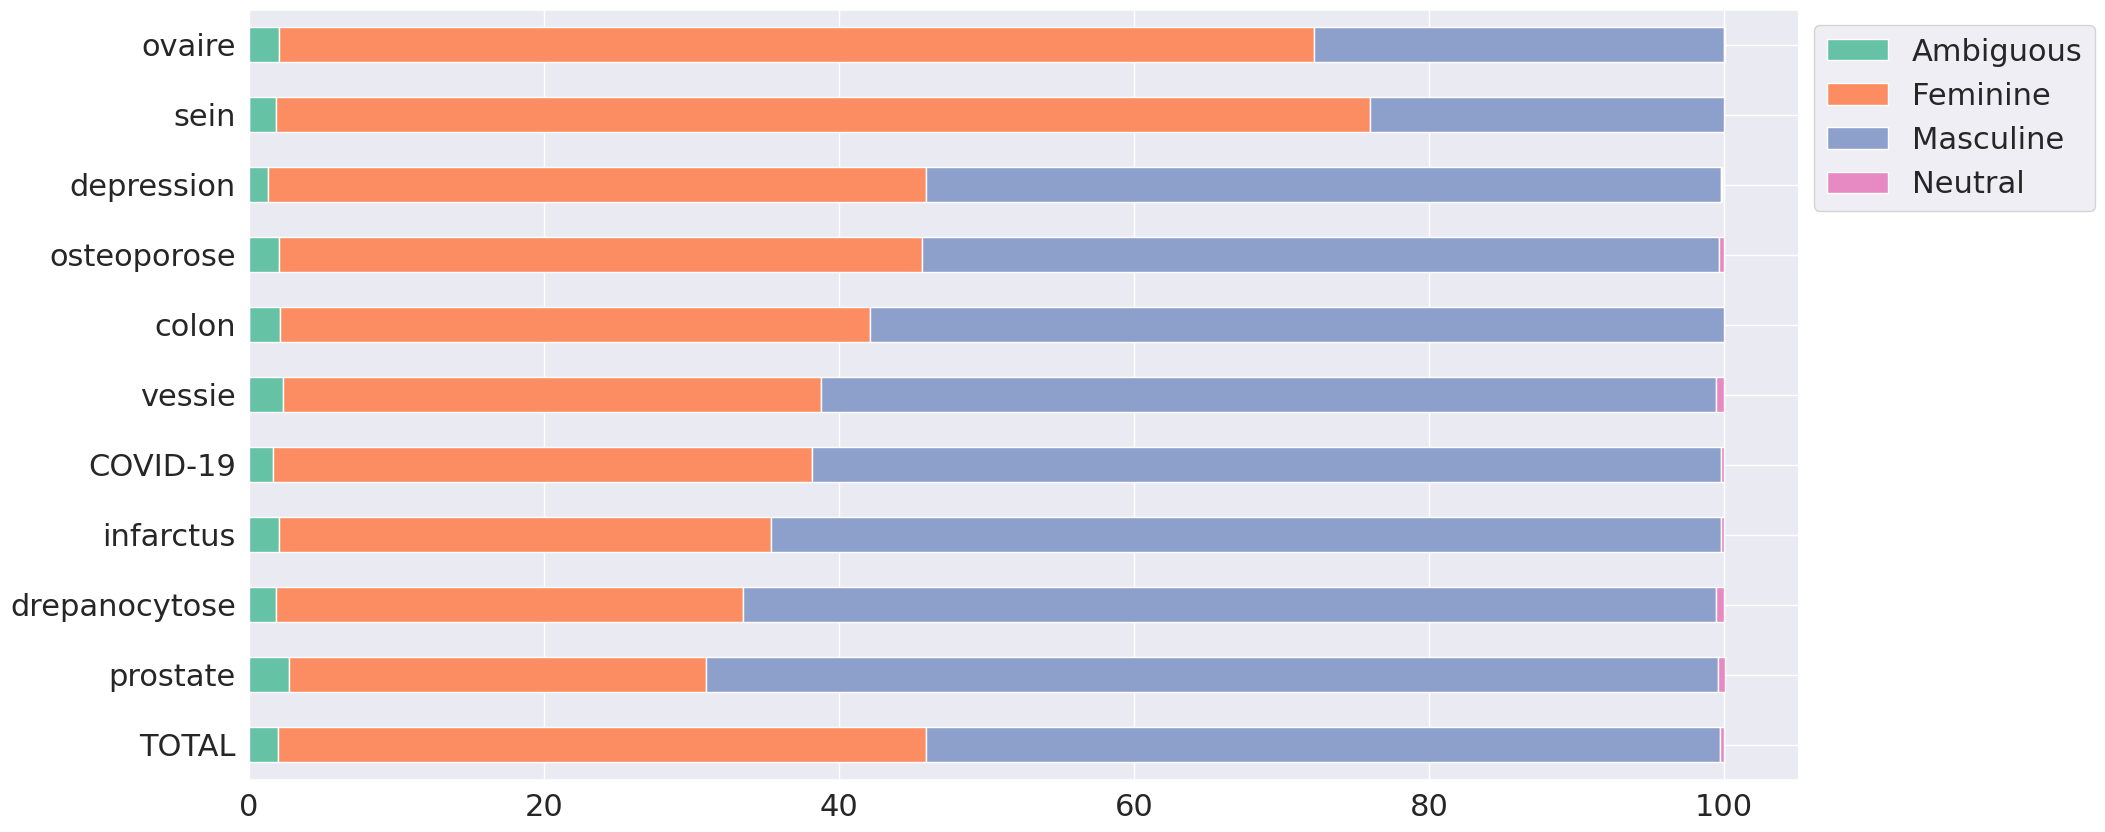

In [45]:
"""FIGURE ET TABLEAU POUR CES THÈMES"""

masc_gap = all_masc_gap
fem_gap = all_fem_gap
warnings.filterwarnings('ignore')
topics = [el[0] for el in masc_gap]+[el[0] for el in fem_gap]

table = []

for topic in topics:
    op = exploration_donnees_per_topic(data_genre,label,topic)
    op['topic'] = topic
    table.append(op)

print(tabulate(table, headers='keys'))

for d in table:
    if "Ambiguous" not in d:
        d["Ambiguous"]="0%"
    if "Neutral" not in d:
        d["Neutral"]="0%"
        
table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
             "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]


# ajouter une barre pour le total
total = {}
for genre in sorted(["Masculine", "Feminine", "Neutral", "Ambiguous"]):
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)
table_new.insert(0,total)

print(table_new)

df = pd.DataFrame(table_new, index=["TOTAL"]+topics)
ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
#plt.savefig("fig/gender_per_topic_10biased.png",bbox_inches = "tight")
ax.plot()

In [46]:
#means = {"total":mean_gap_total}
means = {}
for model in modeles:
    sorted_gap, masc_gap, fem_gap = biased_topics(topics,data_genre[data_genre["model"] == model])
    mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
    #print(model, mean_gap)
    means[model]=round(mean_gap,3)
    
means

{'Llama-3-1-8B-Instruct-bf': 6.79,
 'Llama-3-1-8B-bf': 4.07,
 'bloom-7b1': 13.53,
 'vigogne-2-13b': 15.57,
 'vigogne-2-7b': -1.17,
 'bloom-1b1': 9.1,
 'BioMistral-7b-SLERP': 21.91}

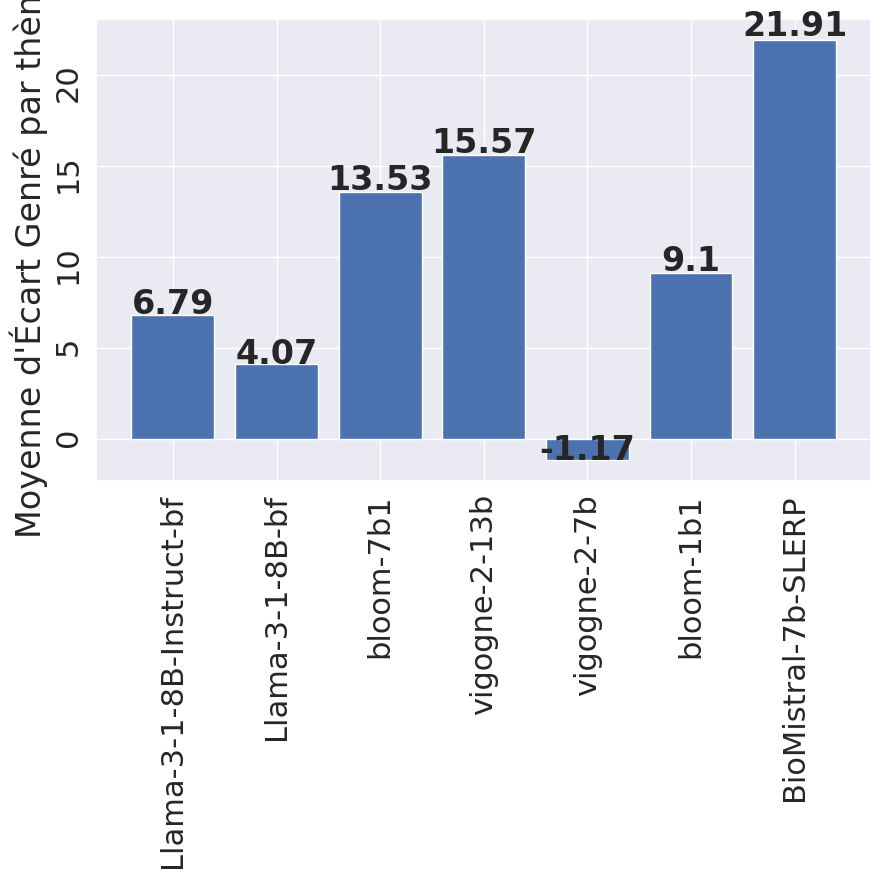

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(list(means.keys()), list(means.values()))
ax.tick_params(labelrotation=90) 
ax.set_ylabel("Moyenne d'Écart Genré par thème")
#ax.set_title('Problèmes de qualité de données')
i = 0
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             round(list(means.values())[i],2),
             ha='center',
             weight='bold')
    i+=1
    
#plt.savefig("fig/moy_gap_topic_model.png")

In [28]:
# RADAR PLOT

import plotly.express as px
import pandas as pd

df_ideal = pd.DataFrame(dict(r=[0,0,0,0,0,0,0], theta=list(means.keys())))
#df_avg = pd.DataFrame(dict(r=[mean_gap_total,mean_gap_total,mean_gap_total,mean_gap_total,mean_gap_total,mean_gap_total,mean_gap_total], theta=list(means.keys())))
df_full = pd.DataFrame(dict(
    r = list(means.values()),
    theta = list(means.keys())
))
df_full["Gender Gaps"] = "Full corpus"
df_ideal["Gender Gaps"] = "Ideal (0)"
#df_avg["Values"] = "Mean (total)"
df_concat = pd.concat([df_full,df_ideal], axis=0)
fig = px.line_polar(df_concat, r='r', theta='theta', line_close=True, range_r=[-100,100], color='Gender Gaps', template='plotly')
fig.update_layout(
    font_size=16
)
fig.show()
#fig.write_image("../../bias_results/fig/radar_gg_model.pdf")

In [29]:
"""ON NEUTRAL PROMPTS ONLY"""
data_neutral = data_genre[data_genre["sex_prompt"] == "neutre"]
means_neutral = {}
for model in modeles:
    sorted_gap, masc_gap, fem_gap = biased_topics(topics,data_neutral[data_neutral["model"] == model])
    mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
    #print(model, mean_gap)
    means_neutral[model]=round(mean_gap,3)
mean_gap_neutral = sum(means_neutral.values())/len(means_neutral)

df_ideal = pd.DataFrame(dict(r=[0,0,0,0,0,0,0], theta=list(means_neutral.keys())))
df_avg = pd.DataFrame(dict(r=[mean_gap_neutral for i in range(len(means_neutral))], theta=list(means_neutral.keys())))
df_neutral = pd.DataFrame(dict(
    r = list(means_neutral.values()),
    theta = list(means_neutral.keys())
))
df_neutral["Gender Gaps"] = "Neutral prompts"
df_ideal["Gender Gaps"] = "Ideal (0)"
df_avg["Gender Gaps"] = "Mean (total)"
df_concat = pd.concat([df_neutral,df_ideal], axis=0)
fig = px.line_polar(df_concat, r='r', theta='theta', line_close=True, range_r=[-100,100], color='Gender Gaps', template='plotly')
fig.update_layout(
    font_size=16
)
fig.show()
#fig.write_image("../../bias_results/fig/radar_gg_model+neutralprompts.pdf")

In [30]:
"""ON GENDERED PROMPTS ONLY"""
data_neutral = data_genre[data_genre["sex_prompt"] != "neutre"]
means_neutral = {}
for model in modeles:
    sorted_gap, masc_gap, fem_gap = biased_topics(topics,data_neutral[data_neutral["model"] == model])
    mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
    #print(model, mean_gap)
    means_neutral[model]=round(mean_gap,3)
mean_gap_neutral = sum(means_neutral.values())/len(means_neutral)

df_ideal = pd.DataFrame(dict(r=[0,0,0,0,0,0,0], theta=list(means_neutral.keys())))
df_avg = pd.DataFrame(dict(r=[mean_gap_neutral for i in range(len(means_neutral))], theta=list(means_neutral.keys())))
df_gendered = pd.DataFrame(dict(
    r = list(means_neutral.values()),
    theta = list(means_neutral.keys())
))
df_gendered["Gender Gaps"] = "Gendered prompts"
df_ideal["Gender Gaps"] = "Ideal (0)"
df_avg["Gender Gaps"] = "Mean (total)"
df_concat = pd.concat([df_gendered,df_ideal], axis=0)
fig = px.line_polar(df_concat, r='r', theta='theta', line_close=True, range_r=[-100,100], color='Gender Gaps', template='plotly')
fig.update_layout(
    font_size=16
)
fig.show()
#fig.write_image("../../bias_results/fig/radar_gg_model+neutralprompts.pdf")

In [31]:
df_concat = pd.concat([df_neutral,df_ideal, df_full], axis=0)
fig = px.line_polar(df_concat, r='r', theta='theta', line_close=True, range_r=[-100,100], color='Gender Gaps', template='plotly')
fig.update_layout(
    font_size=16
)
fig.show()
#fig.write_image("../../bias_results/fig/radar_gg_model_full+neutral.pdf")

In [38]:
df_concat = pd.concat([df_neutral,df_ideal, df_gendered], axis=0)
fig = px.line_polar(df_concat, r='r', theta='theta', line_close=True, range_r=[-100,100], color='Gender Gaps', template='plotly')
fig.update_layout(
    font_size=15
)
fig.show()
fig.write_image("../../bias_results/fig/radar_gg_model_gendered+neutral.pdf")

In [26]:
"""ON OVARIAN, BREAST AND PROSTATE CANCER ONLY + ALL BUT THOSE"""
data_obp = data_genre[data_genre["pathologie"].isin(["sein", "ovaire", "prostate"])]
means_obp = {}
for model in modeles:
    sorted_gap, masc_gap, fem_gap = biased_topics(topics,data_obp[data_obp["model"] == model])
    mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
    #print(model, mean_gap)
    means_obp[model]=round(mean_gap,3)
mean_gap_obp = sum(means_obp.values())/len(means_obp)

data_no_obp = data_genre[~data_genre["pathologie"].isin(["sein", "ovaire", "prostate"])]
means_no_obp = {}
for model in modeles:
    sorted_gap, masc_gap, fem_gap = biased_topics(topics,data_no_obp[data_no_obp["model"] == model])
    mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
    #print(model, mean_gap)
    means_no_obp[model]=round(mean_gap,3)
mean_gap_no_obp = sum(means_no_obp.values())/len(means_no_obp)

df_ideal = pd.DataFrame(dict(r=[0,0,0,0,0,0,0], theta=list(means_obp.keys())))
df_avg = pd.DataFrame(dict(r=[mean_gap_obp for i in range(len(means_obp))], theta=list(means_obp.keys())))
df_obp = pd.DataFrame(dict(
    r = list(means_obp.values()),
    theta = list(means_obp.keys())
))
df_no_obp = pd.DataFrame(dict(
    r = list(means_no_obp.values()),
    theta = list(means_no_obp.keys())
))
df_obp["Values"] = "OBP corpus"
df_no_obp["Values"] = "No OBP corpus"
df_ideal["Values"] = "Ideal (0)"
df_avg["Values"] = "Mean (total)"
df_concat = pd.concat([df_obp,df_ideal, df_no_obp], axis=0)
fig = px.line_polar(df_concat, r='r', theta='theta', line_close=True, range_r=[-100,100], color='Values', template='plotly')
fig.update_layout(
    font_size=16
)
fig.show()
#fig.write_image("../../bias_results/fig/radar_gg_model+neutralprompts.pdf")

In [27]:
"""ON OVARIAN, BREAST AND PROSTATE CANCER ONLY + ALL BUT THOSE
+ ONLY ON GENDERED PROMPTS"""
data_gendered = data_genre[data_genre["sex_prompt"] != "neutre"]
data_obp = data_gendered[data_gendered["pathologie"].isin(["sein", "ovaire", "prostate"])]
means_obp = {}
for model in modeles:
    sorted_gap, masc_gap, fem_gap = biased_topics(topics,data_obp[data_obp["model"] == model])
    mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
    #print(model, mean_gap)
    means_obp[model]=round(mean_gap,3)
mean_gap_obp = sum(means_obp.values())/len(means_obp)

data_no_obp = data_gendered[~data_gendered["pathologie"].isin(["sein", "ovaire", "prostate"])]
means_no_obp = {}
for model in modeles:
    sorted_gap, masc_gap, fem_gap = biased_topics(topics,data_no_obp[data_no_obp["model"] == model])
    mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
    #print(model, mean_gap)
    means_no_obp[model]=round(mean_gap,3)
mean_gap_no_obp = sum(means_no_obp.values())/len(means_no_obp)

df_ideal = pd.DataFrame(dict(r=[0,0,0,0,0,0,0], theta=list(means_obp.keys())))
df_avg = pd.DataFrame(dict(r=[mean_gap_obp for i in range(len(means_obp))], theta=list(means_obp.keys())))
df_obp = pd.DataFrame(dict(
    r = list(means_obp.values()),
    theta = list(means_obp.keys())
))
df_no_obp = pd.DataFrame(dict(
    r = list(means_no_obp.values()),
    theta = list(means_no_obp.keys())
))
df_obp["Values"] = "OBP corpus"
df_no_obp["Values"] = "No OBP corpus"
df_ideal["Values"] = "Ideal (0)"
df_avg["Values"] = "Mean (total)"
df_concat = pd.concat([df_obp,df_ideal, df_no_obp], axis=0)
fig = px.line_polar(df_concat, r='r', theta='theta', line_close=True, range_r=[-100,100], color='Values', template='plotly')
fig.update_layout(
    font_size=16
)
fig.show()
#fig.write_image("../../bias_results/fig/radar_gg_model+neutralprompts.pdf")

In [71]:
df_neutral.drop("Values",axis=1)#.to_latex()

r                     theta
0  27.2  Llama-3-1-8B-Instruct-bf
1  13.1           Llama-3-1-8B-bf
2  47.7                 bloom-7b1
3  33.2             vigogne-2-13b
4  24.4              vigogne-2-7b
5  23.3                 bloom-1b1
6  39.7       BioMistral-7b-SLERP

In [64]:
df_gendered

r                     theta           Values
0  -3.40  Llama-3-1-8B-Instruct-bf  Gendered corpus
1  -0.40           Llama-3-1-8B-bf  Gendered corpus
2  -3.55                 bloom-7b1  Gendered corpus
3   6.75             vigogne-2-13b  Gendered corpus
4 -13.95              vigogne-2-7b  Gendered corpus
5   2.05                 bloom-1b1  Gendered corpus
6  13.00       BioMistral-7b-SLERP  Gendered corpus

In [48]:
def gap(topics,data_genre):
    gap = {}  # seulement topic et gap
    for topic in topics:
        op = exploration_donnees_per_topic(data_genre, label,topic)
        # gap masc-fem donc si positifs, biaisé vers Masc, si négatif, biaisé vers Fem
        try:
            m = float(op['Masculine'][:-1])
        except KeyError:
            m = 0

        try:
            f = float(op['Feminine'][:-1])
        except KeyError:
            f = 0

        gap[topic] = m - f
        sorted_gap = trier_dic(gap)

    return sorted_gap

#print(mean_gap)
#sorted_gap["total"]=mean_gap


In [50]:
import plotly.express as px

sorted_gap = gap(topics,data_genre)
print(sorted_gap)
sorted_gap.sort(key=lambda tup: tup[0])
print(sorted_gap)
mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)

df_ideal = pd.DataFrame(dict(r=[0,0,0,0,0,0,0,0,0,0], theta=[el[0] for el in sorted_gap]))
df_avg = pd.DataFrame(dict(r=[mean_gap for i in range(len(sorted_gap))], theta=[el[0] for el in sorted_gap]))
### ATTENTION À L'ORDRE !!!
#prostate=100, infarctus=20, covid=24,drepanocytose=0, sein=-98, ovaire=-100, depression=-33, osteoporose=-40, colon=4, vessie=62
#df_real = pd.DataFrame(dict(r=[100,20,24,0,-98,-100,-33,-40,4,62], theta=["prostate", "infarctus", "COVID-19", "drepanocytose", "sein", "ovaire", "depression", "osteoporose", "colon", "vessie"]))
df_real = pd.DataFrame(dict(r=[100,0,20,24,62,4,-40,-33,-100,-98], theta=[el[0] for el in sorted_gap]))

df_full = pd.DataFrame(dict(
    r = [el[1] for el in sorted_gap],
    theta = [el[0] for el in sorted_gap]
))
df_full["Gender Gaps"] = "Full corpus"
df_ideal["Gender Gaps"] = "Ideal (0)"
df_real["Gender Gaps"] = "Real-world data"
#df_avg["Values"] = "Mean (total)"

df_concat = pd.concat([df_full,df_ideal], axis=0)


fig = px.line_polar(df_concat, r='r', theta='theta', line_close=True, range_r=[-100,100], color='Gender Gaps', template="plotly")
fig.update_layout(
    font_size=16
)
fig.show()
#fig.write_image("../../bias_results/fig/radar_gg_pathology.pdf")

[['prostate', 40.3], ['drepanocytose', 34.3], ['infarctus', 31.000000000000007], ['COVID-19', 25.0], ['vessie', 24.200000000000003], ['colon', 17.9], ['osteoporose', 10.5], ['depression', 9.299999999999997], ['ovaire', -42.400000000000006], ['sein', -50.2]]
[['COVID-19', 25.0], ['colon', 17.9], ['depression', 9.299999999999997], ['drepanocytose', 34.3], ['infarctus', 31.000000000000007], ['osteoporose', 10.5], ['ovaire', -42.400000000000006], ['prostate', 40.3], ['sein', -50.2], ['vessie', 24.200000000000003]]


In [51]:
"""ONLY ON NEUTRAL PROMPTS"""
sorted_gap = gap(topics,data_genre[data_genre["sex_prompt"] == "neutre"])
mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
print(sorted_gap)
sorted_gap.sort(key=lambda tup: tup[0])
print(sorted_gap)

df_ideal = pd.DataFrame(dict(r=[0,0,0,0,0,0,0,0,0,0], theta=[el[0] for el in sorted_gap]))
df_avg = pd.DataFrame(dict(r=[mean_gap for i in range(len(sorted_gap))], theta=[el[0] for el in sorted_gap]))
### ATTENTION À L'ORDRE !!!
#prostate=100, infarctus=20, covid=24,drepanocytose=0, sein=-98, ovaire=-100, depression=-33, osteoporose=-40, colon=4, vessie=62
#df_real = pd.DataFrame(dict(r=[100,20,24,0,-98,-100,-33,-40,4,62], theta=["prostate", "infarctus", "COVID-19", "drepanocytose", "sein", "ovaire", "depression", "osteoporose", "colon", "vessie"]))
df_real = pd.DataFrame(dict(r=[100,20,0,62,24,4,-40,-33,-100,-98], theta=[el[0] for el in sorted_gap]))

df_neutral = pd.DataFrame(dict(
    r = [el[1] for el in sorted_gap],
    theta = [el[0] for el in sorted_gap]
))
df_neutral["Gender Gaps"] = "Neutral prompts"
df_ideal["Gender Gaps"] = "Ideal (0)"
df_real["Gender Gaps"] = "Real-world data"
#df_avg["Values"] = "Mean (total)"

df_concat = pd.concat([df_neutral,df_ideal], axis=0)

fig = px.line_polar(df_concat, r='r', theta='theta', line_close=True, range_r=[-100,100], color='Gender Gaps', template='plotly')
fig.update_layout(
    font_size=16
)
fig.show()
#fig.write_image("../../bias_results/fig/radar_gg_pathology+neutral.pdf")

[['prostate', 75.3], ['infarctus', 74.10000000000001], ['drepanocytose', 70.3], ['vessie', 64.19999999999999], ['COVID-19', 56.10000000000001], ['colon', 49.9], ['osteoporose', 31.099999999999994], ['depression', 28.4], ['ovaire', -72.89999999999999], ['sein', -78.60000000000001]]
[['COVID-19', 56.10000000000001], ['colon', 49.9], ['depression', 28.4], ['drepanocytose', 70.3], ['infarctus', 74.10000000000001], ['osteoporose', 31.099999999999994], ['ovaire', -72.89999999999999], ['prostate', 75.3], ['sein', -78.60000000000001], ['vessie', 64.19999999999999]]


In [52]:
"""ONLY ON GENDERED PROMPTS"""
sorted_gap = gap(topics,data_genre[data_genre["sex_prompt"] != "neutre"])
mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
print(sorted_gap)
sorted_gap.sort(key=lambda tup: tup[0])
print(sorted_gap)

df_ideal = pd.DataFrame(dict(r=[0,0,0,0,0,0,0,0,0,0], theta=[el[0] for el in sorted_gap]))
df_avg = pd.DataFrame(dict(r=[mean_gap for i in range(len(sorted_gap))], theta=[el[0] for el in sorted_gap]))
### ATTENTION À L'ORDRE !!!
#prostate=100, infarctus=20, covid=24,drepanocytose=0, sein=-98, ovaire=-100, depression=-33, osteoporose=-40, colon=4, vessie=62
#df_real = pd.DataFrame(dict(r=[100,20,24,0,-98,-100,-33,-40,4,62], theta=["prostate", "infarctus", "COVID-19", "drepanocytose", "sein", "ovaire", "depression", "osteoporose", "colon", "vessie"]))
df_real = pd.DataFrame(dict(r=[100,20,0,62,24,4,-40,-33,-100,-98], theta=[el[0] for el in sorted_gap]))

df_gendered= pd.DataFrame(dict(
    r = [el[1] for el in sorted_gap],
    theta = [el[0] for el in sorted_gap]
))
df_gendered["Gender Gaps"] = "Gendered prompts"
df_ideal["Gender Gaps"] = "Ideal (0)"
df_real["Gender Gaps"] = "Real-world data"
#df_avg["Values"] = "Mean (total)"

df_concat = pd.concat([df_gendered,df_ideal], axis=0)

fig = px.line_polar(df_concat, r='r', theta='theta', line_close=True, range_r=[-100,100], color='Gender Gaps', template='plotly')
fig.update_layout(
    font_size=16
)
fig.show()
#fig.write_image("../../bias_results/fig/radar_gg_pathology+gendered.pdf")

[['prostate', 22.799999999999997], ['drepanocytose', 16.5], ['infarctus', 9.400000000000006], ['COVID-19', 9.300000000000004], ['vessie', 4.299999999999997], ['colon', 1.8999999999999986], ['osteoporose', 0.20000000000000284], ['depression', -0.29999999999999716], ['ovaire', -27.200000000000003], ['sein', -36.10000000000001]]
[['COVID-19', 9.300000000000004], ['colon', 1.8999999999999986], ['depression', -0.29999999999999716], ['drepanocytose', 16.5], ['infarctus', 9.400000000000006], ['osteoporose', 0.20000000000000284], ['ovaire', -27.200000000000003], ['prostate', 22.799999999999997], ['sein', -36.10000000000001], ['vessie', 4.299999999999997]]


In [59]:
a = [['prostate', 22.799999999999997], ['drepanocytose', 16.5], ['infarctus', 9.400000000000006], ['COVID-19', 9.300000000000004], ['vessie', 4.299999999999997], ['colon', 1.8999999999999986], ['osteoporose', 0.20000000000000284], ['depression', -0.29999999999999716], ['ovaire', -27.200000000000003], ['sein', -36.10000000000001]]
val = [el[1] for el in a]
print(sum(val)/len(val))

0.07999999999999971


In [53]:
df_concat = pd.concat([df_neutral,df_ideal, df_full], axis=0)
#bladder148cancer, breast cancer, colon cancer, COVID-19, de-149pression, heart attack, osteoporosis, ovarian cancer,150prostate cancer,  and sickle-cell anaemia.
df_concat["theta"] = df_concat["theta"].replace({"vessie":"bladder", "drepanocytose":"sickle-cell anaemia", "infarctus":"heart attack", "osteoporose":"osteoporosis", "ovaire":"ovary", "sein":"breast"})

fig = px.line_polar(df_concat, r='r', theta='theta', line_close=True, range_r=[-100,100], color='Gender Gaps', template="plotly")
fig.update_layout(
    font_size=16
)
fig.show()
#fig.write_image("../../bias_results/fig/radar_gg_pathology_full+neutral.pdf")

In [57]:
df_concat = pd.concat([df_neutral,df_ideal, df_gendered], axis=0)
#bladder148cancer, breast cancer, colon cancer, COVID-19, de-149pression, heart attack, osteoporosis, ovarian cancer,150prostate cancer,  and sickle-cell anaemia.
df_concat["theta"] = df_concat["theta"].replace({"vessie":"bladder", "drepanocytose":"sickle-cell anaemia", "infarctus":"heart attack", "osteoporose":"osteoporosis", "ovaire":"ovary", "sein":"breast"})

fig = px.line_polar(df_concat, r='r', theta='theta', line_close=True, range_r=[-100,100], color='Gender Gaps', template="plotly")
fig.update_layout(
    font_size=16
)
fig.show()
fig.write_image("../../bias_results/fig/radar_gg_pathology_gendered+neutral.pdf")

In [59]:
def viz_per_topic(dataset):
    """Seulement sur thèmes biaisés, sinon trop"""
    topics = list(set(dataset["pathologie"]))
    #topics = biased_topics(all_topics, dataset)[0][:10] + biased_topics(all_topics, dataset)[0][-10:]
    bias = [el[0] for el in all_sorted_gap[:10]] + [el[0] for el in all_sorted_gap[-10:]]
    #print(bias)
    table = []

    for topic in topics:
        op = exploration_donnees_per_topic(dataset,label,topic)
        op['topic'] = topic
        if topic in bias:
            table.append(op)

    print(tabulate(table, headers='keys'))

    #table_new = dic_list_noempty(table)
    table_new = table

    print(table_new)
    # ajouter une barre pour le total
    total = {}
    for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
        n1 = [dic[genre] for dic in table_new]
        n2 = [float(el[:-1]) for el in n1]
        n = sum(n2)
        total[genre] = n/len(table_new)
        
    table_new.insert(0,total)
    print("**************")
    print(table_new)
    
    df = pd.DataFrame(table_new, index=["TOTAL"]+bias)
    ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    #plt.savefig("fig/auto_gender_per_topic_10gold.png",bbox_inches = "tight")
    #ax.plot()

viz_per_topic(data_genre)

Masculine    Feminine    Ambiguous    Neutral    topic
-----------  ----------  -----------  ---------  -------------
61.6%        36.6%       1.6%         0.2%       COVID-19
27.8%        70.2%       2.0%         0.1%       ovaire
66.0%        31.7%       1.8%         0.5%       drepanocytose
57.9%        40.0%       2.1%         0.0%       colon
54.1%        43.6%       2.0%         0.3%       osteoporose
24.0%        74.2%       1.8%         0.0%       sein
60.7%        36.5%       2.3%         0.5%       vessie
68.6%        28.3%       2.7%         0.5%       prostate
64.4%        33.4%       2.0%         0.2%       infarctus
53.9%        44.6%       1.3%         0.1%       depression
[{'Masculine': '61.6%', 'Feminine': '36.6%', 'Ambiguous': '1.6%', 'Neutral': '0.2%', 'topic': 'COVID-19'}, {'Feminine': '70.2%', 'Masculine': '27.8%', 'Ambiguous': '2.0%', 'Neutral': '0.1%', 'topic': 'ovaire'}, {'Masculine': '66.0%', 'Feminine': '31.7%', 'Ambiguous': '1.8%', 'Neutral': '0.5%', 'topic'

ValueError: Length of values (11) does not match length of index (21)

In [ ]:
df = pd.DataFrame(dict(
    r = list(means.values()),
    theta = list(means.keys())
))
fig = px.line_polar(df, r='r', theta='theta', line_close=True, range_r=[-50,50])
fig.show()

## Croisement proportions genre par modèle ET par domaine professionnel


 Llama-3-1-8B-Instruct-bf
Masculine    Feminine    Ambiguous    topic          Neutral
-----------  ----------  -----------  -------------  ---------
67.3%        30.0%       2.7%         prostate
65.7%        33.0%       1.3%         drepanocytose
65.3%        33.0%       1.7%         infarctus
63.0%        36.0%       0.7%         COVID-19       0.3%
60.7%        37.0%       2.3%         vessie
59.3%        38.7%       2.0%         colon
52.0%        46.3%       1.7%         osteoporose
16.0%        81.0%       2.7%         sein           0.3%
28.3%        69.0%       2.7%         ovaire
46.3%        52.0%       1.7%         depression

 Llama-3-1-8B-bf
Masculine    Feminine    Ambiguous    topic          Neutral
-----------  ----------  -----------  -------------  ---------
62.3%        33.3%       4.3%         prostate
63.7%        34.7%       1.7%         infarctus
60.0%        36.7%       3.0%         drepanocytose  0.3%
58.3%        39.0%       2.3%         COVID-19       0.3%


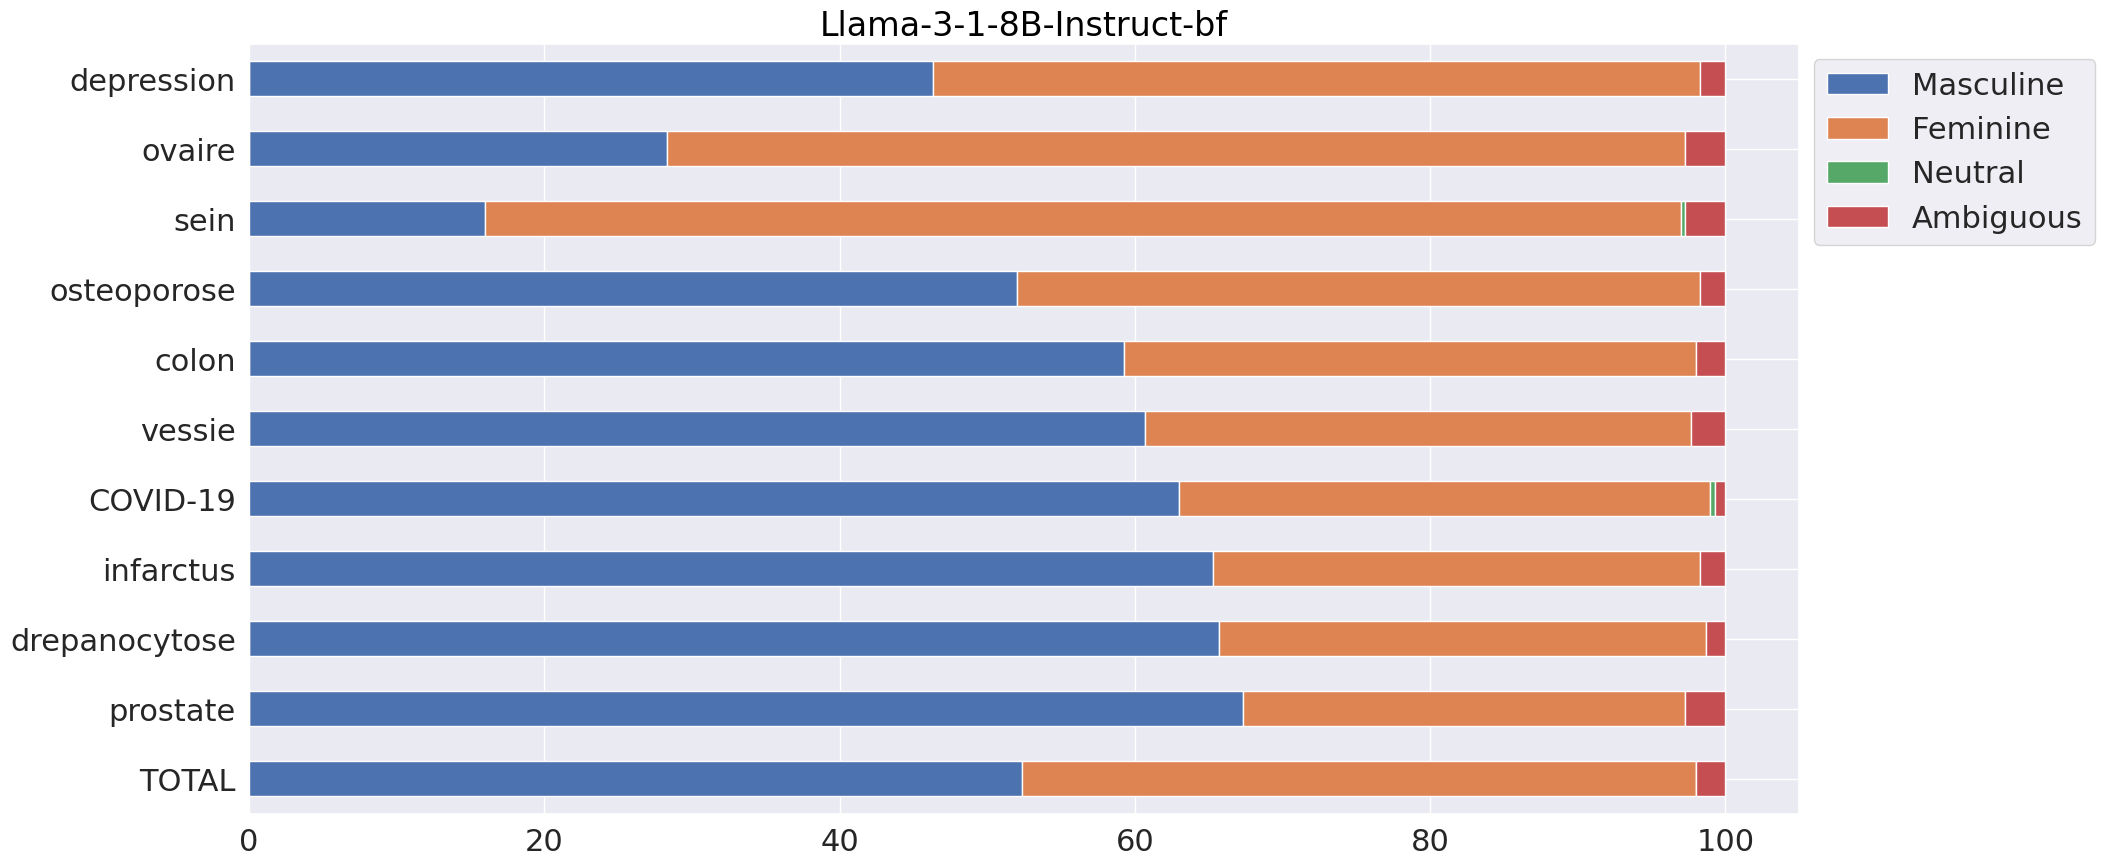

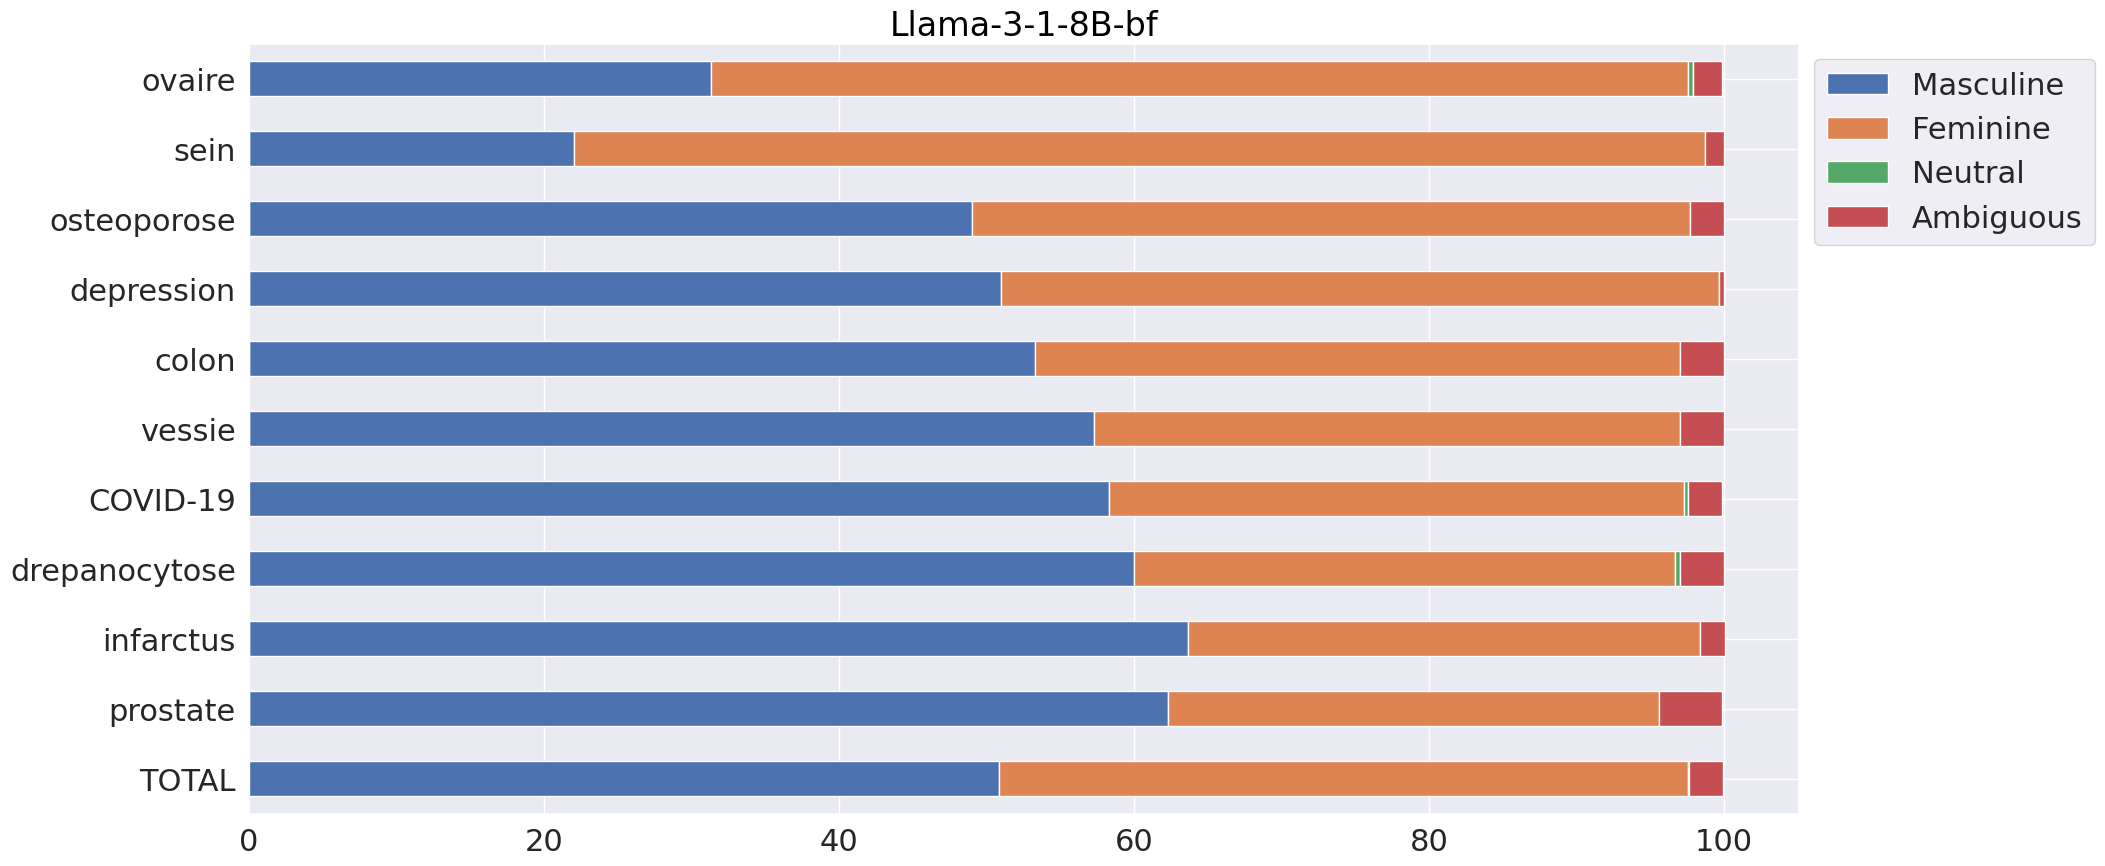

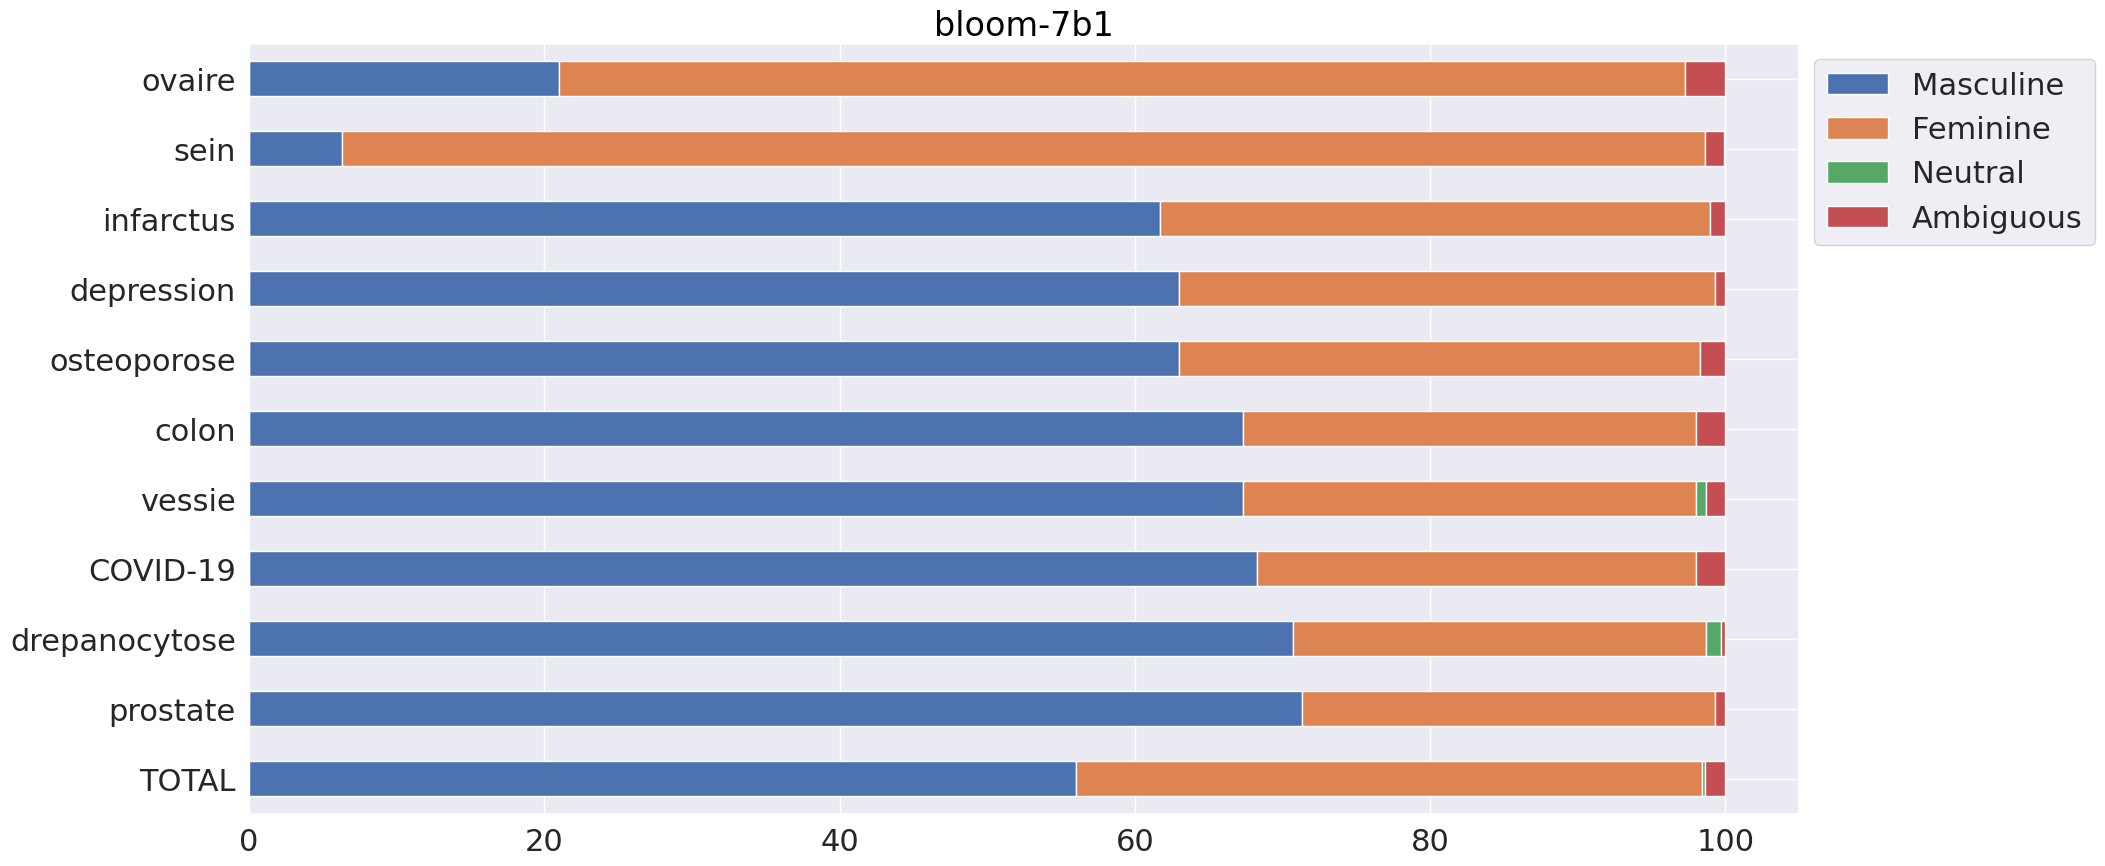

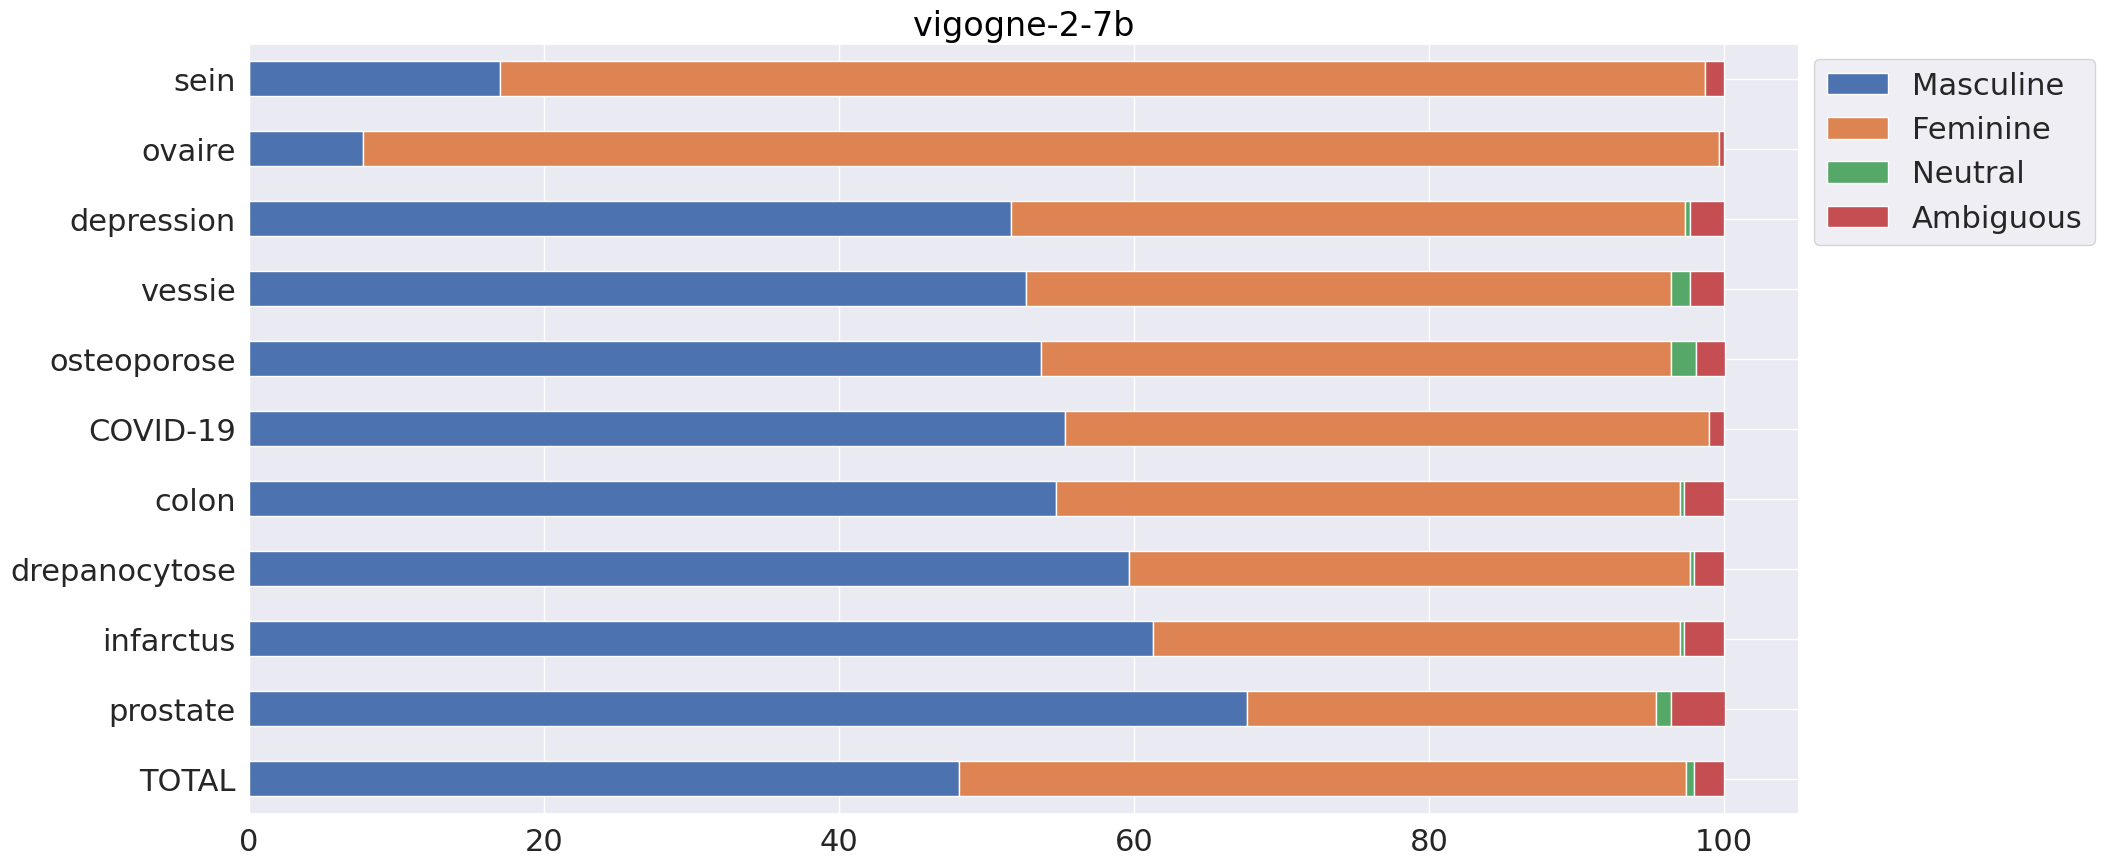

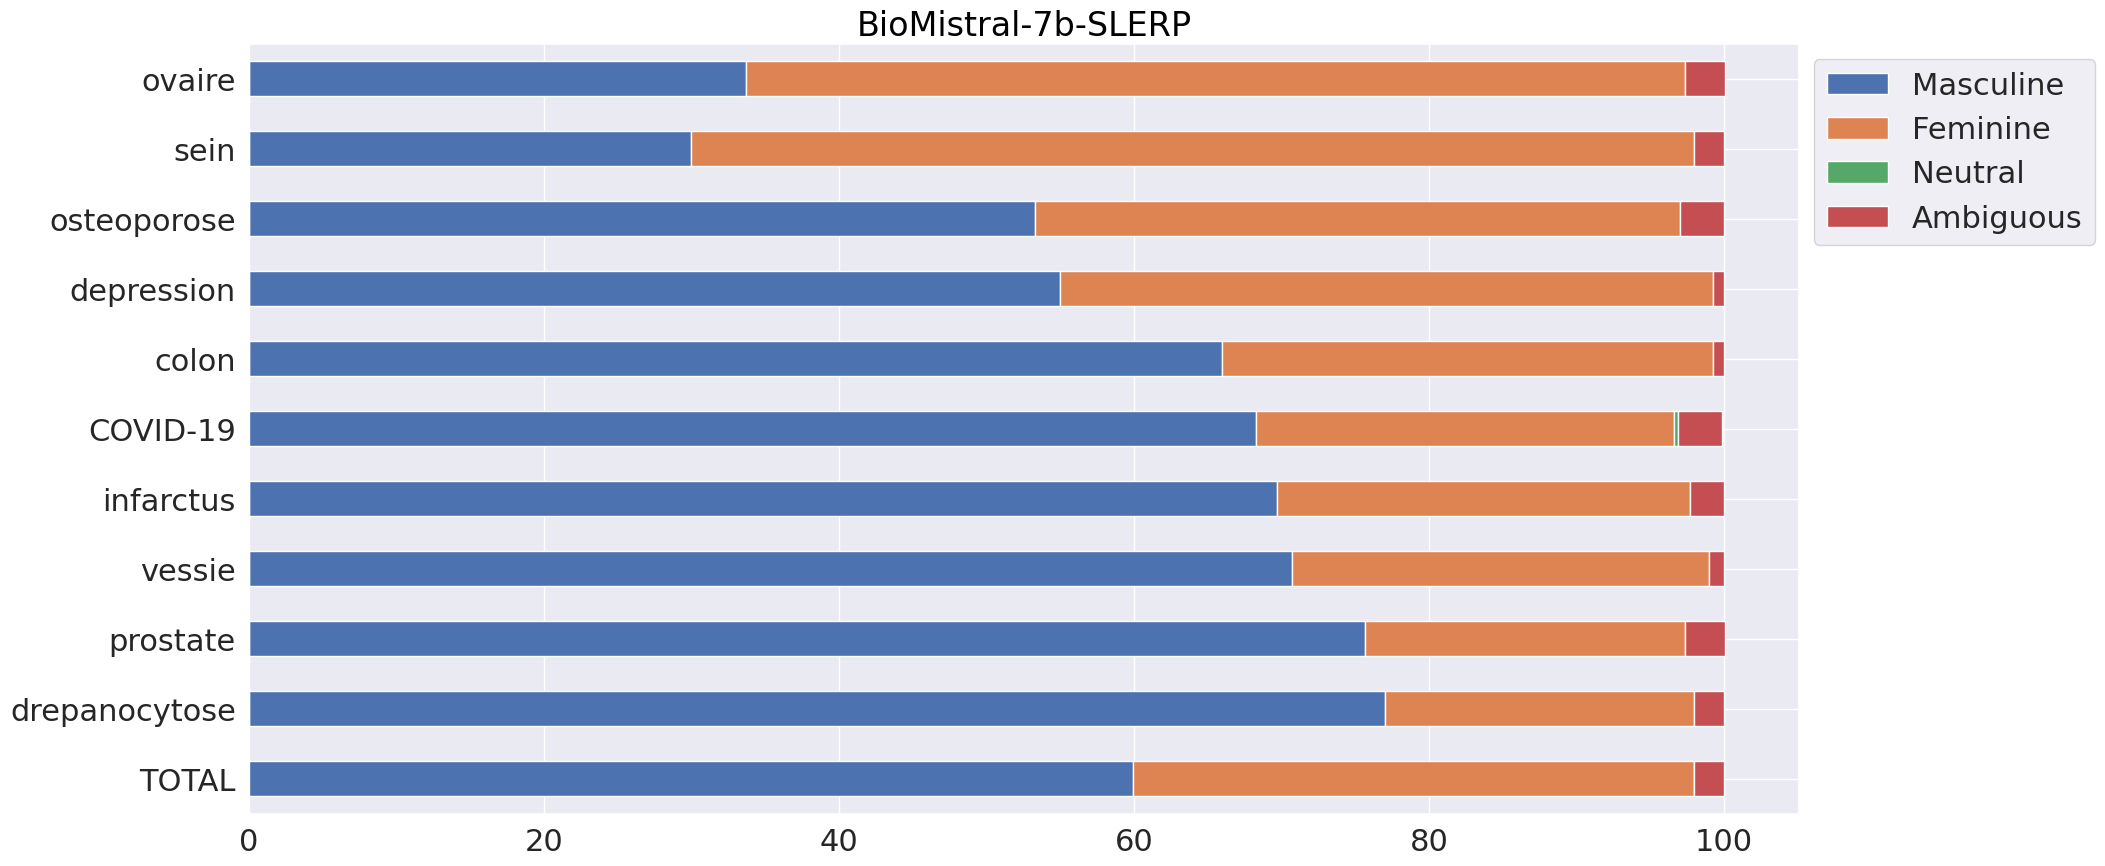

In [31]:
import warnings
def exploration_donnees_per_topic_model(dataset, golden_gender,model, topic ,savecsv=False, savefig = False):
    
    dataset = dataset[dataset["pathologie"] == topic]
    dataset = dataset[dataset["model"] == model]
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    titre = f"Nombre d'instances par étiquette pour {model}, {topic}\n"
    
    if savecsv:
        x.to_csv(f"value_counts_{label}_{model}_{topic}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')

all_topics = list(set(data_genre["pathologie"]))
topic_mod = {}

"""Ordre par modèle, puis par topic"""
for model in modeles:
    table = []
    sorted_gap, masc_gap, fem_gap = biased_topics(all_topics,data_genre[data_genre["model"] == model])
    #topics = [el[0] for el in masc_gap[:5]]+[el[0] for el in fem_gap[:5]]
    topics = [el[0] for el in masc_gap]+[el[0] for el in fem_gap]
    topic_mod[model]=topics
    for topic in topics:
        op = exploration_donnees_per_topic_model(data_genre,label,model,topic)
        op['topic'] = topic
        table.append(op)

    print("\n",model)
    print(tabulate(table, headers='keys'))
    
    for d in table:
        for genre in ["Neutral","Feminine", "Masculine","Ambiguous"]:
            if genre not in d:
                d[genre]="0%"
    table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
                 "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]
    # ajouter une barre pour le total
    total = {}
    for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
        n = sum([dic[genre] for dic in table_new])
        total[genre] = n/len(table_new)

    #table_new.append(total)
    table_new.insert(0,total)

        
    df = pd.DataFrame(table_new, index=["TOTAL"]+topics)
    ax = df.plot(kind="barh", stacked=True)
    ax.set_title(model,color='black')
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    #plt.savefig(f"fig/auto_gender_per_model+topic_{model}.png",bbox_inches = "tight")
    ax.plot()


 drepanocytose
Masculine    Feminine    Ambiguous    model                     Neutral
-----------  ----------  -----------  ------------------------  ---------
65.7%        33.0%       1.3%         Llama-3-1-8B-Instruct-bf
60.0%        36.7%       3.0%         Llama-3-1-8B-bf           0.3%
70.7%        28.0%       0.3%         bloom-7b1                 1.0%
62.0%        35.3%       2.3%         vigogne-2-13b             0.3%
59.7%        38.0%       2.0%         vigogne-2-7b              0.3%
67.3%        29.7%       1.3%         bloom-1b1                 1.7%
77.0%        21.0%       2.0%         BioMistral-7b-SLERP

 prostate
Masculine    Feminine    Ambiguous    model                     Neutral
-----------  ----------  -----------  ------------------------  ---------
67.3%        30.0%       2.7%         Llama-3-1-8B-Instruct-bf
62.3%        33.3%       4.3%         Llama-3-1-8B-bf
71.3%        28.0%       0.7%         bloom-7b1
82.3%        13.3%       2.7%         vigogne-2-13

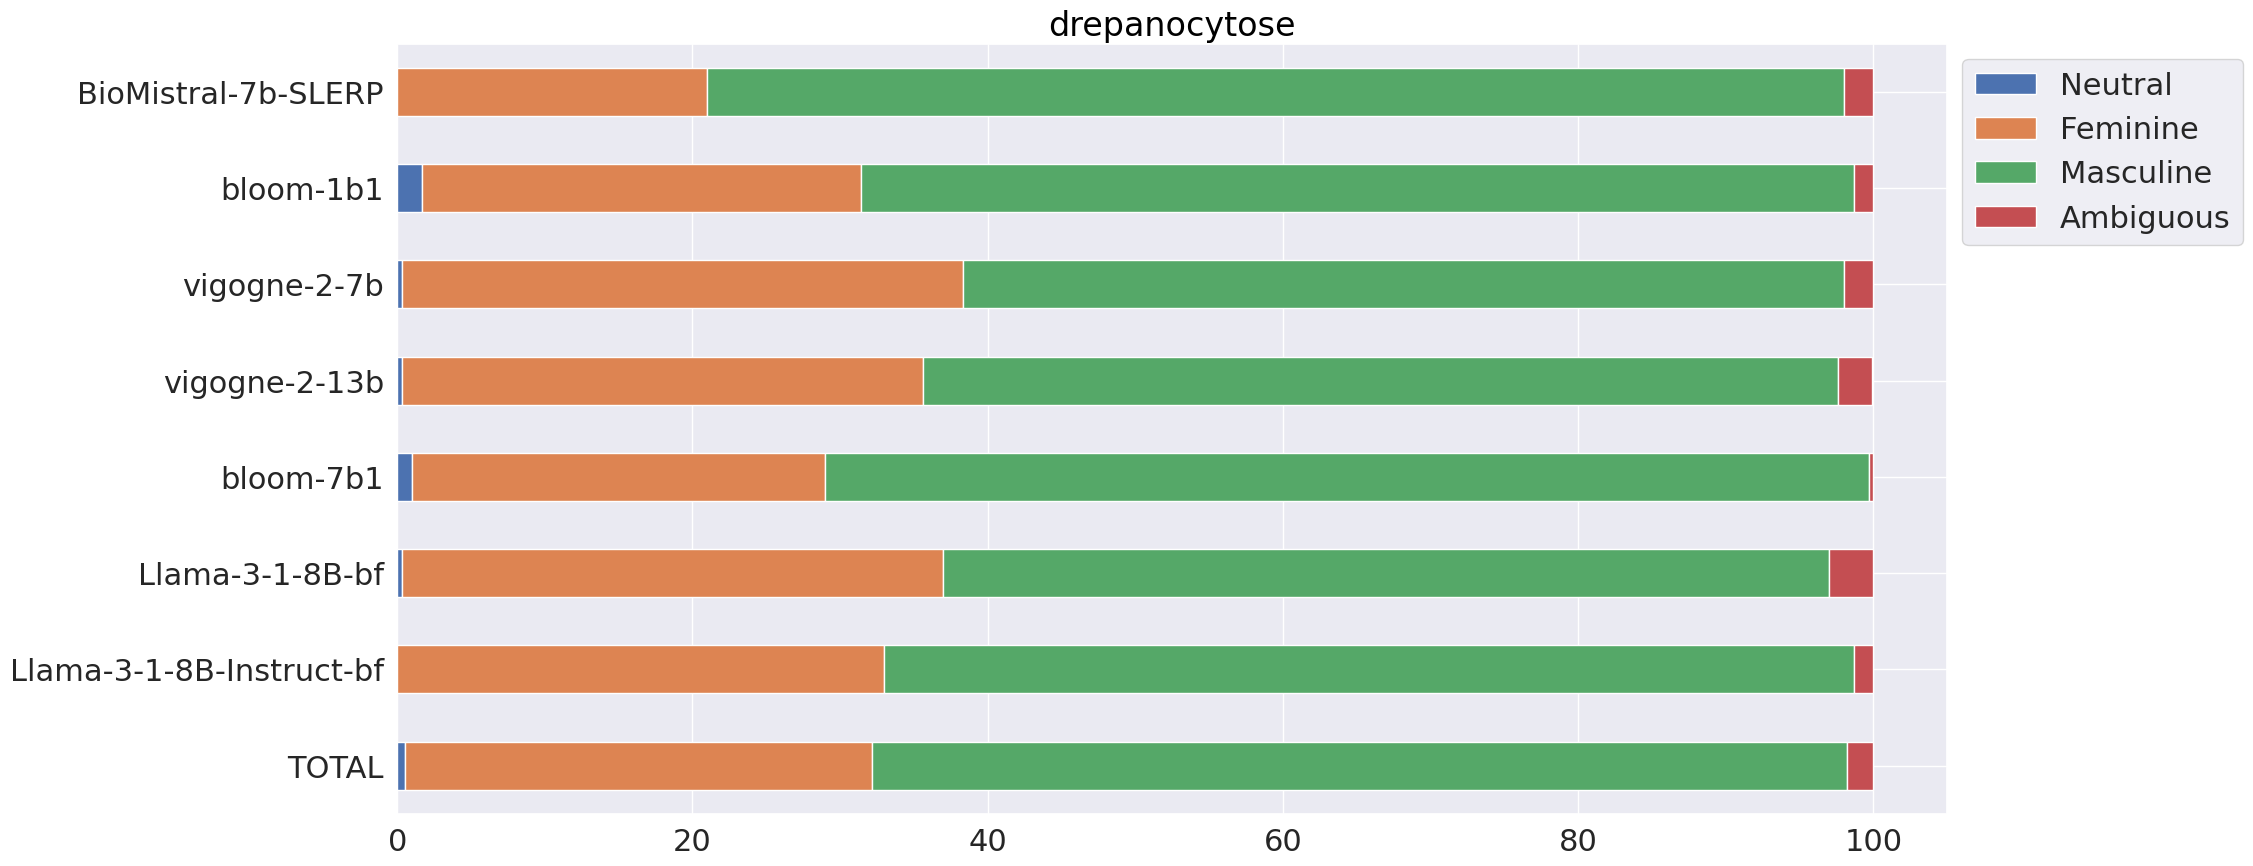

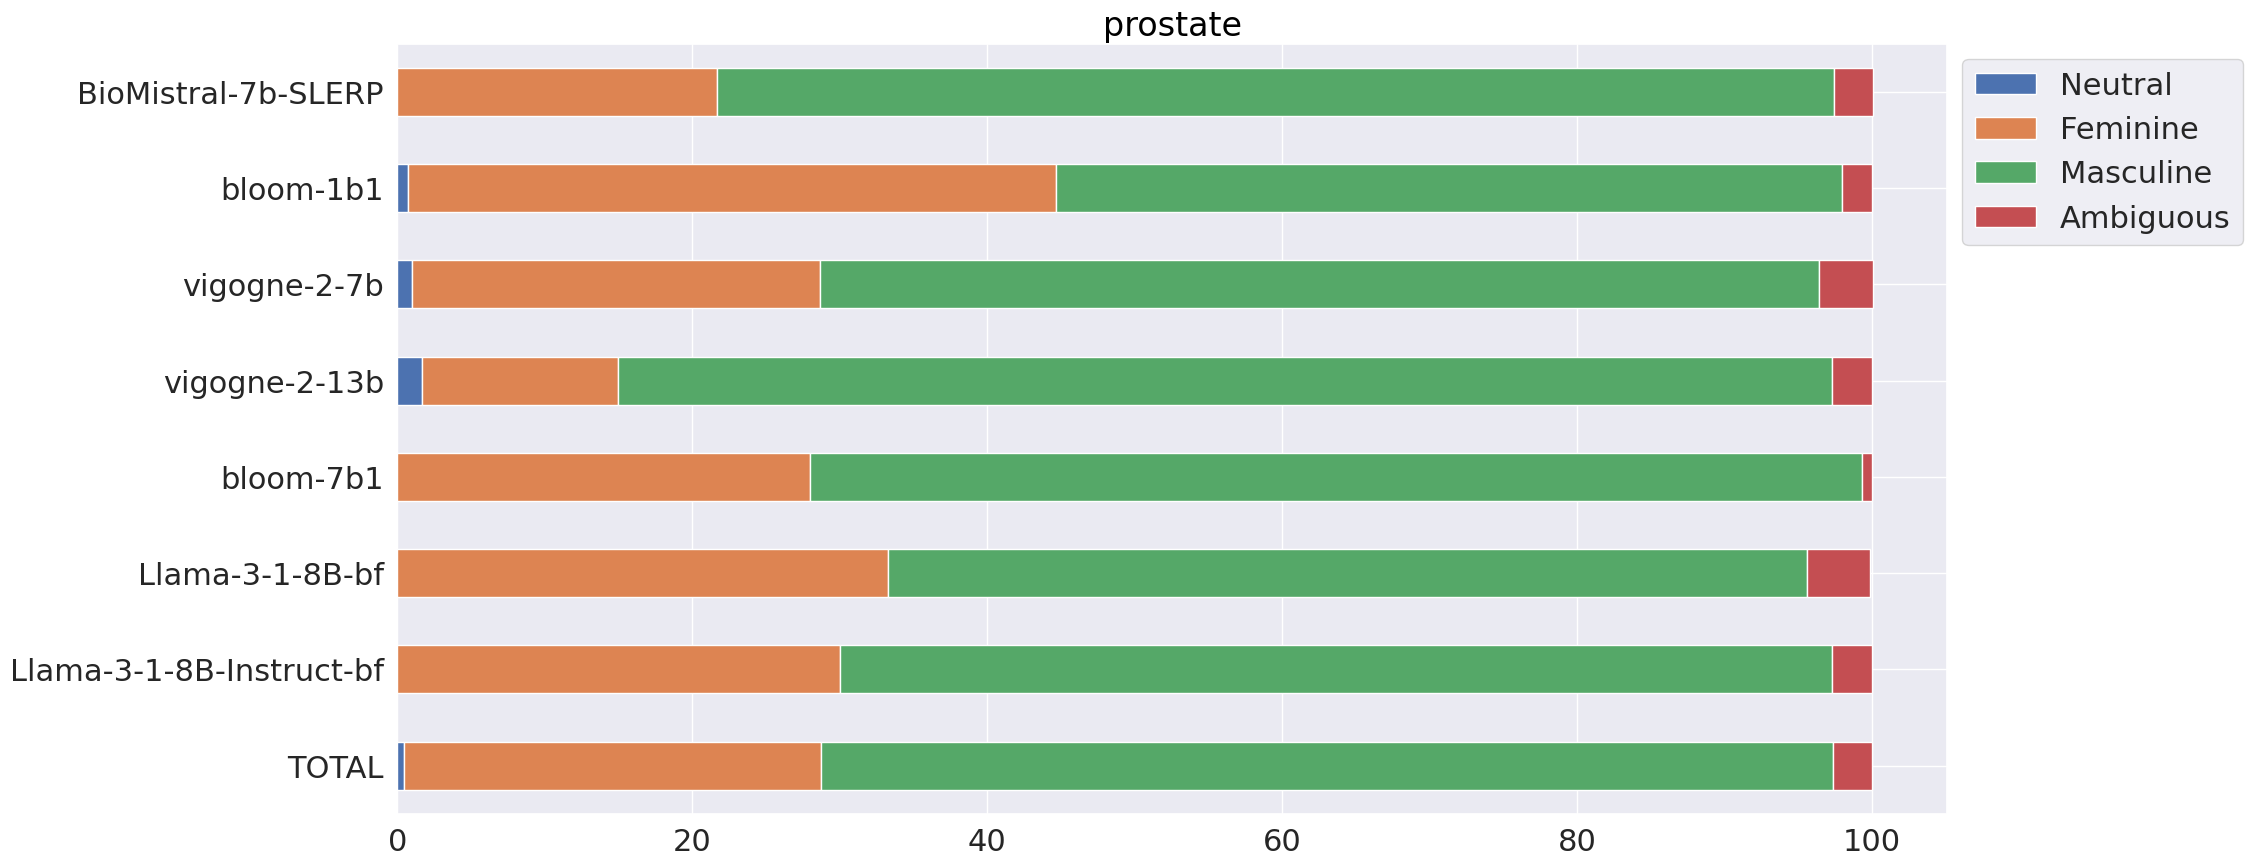

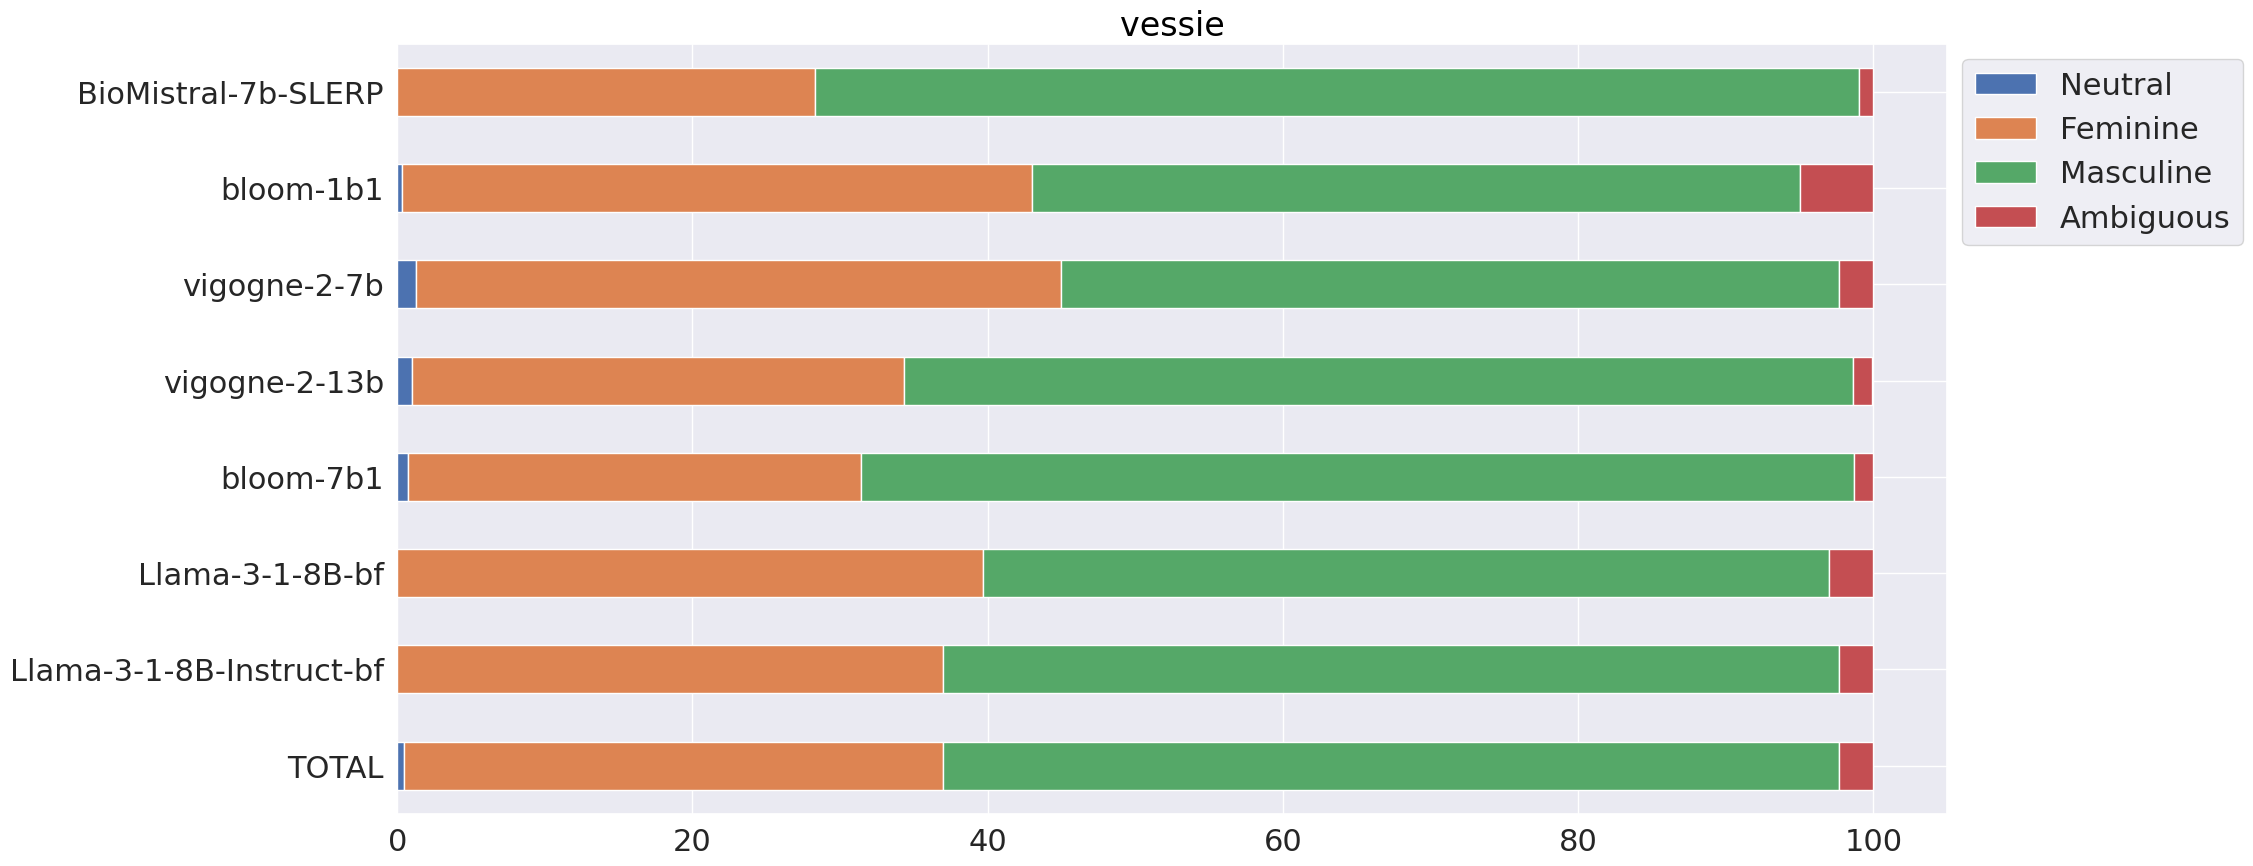

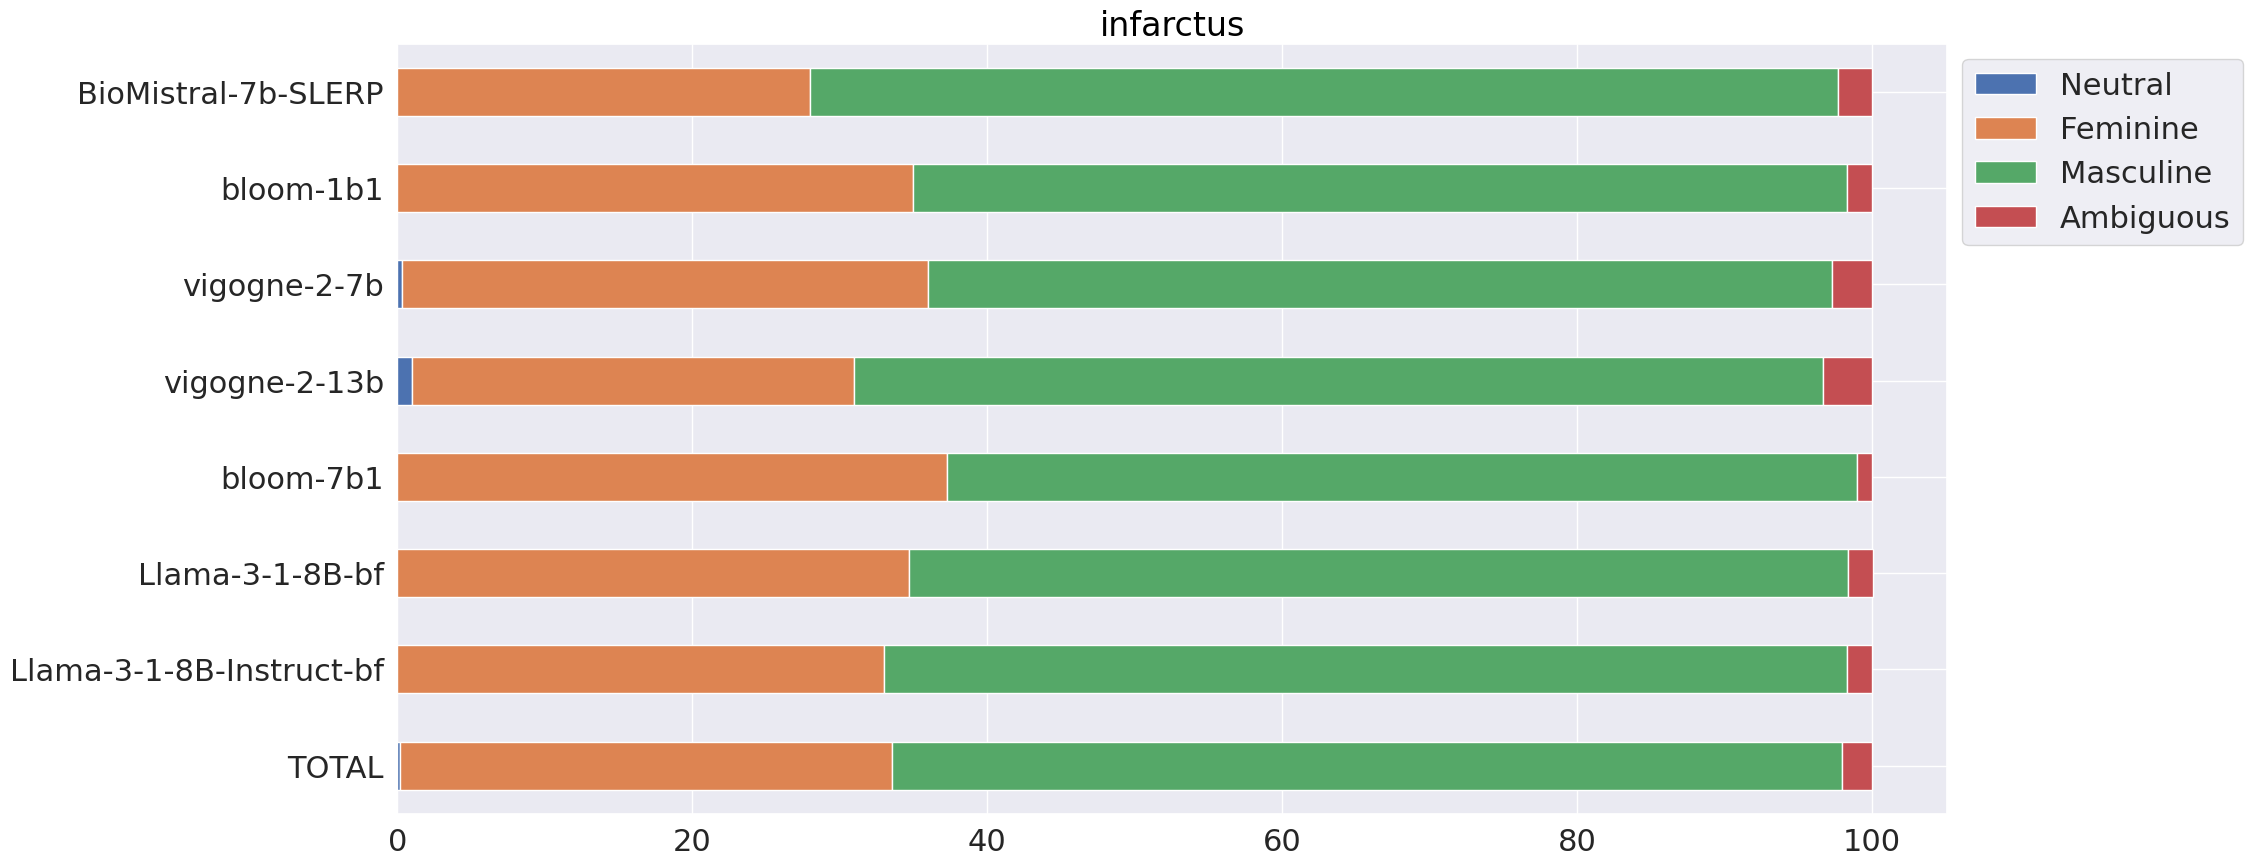

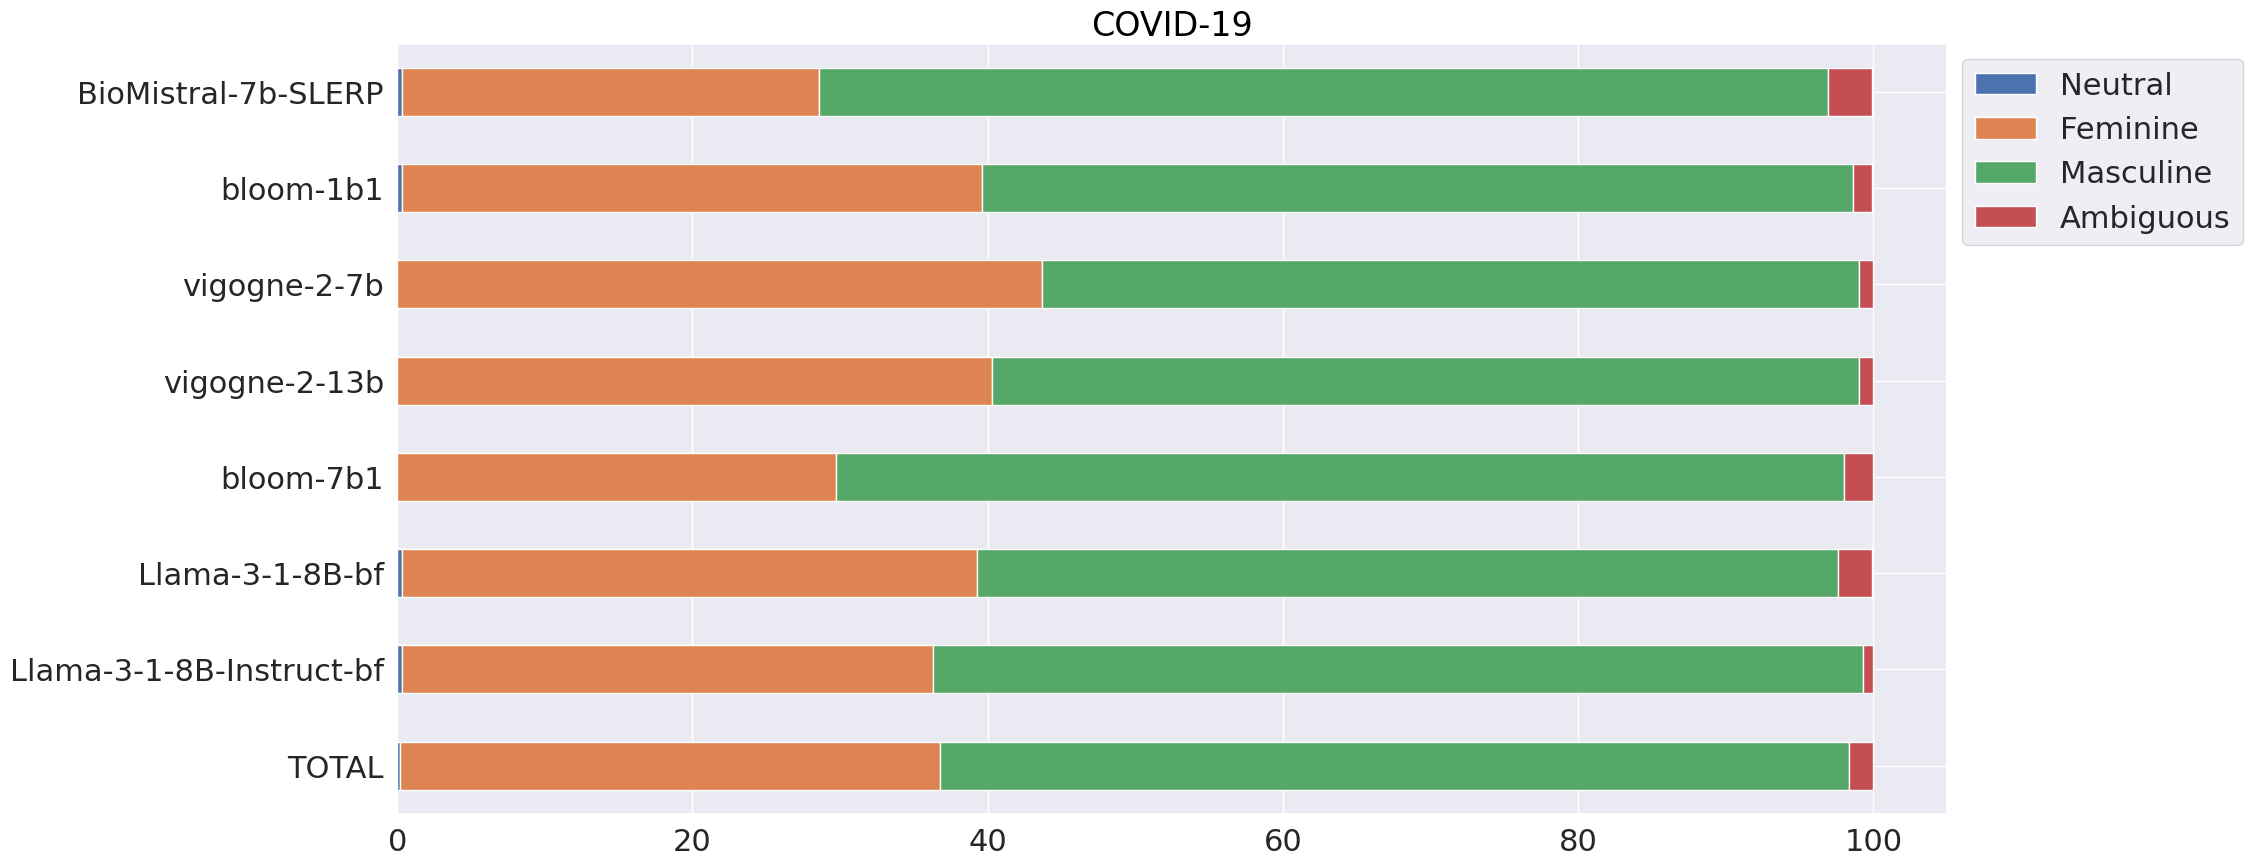

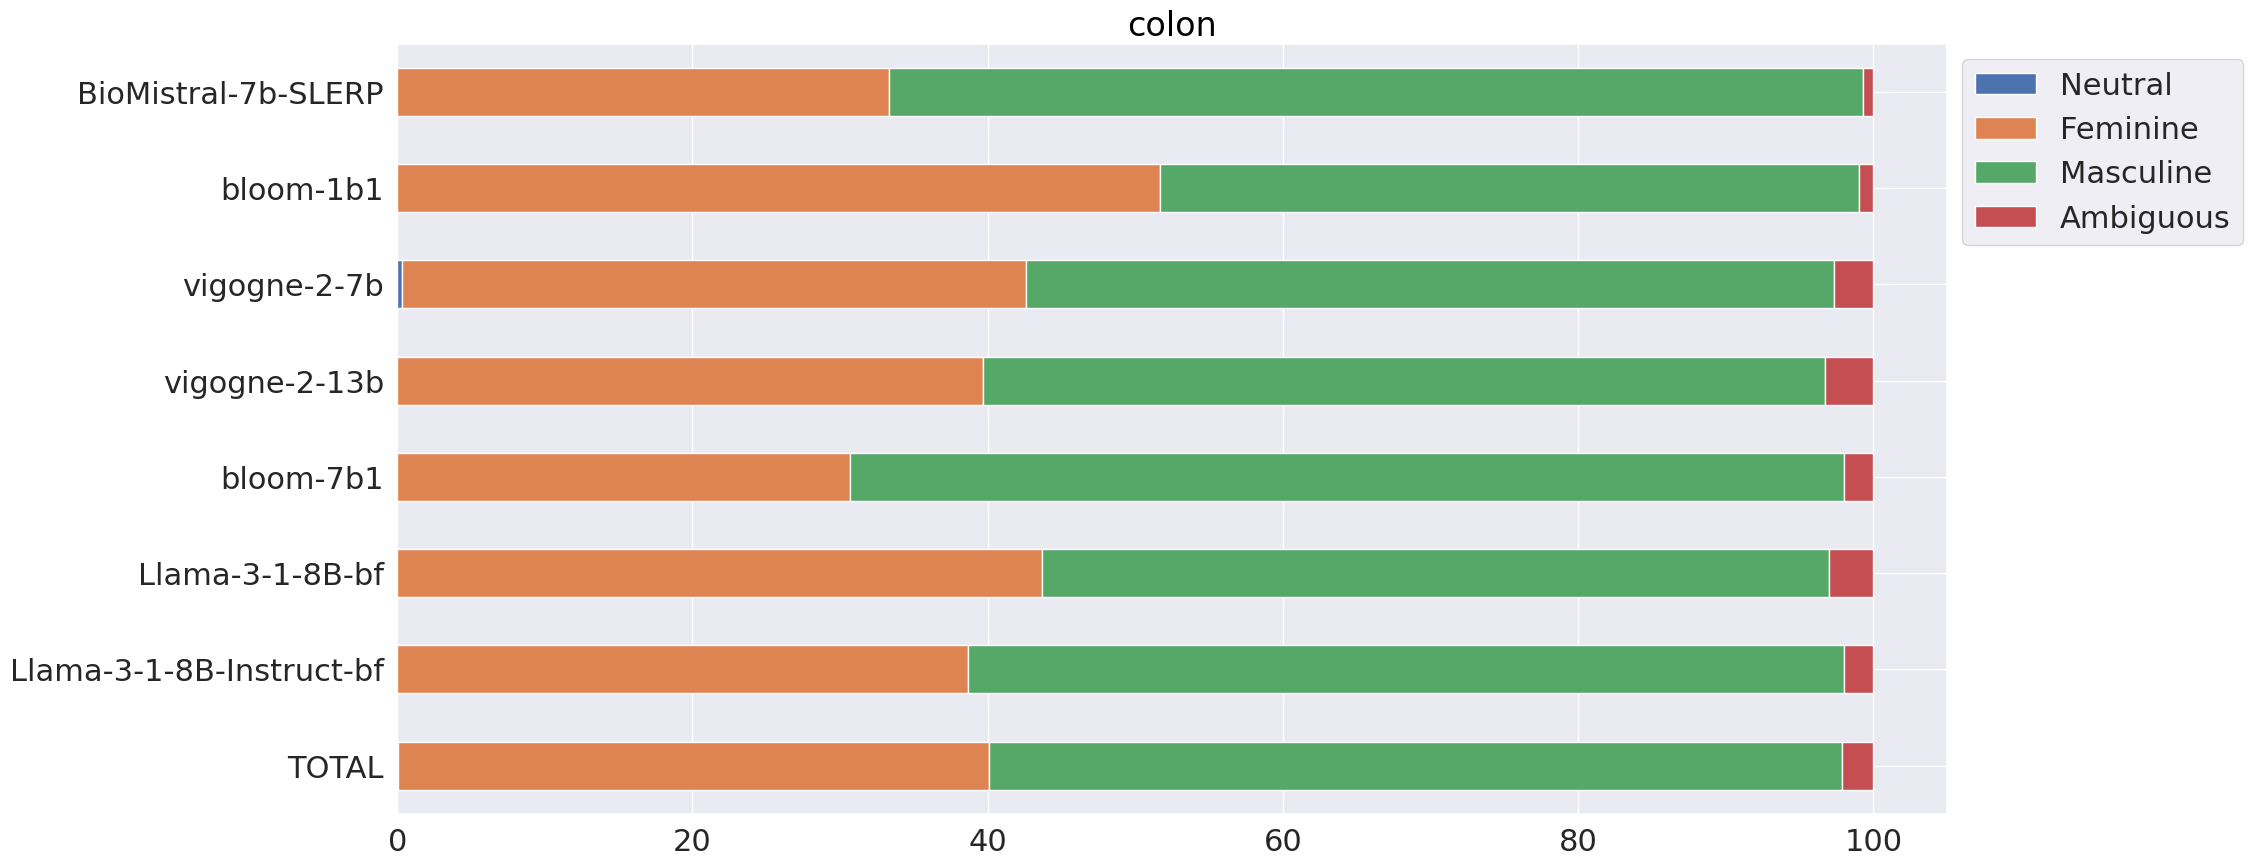

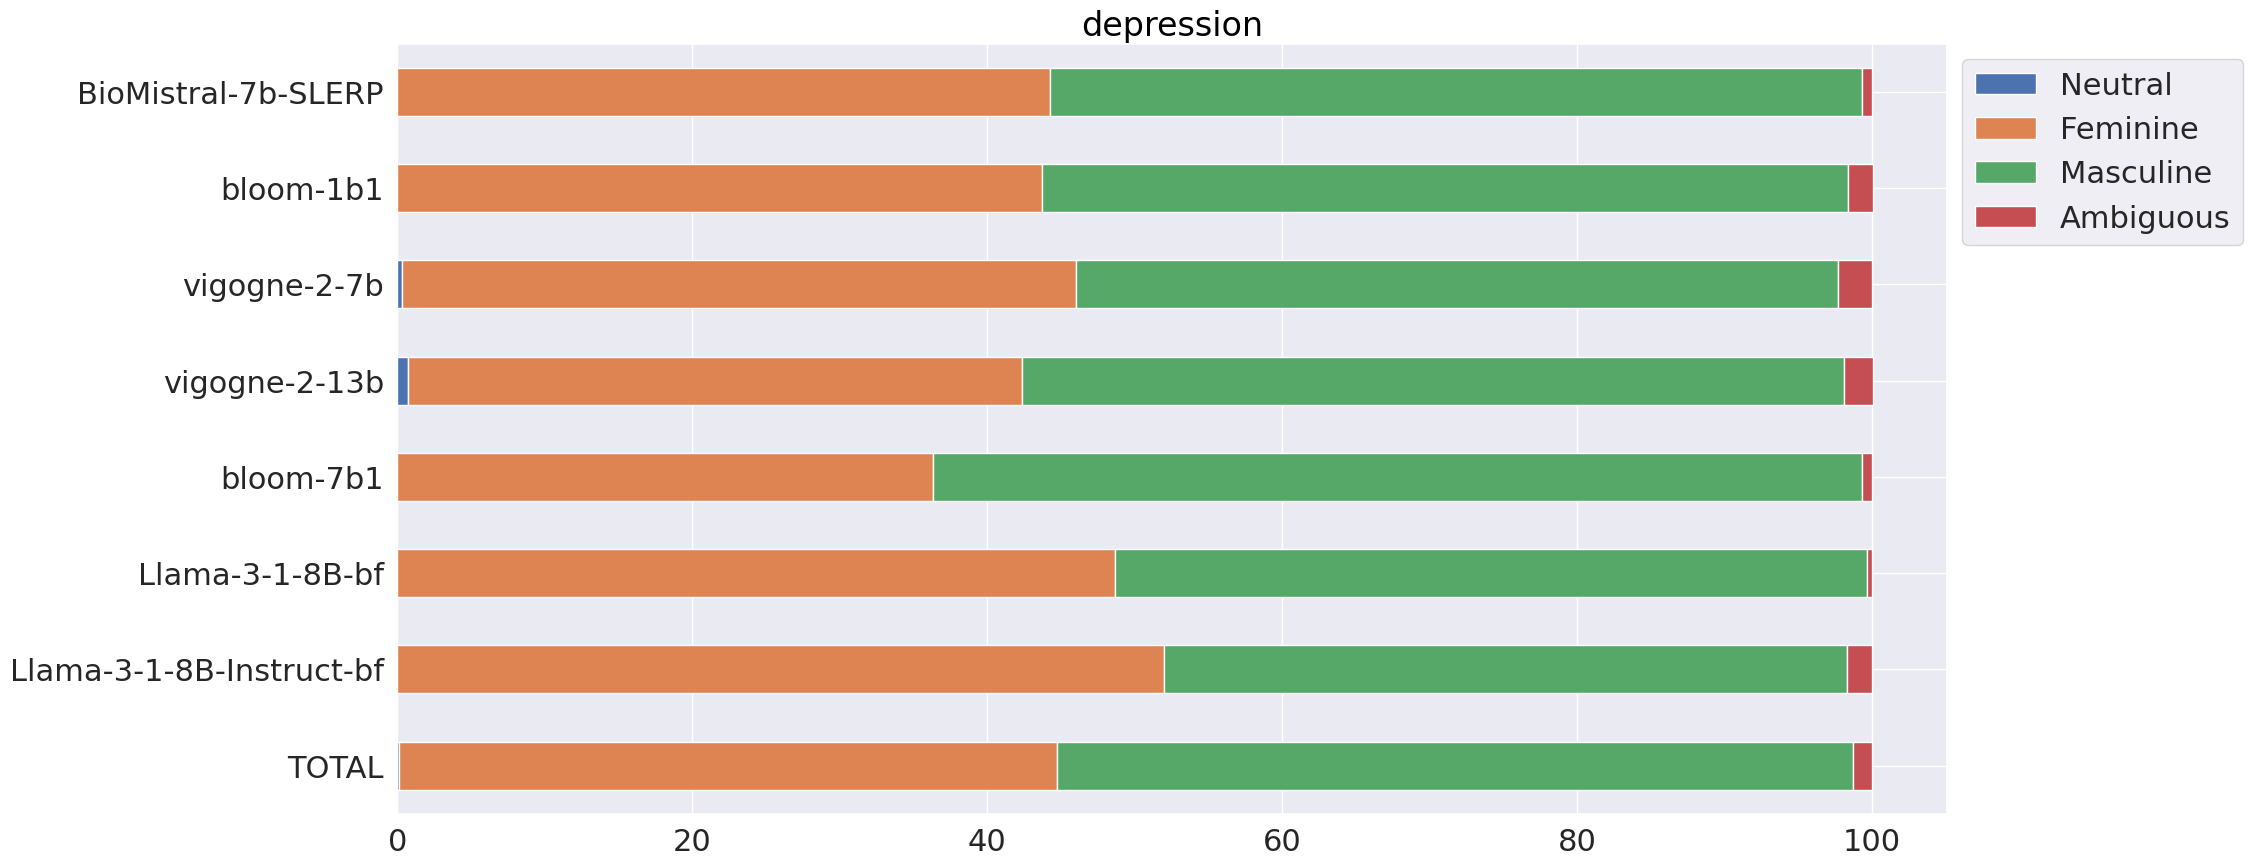

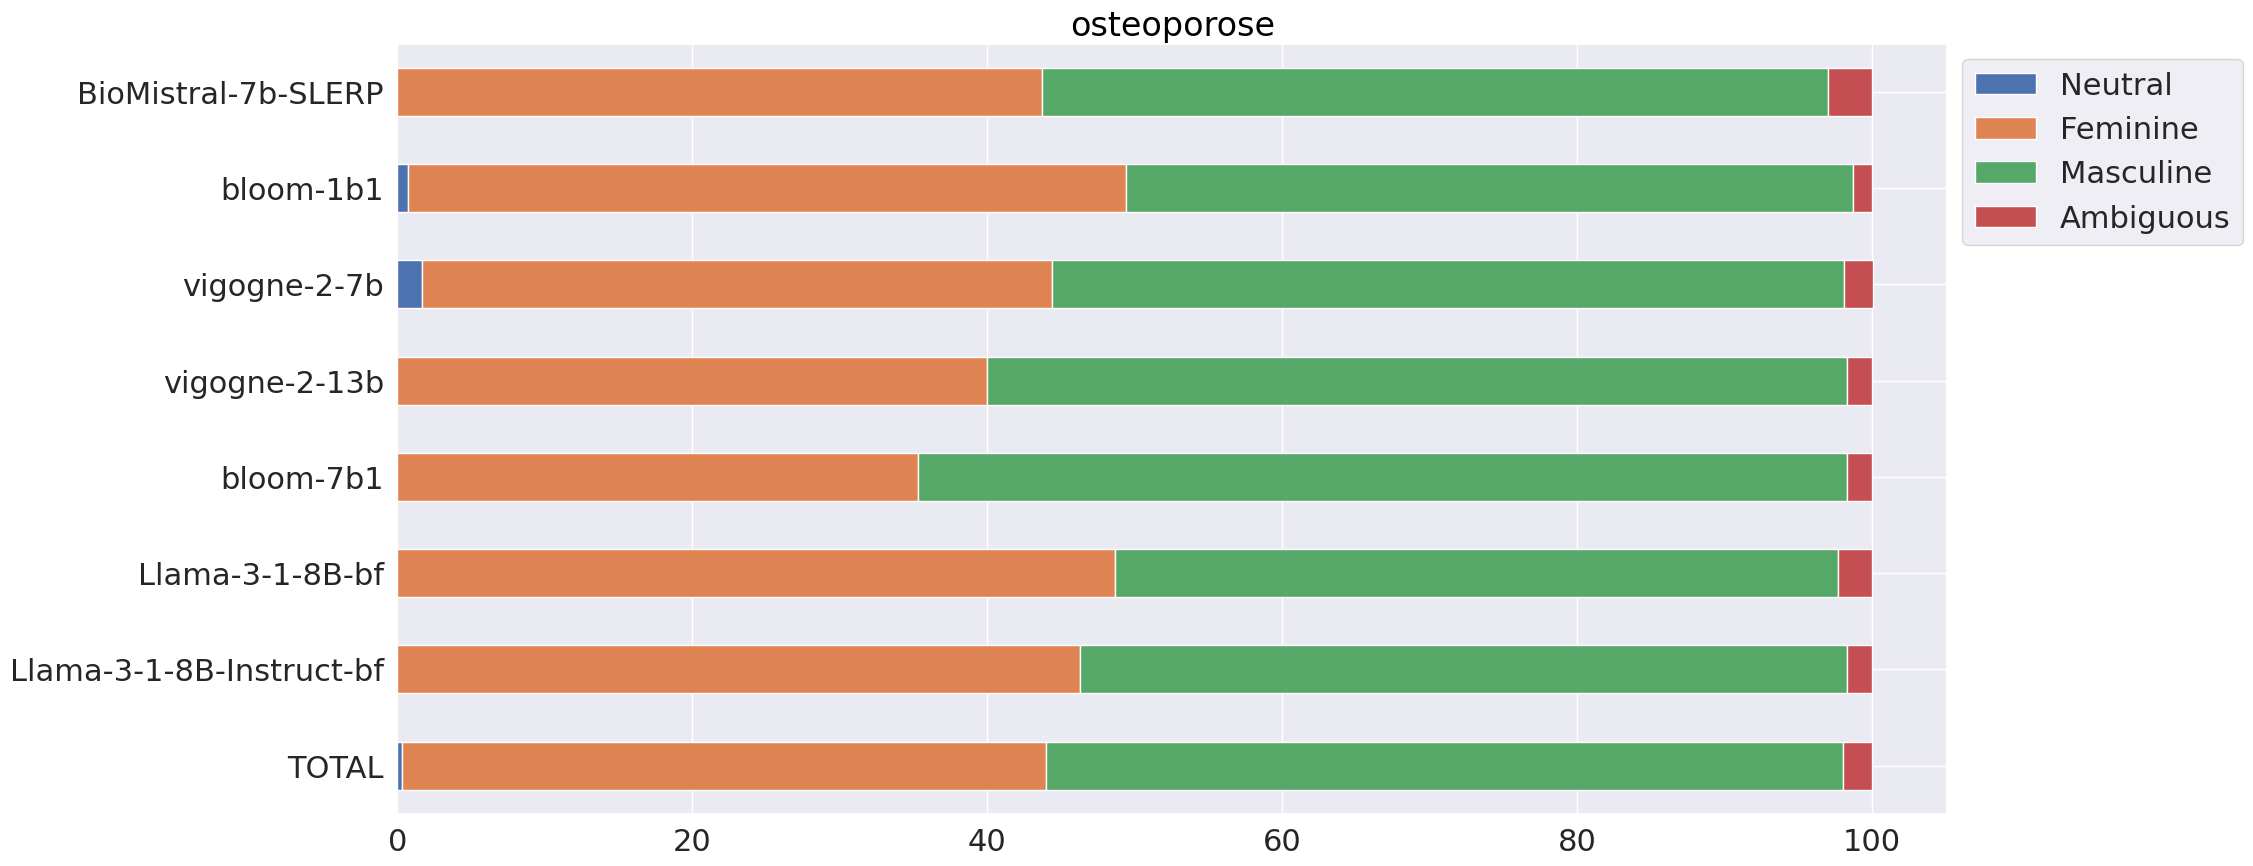

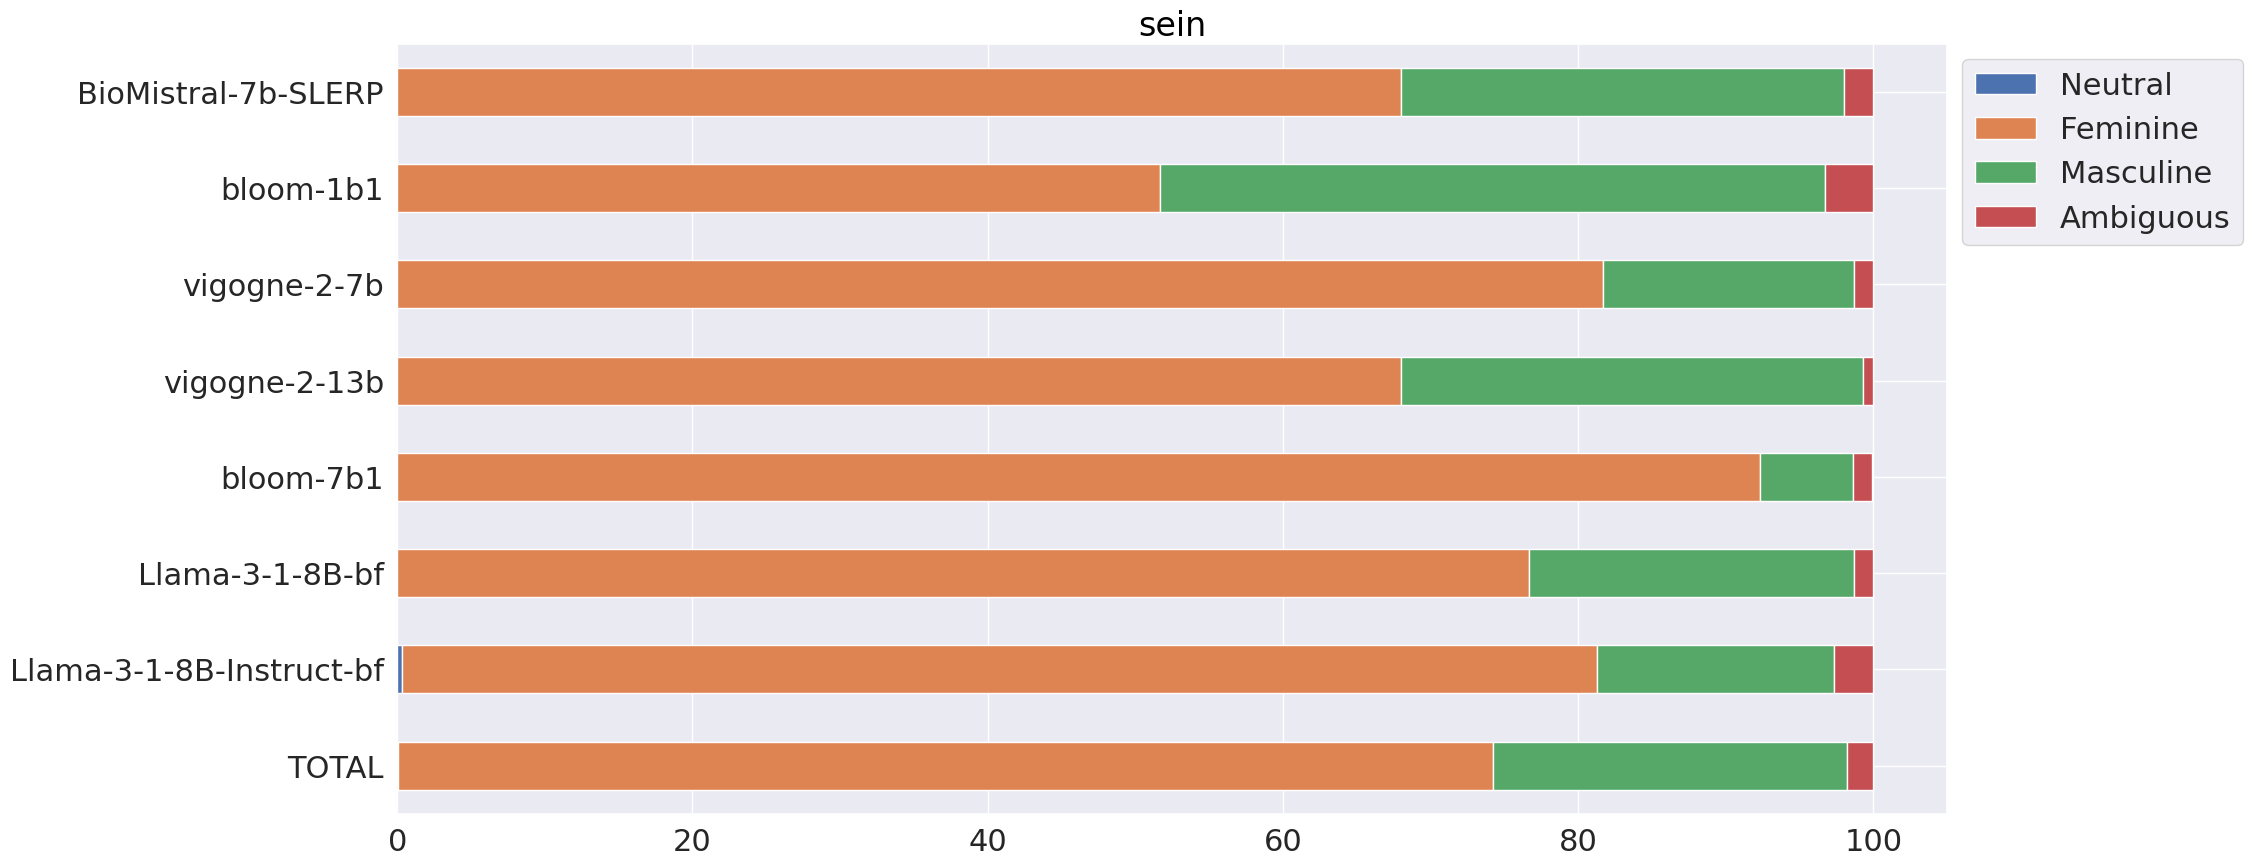

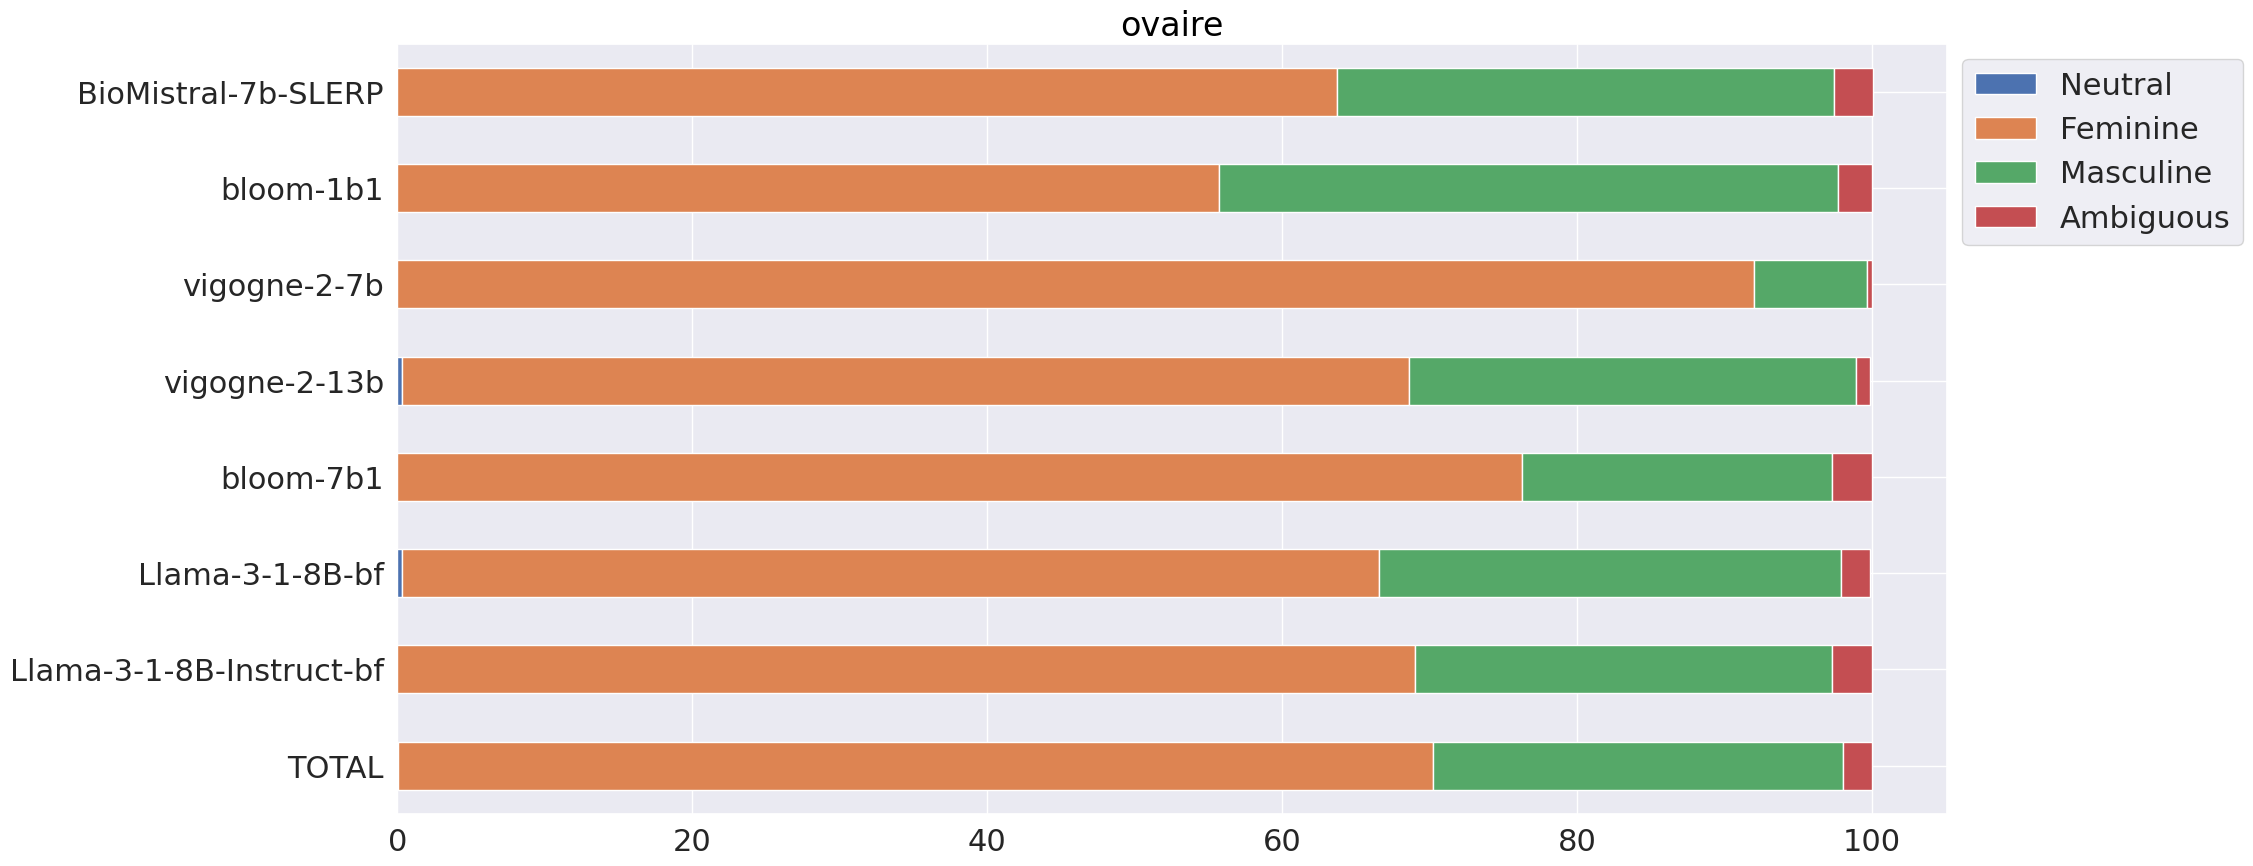

In [32]:
"""Ordre par topic, puis par modèle"""

"""ATTENTION CHANGEMENT DE COULEURS, À CORRIGER #TODO"""

#modeles = ["bloom-560m", "bloom-3b", "bloom-7b", "vigogne-2-7b", "gpt2-fr", "xglm-2.9B"]
for topic in topics:
    table = []
    for model in modeles:
        op = exploration_donnees_per_topic_model(data_genre,label,model,topic)
        op['model'] = model
        table.append(op)

    print("\n",topic)
    print(tabulate(table, headers='keys'))
    
    for d in table:
        for genre in ["Neutral","Feminine", "Masculine","Ambiguous"]:
            if genre not in d:
                d[genre]="0%"
    table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
                 "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]
    new_dic = {}
    for genre in ["Neutral","Feminine", "Masculine","Ambiguous"]:
        new_dic[genre] = sum([d[genre] for d in table_new])/len(table_new)
    #table_new.append(new_dic)
    table_new.insert(0,new_dic)
    
    """    # ajouter une barre pour le total
    total = {}
    for genre in ["Masc", "Fem", "Neutre", "Ambigu"]:
        n = sum([dic[genre] for dic in table_new])
        total[genre] = n/len(table_new)

    table_new.append(total)"""

    df = pd.DataFrame(table_new, index=["TOTAL"]+modeles)
    ax = df.plot(kind="barh", stacked=True)
    ax.set_title(topic,color='black')
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    #plt.savefig(f"analyse_fig-tables/gender_per_topic+model_{topic}.png",bbox_inches = "tight")
    ax.plot()

## Stylométrie (stats sur les textes)

Quelques statistiques & graphiques sur les données : moyenne de nombre de mots, de caractères, de mots uniques
(fonction adaptée de code trouvé en ligne : https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e )

In [33]:
def stats_donnees(dataset, label, filtre_model=None):
    cat_m="Masculine"
    cat_f="Feminine"
    cat_n="Neutral"
    cat_a = "Ambiguous"
    
    if filtre_model:
        dataset = dataset[dataset["model"]==filtre_model]
    
    #1. WORD-COUNT
    dataset['word_count'] = dataset["generation"].apply(lambda x: len(str(x).split()))
    
    #2. CHARACTER-COUNT
    dataset['char_count'] = dataset['generation'].apply(lambda x: len(str(x)))

    #3. UNIQUE WORD-COUNT
    dataset['unique_word_count'] = dataset['generation'].apply(lambda x: len(set(str(x).split())))
    
    res_word= {"Masc": dataset[dataset[label]==cat_m]['word_count'].mean(), "Fem": dataset[dataset[label]==cat_f]['word_count'].mean(),
          "Neutre":dataset[dataset[label]==cat_n]['word_count'].mean(), "Ambigu":dataset[dataset[label]==cat_a]['word_count'].mean(),
              }
    
    res_char= {"Masc": dataset[dataset[label]==cat_m]['char_count'].mean(), "Fem": dataset[dataset[label]==cat_f]['char_count'].mean(),
          "Neutre":dataset[dataset[label]==cat_n]['char_count'].mean(), "Ambigu":dataset[dataset[label]==cat_a]['char_count'].mean()}

    res_uniqueword= {"Masc": dataset[dataset[label]==cat_m]['unique_word_count'].mean(), "Fem": dataset[dataset[label]==cat_f]['unique_word_count'].mean(),
          "Neutre":dataset[dataset[label]==cat_n]['unique_word_count'].mean(), "Ambigu":dataset[dataset[label]==cat_a]['unique_word_count'].mean()}

    
    return res_char, res_word, res_uniqueword


table = []
print("Char")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[0]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)
print(tabulate(table, headers='keys'))
    
table = []
print("\nWord")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[1]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)
print(tabulate(table, headers='keys'))
    
table = []
print("\nUnique word")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[2]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)

print(tabulate(table, headers='keys'))

"""for model in modeles:
    print("\n ---", model)
    stats_donnees(data_genre, label, model)
    print("*"*60)"""

Char
   Masc      Fem    Neutre    Ambigu    total  model
-------  -------  --------  --------  -------  ------------------------
3565.19  3694.5    1371      3590.41  3055.28  Llama-3-1-8B-Instruct-bf
3912.4   3886.58   3310.67   3851.34  3740.25  Llama-3-1-8B-bf
5409.61  5331.22   5199.8    5349.17  5322.45  bloom-7b1
3885.27  3831.39   3856.6    3900.19  3868.36  vigogne-2-13b
3510.87  3628.4    2826.75   3427.62  3348.41  vigogne-2-7b
5406.3   5343.91   5196.82   5333.02  5320.01  bloom-1b1
3874.1   3836.73   4030      3921.6   3915.61  BioMistral-7b-SLERP

Word
   Masc      Fem    Neutre    Ambigu    total  model
-------  -------  --------  --------  -------  ------------------------
532.525  555.262   221       533.724  460.628  Llama-3-1-8B-Instruct-bf
588.949  588.7     500.333   579.743  564.431  Llama-3-1-8B-bf
811.089  805.949   801.2     805.829  806.017  bloom-7b1
573.549  568.902   550.933   575.672  567.264  vigogne-2-13b
512.556  535.285   384.25    502.672  483.691  vi

'for model in modeles:\n    print("\n ---", model)\n    stats_donnees(data_genre, label, model)\n    print("*"*60)'

In [26]:
"""PRÉPARER FICHIERS TXT POUR TXM
+ analyses différences lexicales (pas trop intéressant)"""
from collections import Counter 
textes_genre = {}
for genre in list(set(data_genre["Identified_gender"])):
    df_genre = data_genre[data_genre["Identified_gender"]==genre]
    counter = Counter()
    #textes_genre[genre] = df_genre["generation"].split()
    counter.update(str(list(df_genre["generation"])).split())
    textes_genre[genre] = counter
    #with open(f"../../bias_results/global_{genre}.txt", "w") as f:
        #f.write(str(list(df_genre["generation"])))

Ambiguous
[('de', 13728), ('la', 7278), ('et', 7039), ('une', 6265), ('à', 5186), ('a', 4562), ('des', 3772), ('du', 3377), ('un', 3320), ('en', 2639), ('le', 2622), ('avec', 2533), ('été', 2441), ('par', 2214), ('était', 2155), ('est', 1903), ('Le', 1635), ('les', 1627), ('La', 1595), ('au', 1435), ('pas', 1313), ('pour', 1269), ('sans', 1086), ('dans', 1003), (';', 911), ('patiente', 865), ('qui', 843), ('d’une', 821), ('bilan', 764), ('montré', 759), ('Les', 712), ('sur', 706), ('avait', 705), ('patient', 699), ('niveau', 684), ('deux', 674), ('traitement', 642), ('Il', 589), ('après', 586), ('étaient', 581), (':', 568), ('clinique', 557), ('diagnostic', 557), ('d’un', 555), ('ans,', 555), ('2', 547), ('Une', 532), ('ont', 532), ('douleurs', 520), ('mois', 520), ('sont', 517), ('ans', 482), ('cas', 474), ('gauche', 473), ('que', 472), ('cellules', 471), ("d'une", 459), ('ne', 453), ('ou', 434), ('depuis', 421), ('il', 407), ('tumeur', 402), ('non', 393), ('présence', 390), ('objecti

In [35]:
top_genre = {}
for genre, counter in textes_genre.items():
    #print(genre)
    counter = counter.most_common(1000) #500
    top = [el[0] for el in counter] #if len(el[0])>4]
    top_genre[genre] = top
    
print(set(top_genre["Feminine"]).difference(set(top_genre["Masculine"])))
print("\n")
print(set(top_genre["Masculine"]).difference(set(top_genre["Feminine"])))

{'hystérectomie', 'Patey', 'ganglionnaires', '63', 'sœur', 'axillaires', 'sein.', 'adressée', 'mui/ml.', 'patiente,', 'chimiothérapie,', '19.1', 'hépatique.', 'V', 'patiente.', 'Mme', 'péritonéale', 'hépatique,', 'd’Adriamycine', 'Patiente', 'bilatéral.', 'dernière', '50mg/m²', "'Une", 'chimiothérapie.', 'g/dl', 'nullipare,', 'vésicale', 'III,', 'ganglions', 'grossesse', 'tazobactam,', 'pare,', 'abdominale,', 'opérée', 'mammaire', 'asthme', '15-3', 'l’existence', 'docétaxel', 'tuméfaction', 'mastectomie', 'pipéracilline,', 'extension', 'plaquetaire', 'glycémie', 'cavité', 'Observation', 'seins', 'II', 'leucocytes', '81', 'néoadjuvante', 'corticodépendant', "L'échographie", 'décédée', 'nulligeste', 'incontinence', 'amikacine,', 'revue', '21', 'g/dl,', 'geste,', 'pancytopénie', 'négatif,', 'curage', 'nodules', 'réalisées', 'veine', 'microbiopsie', 'omentectomie', 'rouges', 'cyclophosphamide', 'III.', 'spectre', 'séances', 'L´examen', 'mars', '000', 'hépatiques', 'transférée', 'décembre',